# **Phase 1 - Exploratory Data Analysis**


We have been provided with NPRI (National Pollutant Release Inventory) dataset which is a time series data from year 2000 to 2022. The purpose of this project is to:
- perform EDA to better understand the dataset
- identify data issues (missing values, outliers and imbalance in dataset)
- create visualization and statistics
- discovery patterns
- fix data problems (mistakes and bad housekeeping, missing values, outliers, scale mismatches)

**Problem Statement**

**Depending on provincial population trends, predict the amount of ammonia, nitrate ions and phosphorous released to water from wastewater treatment plants in 2023 (data).**



## **Describing dataset including information research**

**Title: Understanding Pollution Trends in Canada: An Analysis of the National Pollutant Release Inventory (NPRI)**


**Executive Summary**

This report examines pollution across Canada using data from the National Pollutant Release Inventory (NPRI). It tracks what industries release into the environment and offers a clear picture of where the most pollution comes from. Over the last 22 years, there have been changes in the levels of pollutants like greenhouse gases (GHGs) and harmful metals. While some improvements have been recorded there are still concerns about the pollutants that are still being emitted into the environment.

**Introduction**

The National Pollutant Release Inventory (NPRI) is Canada’s main system for tracking pollution. It collects information from industries on the types and amounts of pollutants they release. This helps in raising public awareness and allowing the government to hold industries accountable.

**Methodology**

The NPRI data from the past 22 years was used to study pollution across Canada. The process involved:

1. Data Collection:

o Data was pulled on the release of key pollutants, for example, GHGs, volatile organic compounds (VOCs), and metals such as mercury and lead.

2. Data Organization:

o Pollutants were grouped by type and their units were measured, and sorted by their region to spot trends and which are problem areas.

3. Analysis: Key Findings

**Pollutants, Industries, and Geography**

· Pollutant Types: GHGs, VOCs, heavy metals, and particulate matter are some of the main pollutants tracked by the NPRI.

· Industries: The oil and gas industry, manufacturing, mining, and power plants are the biggest contributors to pollution in Canada.

· Geographic Focus: Pollutant releases were captured by province to figure out where pollution is most concentrated.

Exploratory Data Analysis (EDA)

1. Dataset Summary

- The dataset covers pollution from over 100 types of substances.
- It contains data from industrial facilities across all Canadian provinces for the past 22 years.

2. Bad Housekeeping in Dataset
- missing values
- inconsistency (different units of measurement)
- outliers


**Key Findings**

· Alberta has the highest level of observations with the least observed as Yukon.

· Alberta has the highest level of 'release to air(stack point) levels, followed by Newfoundland and Labrador with Yukon Territory recording the least amount.

· Nova Scotia has the highest level of 'release to land(other). Saskatchewan, Northwest Territory, PEI and YT do not have any type of releases to land. Overall, for the provinces that have releases to land(spills) this type od releases are way smaller compared to the releases to land(other). Also all the provinces do not have a remarkable release to land(leaks) value.

· Nova Scotia has the highest level of releases to water bodies through direct discharge. Some provinces do not show any considerable amount of releases to water bodies. Manitoba remarkably has a high level of release to water bodies through spills.

1. We observe some strong correlations in the dataset between the following features: Positive correlations :Release to air spills and release to land spills

2. Release to air spills and release to water bodies spills

3. Release to air spills and sum of release to all media

4. Release to land leaks and sum of release to all media

5. Release to land - other and releases to water bodies - spills

6. Release to land - spills and releases to water bodies - spills

7. Releases to water bodies - spills and releases to water bodies - leaks



Conclusion

The NPRI dataset does a good job of highlighting which industries and regions contribute the most to pollution. This dataset shows where Canada should focus its efforts to improve environmental quality and public health. Continued tracking and stronger regulations will be crucial in managing industrial pollutants and creating a safer, healthier environment for all Canadians.

In [ ]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import sklearn.tree as skTree
import sklearn.metrics as skMetrics
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
ohe = OneHotEncoder()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import FunctionTransformer


import statsmodels.api as sm




%matplotlib inline


In [ ]:
!pip install category_encoders==2.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
# importing dataset
df_NPRI = pd.read_csv('NPRI_2000_2022.csv', encoding ='latin1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# displaying the first 5 columns
df_NPRI.head()

<ipython-input-5-89a82e0b6b30>:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



Reporting_Year / Année  NPRI_ID / No_INRP Number of employees  \
0                    2000                  1                 440   
1                    2000                  1                 440   
2                    2000                  1                 440   
3                    2000                  1                 440   
4                    2000                  1                 440   

  Company_Name / Dénomination_sociale_de_l'entreprise  \
0             Alberta-Pacific Forest Industries Inc.    
1             Alberta-Pacific Forest Industries Inc.    
2             Alberta-Pacific Forest Industries Inc.    
3             Alberta-Pacific Forest Industries Inc.    
4             Alberta-Pacific Forest Industries Inc.    

  Facility_Name / Installation  NAICS / Code_SCIAN  \
0                      (blank)              322112   
1                      (blank)              322112   
2                      (blank)              322112   
3                      (blank)              322112   
4                      (blank)              322112   

  NAICS Title / Titre Code_SCIAN PROVINCE                 City   Latitude  \
0            Chemical pulp mills       AB  County of Athabasca  54.923116   
1            Chemical pulp mills       AB  County of Athabasca  54.923116   
2            Chemical pulp mills       AB  County of Athabasca  54.923116   
3            Chemical pulp mills       AB  County of Athabasca  54.923116   
4            Chemical pulp mills       AB  County of Athabasca  54.923116   

    Longitude CAS_Number / No_CAS  \
0 -112.861867          10049-04-4   
1 -112.861867             67-56-1   
2 -112.861867             67-66-3   
3 -112.861867             75-07-0   
4 -112.861867           7647-01-0   

  Substance Name (English) / Nom de substance (Anglais) Units / Unités  \
0                                   Chlorine dioxide            tonnes   
1                                           Methanol            tonnes   
2                                         Chloroform            tonnes   
3                                       Acetaldehyde            tonnes   
4                                  Hydrochloric acid            tonnes   

  Estimation_Method / Méthode_destimation  Release to Air - Fugitive  \
0     M - Monitoring or Direct Measurement                        NaN   
1                      E - Emission Factor                        NaN   
2     M - Monitoring or Direct Measurement                        NaN   
3                      E - Emission Factor                        NaN   
4     M - Monitoring or Direct Measurement                        NaN   

   Release to Air - Other Non-Point   Release to Air - Road dust    \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

   Release to Air - Spills   Release to Air - Stack / Point    \
0                       NaN                             5.200   
1                       NaN                           113.000   
2                       NaN                               NaN   
3                       NaN                             7.670   
4                       NaN                             0.665   

   Release to Air - Storage / Handling   Releases to Land - Leaks  \
0                                   NaN                       NaN   
1                                   NaN                       NaN   
2                                   NaN                       NaN   
3                                   NaN                       NaN   
4                                   NaN                       NaN   

   Releases to Land - Other   Releases to Land - Spills   \
0                        NaN                         NaN   
1        

## Exploring the data

In [ ]:
# checking the number of rows and columns
df_NPRI.shape

(737516, 28)

In [ ]:
# retrieving general information about the dataframe
df_NPRI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737516 entries, 0 to 737515
Data columns (total 28 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Reporting_Year / Année                                 737516 non-null  int64  
 1   NPRI_ID / No_INRP                                      737516 non-null  int64  
 2   Number of employees                                    736900 non-null  object 
 3   Company_Name / Dénomination_sociale_de_l'entreprise    737516 non-null  object 
 4   Facility_Name / Installation                           736340 non-null  object 
 5   NAICS / Code_SCIAN                                     737516 non-null  int64  
 6   NAICS Title / Titre Code_SCIAN                         737516 non-null  object 
 7   PROVINCE                                               737516 non-null  object 
 8   City                              

In [ ]:
# generating summary statistics of the numerical columns
df_NPRI.describe()

Reporting_Year / Année  NPRI_ID / No_INRP  NAICS / Code_SCIAN  \
count           737516.000000      737516.000000       737516.000000   
mean              2012.267601       11248.268386       289175.551820   
std                  6.400156        9352.868266        94788.542197   
min               2000.000000           1.000000       111120.000000   
25%               2007.000000        3775.000000       211113.000000   
50%               2012.000000        7114.000000       312140.000000   
75%               2018.000000       18093.000000       327120.000000   
max               2022.000000      306556.000000       913910.000000   

            Latitude      Longitude  Release to Air - Fugitive  \
count  733434.000000  733434.000000              125032.000000   
mean       49.644636     -97.375436                  61.156824   
std         5.155658      20.184399                 797.572502   
min         0.000000    -140.883600                   0.000000   
25%        45.431000    -114.767700                   0.051000   
50%        49.795100    -104.630100                   0.796000   
75%        53.508500     -79.540060                   7.582000   
max        82.498758       0.000000               58433.900000   

       Release to Air - Other Non-Point   Release to Air - Road dust    \
count                       30880.000000                  29861.000000   
mean                           91.455034                    117.236013   
std                          1628.905004                    856.012131   
min                             0.000000                      0.000000   
25%                             0.013000                      0.505400   
50%                             0.490000                      3.561900   
75%                             7.458500                     22.000000   
max                         91138.200000                  39992.961050   

       Release to Air - Spills   Release to Air - Stack / Point    \
count               9181.000000                     513282.000000   
mean                   1.742604                        144.203321   
std                   22.223163                       2014.861249   
min                    0.000000                          0.000000   
25%                    0.000000                          0.429000   
50%                    0.000300                          4.037595   
75%                    0.040000                         37.389000   
max                 1554.400000                     235907.000000   

       Release to Air - Storage / Handling   Releases to Land - Leaks  \
count                          80004.000000                910.000000   
mean                              23.462437                  0.356315   
std                              218.305058                  2.586239   
min                                0.000000                  0.000000   
25%                                0.015000                  0.000000   
50%                                0.358000                  0.000000   
75%                                3.953000                  0.000000   
max                            17883.110000                 39.058000   

       Releases to Land - Other   Releases to Land - Spills   \
count                5668.000000                 4470.000000   
mean                  515.614162                    5.090716   
std                  3181.280880                   93.378082   
min                     0.000000                    0.000000   
25%                     0.001000                    0.000000   
50%                     5.000000                    0.002000   
75%                    47.000000                    0.030000   
max                152270.000000                 4500.100000   

       Releases to Water Bodies - Direct Discharges   \
count                                   53188.000000   
mean                                       79.052084   
std                                       577.693253   
min            

In [ ]:
# making a list of the column names. Sometimes there are trailing spaces before or after the column name which may not be visible, but create issues with exploring the data
df_NPRI.columns

Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Fugitive', 'Release to Air - Other Non-Point ',
       'Release to Air - Road dust  ', 'Release to Air - Spills ',
       'Release to Air - Stack / Point  ',
       'Release to Air - Storage / Handling ', 'Releases to Land - Leaks',
       'Releases to Land - Other ', 'Releases to Land - Spills ',
       'Releases to Water Bodies - Direct Discharges ',
       'Releases to Water Bodies - Leaks',
       'Releases to Water Bodies - Spills ',
       'Sum of release to all media (<1tonne)'],
      dtype='object')

**Note: From the column list above, we observe some of the column names have trailing spaces and apostrophe (') causing issues with calling them in codes. So we will go ahead to address this issue at this point so our codes will run properly. This we achieve by removing trailing spaces and filling spaces in between words with underscore (_).**

In [ ]:
# create new column names by removing trailing spaces and replacing spaces in between words with underscore (_)
new_column_names = ['Reporting_Year/Année', 'NPRI_ID/No_INRP', 'Number_of_Employees',
       "Company_Name/Dénomination_sociale_de_l'entreprise",
       'Facility_Name/Installation', 'NAICS/Code_SCIAN',
       'NAICS Title/Titre_Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number/No_CAS',
       'Substance_Name_(English)/Nom_de_substance_(Anglais)',
       'Units/Unités', 'Estimation_Method/Méthode_d’estimation',
       'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)',
       'Release_to_Air(Road dust)', 'Release_to_Air(Spills)',
       'Release_to_Air(Stack/Point)',
       'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Leaks)',
       'Releases_to_Land(Other)', 'Releases_to_Land(Spills)',
       'Releases_ to_Water_Bodies(Direct Discharges)',
       'Releases_ to_Water_Bodies(Leaks)',
       'Releases_ to_Water_Bodies(Spills)', 'Sum_of_release_to_all_media_(<1tonne)']

In [ ]:
# replace the old column names with the new column names
df_NPRI.columns = new_column_names

In [ ]:
# check to see dataframe has the new headers
df_NPRI.columns

Index(['Reporting_Year/Année', 'NPRI_ID/No_INRP', 'Number_of_Employees',
       'Company_Name/Dénomination_sociale_de_l'entreprise',
       'Facility_Name/Installation', 'NAICS/Code_SCIAN',
       'NAICS Title/Titre_Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number/No_CAS',
       'Substance_Name_(English)/Nom_de_substance_(Anglais)', 'Units/Unités',
       'Estimation_Method/Méthode_d’estimation', 'Release_to_Air(Fugitive)',
       'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Road dust)',
       'Release_to_Air(Spills)', 'Release_to_Air(Stack/Point)',
       'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Leaks)',
       'Releases_to_Land(Other)', 'Releases_to_Land(Spills)',
       'Releases_ to_Water_Bodies(Direct Discharges)',
       'Releases_ to_Water_Bodies(Leaks)', 'Releases_ to_Water_Bodies(Spills)',
       'Sum_of_release_to_all_media_(<1tonne)'],
      dtype='object')

In [ ]:
# code to confirm the number of unique entires in each column
df_NPRI.nunique()

Reporting_Year/Année                                       23
NPRI_ID/No_INRP                                         21868
Number_of_Employees                                      2610
Company_Name/Dénomination_sociale_de_l'entreprise        9859
Facility_Name/Installation                              32102
NAICS/Code_SCIAN                                          403
NAICS Title/Titre_Code_SCIAN                              424
PROVINCE                                                   13
City                                                     4020
Latitude                                                19318
Longitude                                               20295
CAS_Number/No_CAS                                         257
Substance_Name_(English)/Nom_de_substance_(Anglais)       261
Units/Unités                                                4
Estimation_Method/Méthode_d’estimation                     14
Release_to_Air(Fugitive)                                39427
Release_to_Air(Other_Non-Point)                         11561
Release_to_Air(Road dust)                               17131
Release_to_Air(Spills)                                   1733
Release_to_Air(Stack/Point)                            162731
Release_to_Air(Storage/Handling)                        24653
Releases_to_Land(Leaks)                                    87
Releases_to_Land(Other)                                  3365
Releases_to_Land(Spills)                                  936
Releases_ to_Water_Bodies(Direct Discharges)            23018
Releases_ to_Water_Bodies(Leaks)                          126
Releases_ to_Water_Bodies(Spills)                        1615
Sum_of_release_to_all_media_(<1tonne)                    5525
dtype: int64

## **Visualization**
It aids detecting patterns in the dataset and investigating the distribution of the features.

In [ ]:
# subset of dataframe showing the number of observations across provinces
df_NPRI['PROVINCE'].value_counts()

PROVINCE
AB    248830
ON    196937
QC     91065
BC     81635
SK     60245
MB     16215
NS     12661
NB     12272
NL      9495
NT      3681
NU      3106
PE      1092
YT       282
Name: count, dtype: int64

#### 1. Bar Charts

<Axes: xlabel='PROVINCE'>

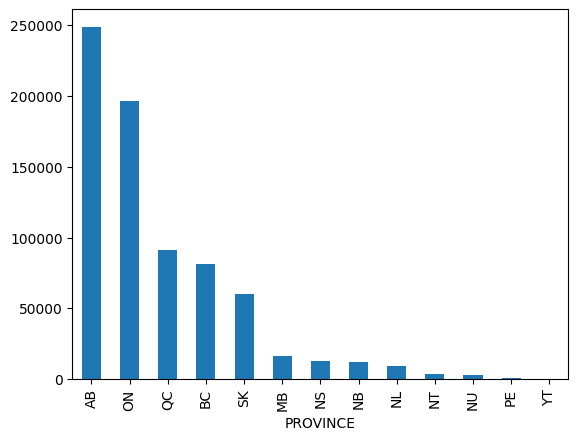

In [ ]:
# bar plot of observations across provinces
df_NPRI['PROVINCE'].value_counts().plot(kind='bar')

**Plotting the release of substances to air across various provinces.**

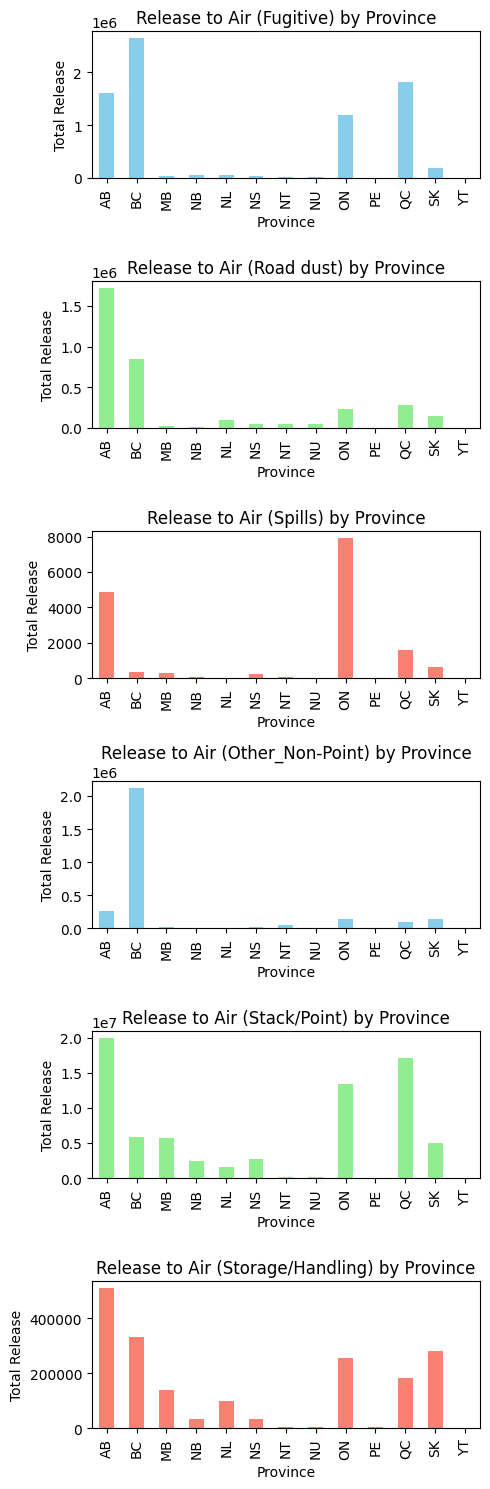

In [ ]:
# Create subplots for the 6 types of releases to air
fig, axs = plt.subplots(6, 1, figsize=(5, 15)) # Changed to 6 rows and 1 column

# Plot 'Release_to_Air(Fugitive)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Fugitive)'].sum().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Release to Air (Fugitive) by Province')
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Total Release')

# Plot 'Release_to_Air(Road dust)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Road dust)'].sum().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Release to Air (Road dust) by Province')
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Total Release')

# Plot 'Release_to_Air(Spills)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Spills)'].sum().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Release to Air (Spills) by Province')
axs[2].set_xlabel('Province')
axs[2].set_ylabel('Total Release')

# Plot 'Release_to_Air(Other_Non-Point)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Other_Non-Point)'].sum().plot(kind='bar', ax=axs[3], color='skyblue') # Changed axs index to 3
axs[3].set_title('Release to Air (Other_Non-Point) by Province') # Changed title and axs index
axs[3].set_xlabel('Province')
axs[3].set_ylabel('Total Release')

# Plot 'Release_to_Air(Stack/Point)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Stack/Point)'].sum().plot(kind='bar', ax=axs[4], color='lightgreen') # Changed axs index to 4
axs[4].set_title('Release to Air (Stack/Point) by Province') # Changed title and axs index
axs[4].set_xlabel('Province')
axs[4].set_ylabel('Total Release')

# Plot 'Release_to_Air(Storage/Handling)' by province
df_NPRI.groupby('PROVINCE')['Release_to_Air(Storage/Handling)'].sum().plot(kind='bar', ax=axs[5], color='salmon') # Changed axs index to 5
axs[5].set_title('Release to Air (Storage/Handling) by Province') # Changed title and axs index
axs[5].set_xlabel('Province')
axs[5].set_ylabel('Total Release')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Observation**
- British Columbia has the highest release to air (fugitive), release to air (Other_non-point).
- Alberta has the highest release to air (dust), release to air (storage handling), release to air (stack/point).
- Ontario has the highest release to air (spills).
- Generally, Yukon has the lowest releases to air.

**Plotting the release of substances to land across various provinces.**

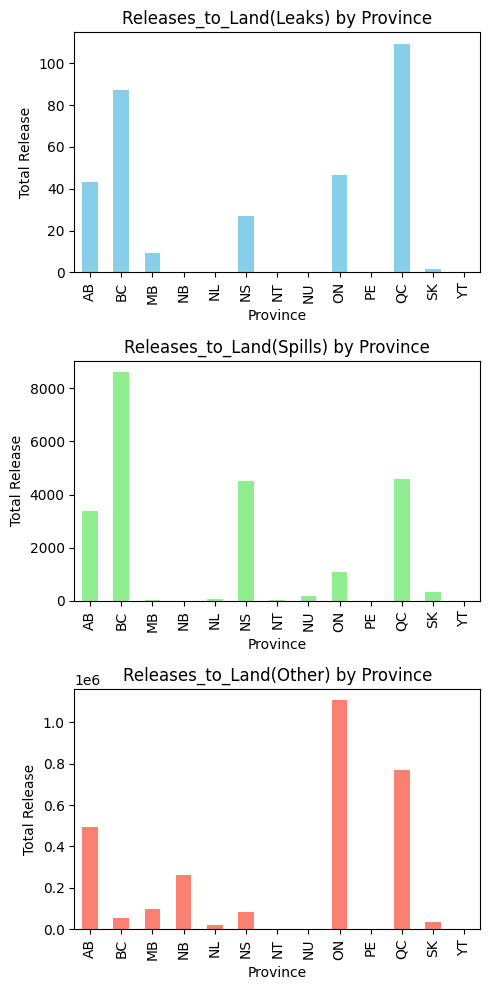

In [ ]:
# Create subplots for the 3 types of releases to land
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

# Plot 'Releases_to_Land(Leaks)' by province
df_NPRI.groupby('PROVINCE')['Releases_to_Land(Leaks)'].sum().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Releases_to_Land(Leaks) by Province')
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Total Release')

# Plot 'Releases_to_Land(Spills)' by province
df_NPRI.groupby('PROVINCE')['Releases_to_Land(Spills)'].sum().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Releases_to_Land(Spills) by Province')
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Total Release')

# Plot 'Releases_to_Land(Other)' by province
df_NPRI.groupby('PROVINCE')['Releases_to_Land(Other)'].sum().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Releases_to_Land(Other) by Province')
axs[2].set_xlabel('Province')
axs[2].set_ylabel('Total Release')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Observations**
- Highest release to Land (Leaks) is from Quebec and least is NB, NL, NT, NU. PE and YT.
- Highest release to Land (Spills) is from BC and least is NB, PE, and YT.
- Highest release to Land (Other) is from ON and least is NT, NU, PE and YT

**Plotting the release of substances to water bodies across various provinces.**

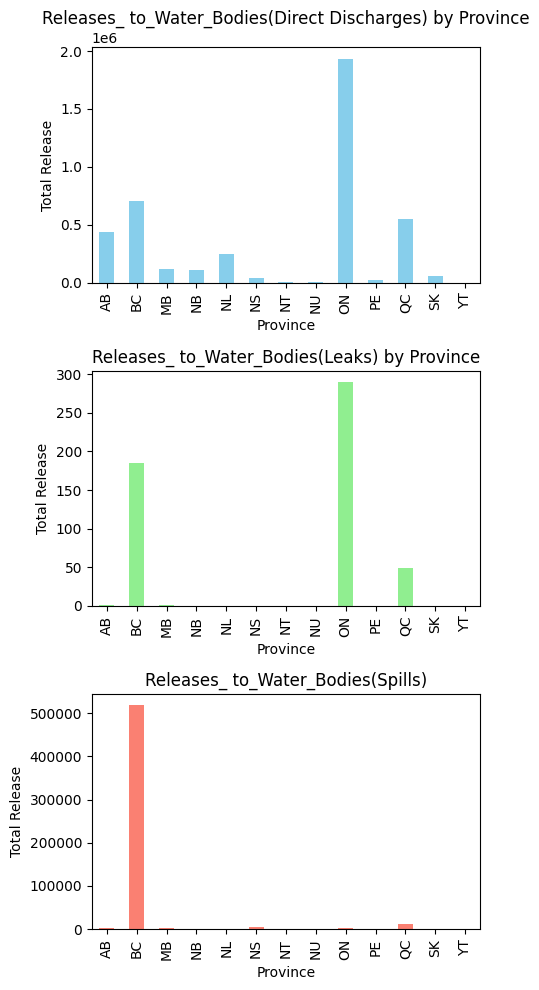

In [ ]:
# Create subplots for the 3 types of releases to water bodies
fig, axs = plt.subplots(3, 1, figsize=(5, 10))

# Plot 'Releases_ to_Water_Bodies(Direct Discharges)' by province
df_NPRI.groupby('PROVINCE')['Releases_ to_Water_Bodies(Direct Discharges)'].sum().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Releases_ to_Water_Bodies(Direct Discharges) by Province')
axs[0].set_xlabel('Province')
axs[0].set_ylabel('Total Release')

# Plot 'Releases_ to_Water_Bodies(Leaks)' by province
df_NPRI.groupby('PROVINCE')['Releases_ to_Water_Bodies(Leaks)'].sum().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Releases_ to_Water_Bodies(Leaks) by Province')
axs[1].set_xlabel('Province')
axs[1].set_ylabel('Total Release')

# Plot 'Releases_ to_Water_Bodies(Spills)' by province
df_NPRI.groupby('PROVINCE')['Releases_ to_Water_Bodies(Spills)'].sum().plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Releases_ to_Water_Bodies(Spills)')
axs[2].set_xlabel('Province')
axs[2].set_ylabel('Total Release')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**Observation**
- Highest release to Water bodies (Direct discharge) is from ON and least is YT.
- Significant release to Water bodies (Leaks) is from BC, ON and QC.
- Significant release to Water bodies (Spills) is from BC.

**Plotting the Sum_of_release_to_all_media_(<1tonne)**

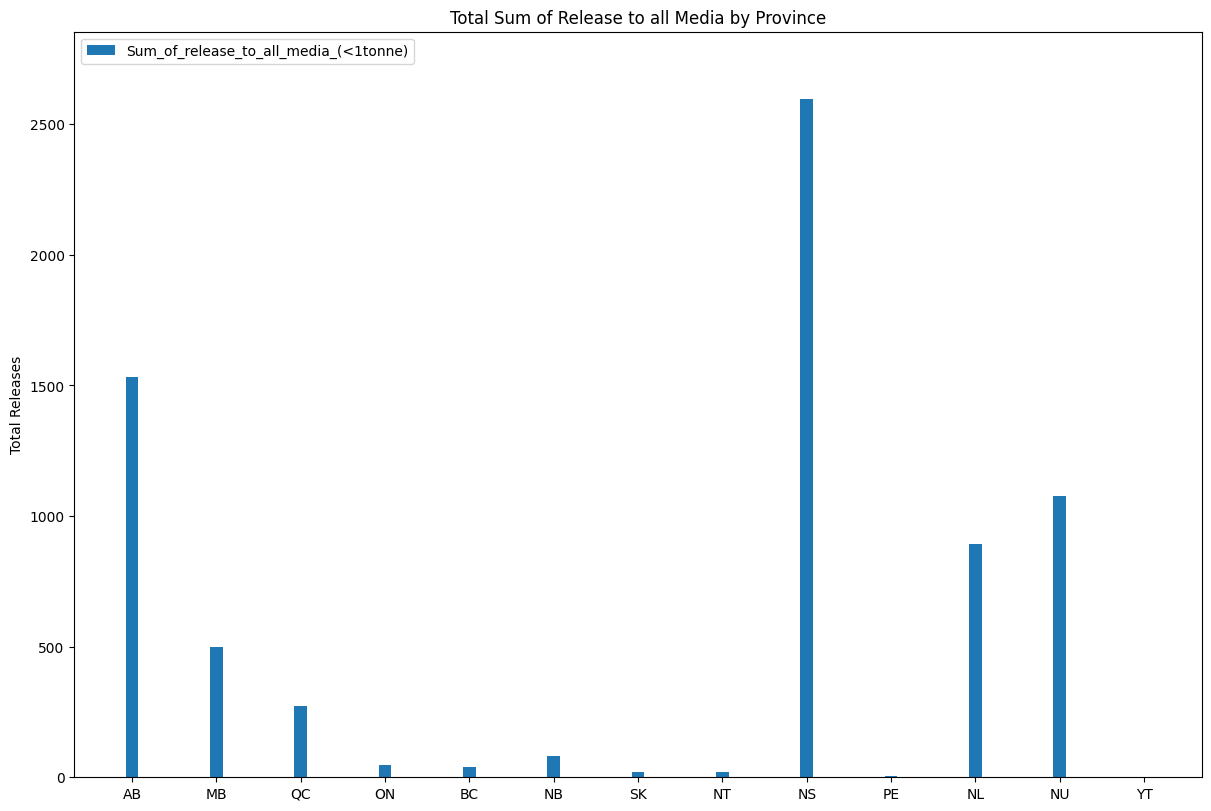

In [ ]:
# Defining provinces and release types
provinces = df_NPRI['PROVINCE'].unique()
release_type = 'Sum_of_release_to_all_media_(<1tonne)'

# Getting the sum of releases for each province
release_sums = df_NPRI.groupby('PROVINCE')[release_type].sum()

x = np.arange(len(provinces))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(layout='constrained', figsize=(12, 8))

# Plotting the bars for the release type
# Removed the loop as it's not needed for a single release type
rects = ax.bar(x, release_sums, width, label=release_type)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Releases')
ax.set_title('Total Sum of Release to all Media by Province')
ax.set_xticks(x, provinces) # Adjusted xticks to match the single bar plot
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, release_sums.max() * 1.1)  # Adjust ylim to max value

plt.show()

**Observation**
- NS has the highest release to all media (less than 1 tonne) and YT has the least.

### 2. Correlation Matrix / Heatmap
A correlation matrix is a table that displays the correlation coefficients between multiple variables. Each cell in the table contains a numerical value
 ( between -1 and +1) that represents the correlation between two variables. A value of +1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation and zeror (0) indicates no correlation.

 A heatmap visualizes the correlation coefficients using color intensity makes and makes it easier to quickly identify patterns and relationships.


In [ ]:
# creating correlation matrix
corr_matrix = df_NPRI.corr(numeric_only=True)
corr_matrix

Reporting_Year/Année  \
Reporting_Year/Année                                      1.000000   
NPRI_ID/No_INRP                                           0.378644   
NAICS/Code_SCIAN                                         -0.123593   
Latitude                                                  0.163081   
Longitude                                                -0.154856   
Release_to_Air(Fugitive)                                  0.010102   
Release_to_Air(Other_Non-Point)                          -0.037325   
Release_to_Air(Road dust)                                 0.016336   
Release_to_Air(Spills)                                    0.036417   
Release_to_Air(Stack/Point)                              -0.022293   
Release_to_Air(Storage/Handling)                          0.015328   
Releases_to_Land(Leaks)                                   0.158585   
Releases_to_Land(Other)                                   0.011184   
Releases_to_Land(Spills)                                  0.016902   
Releases_ to_Water_Bodies(Direct Discharges)              0.022906   
Releases_ to_Water_Bodies(Leaks)                          0.028291   
Releases_ to_Water_Bodies(Spills)                         0.017708   
Sum_of_release_to_all_media_(<1tonne)                    -0.001640   

                                              NPRI_ID/No_INRP  \
Reporting_Year/Année                                 0.378644   
NPRI_ID/No_INRP                                      1.000000   
NAICS/Code_SCIAN                                    -0.331809   
Latitude                                             0.395202   
Longitude                                           -0.423095   
Release_to_Air(Fugitive)                            -0.021040   
Release_to_Air(Other_Non-Point)                     -0.027487   
Release_to_Air(Road dust)                           -0.010170   
Release_to_Air(Spills)                               0.000364   
Release_to_Air(Stack/Point)                         -0.051969   
Release_to_Air(Storage/Handling)                     0.008581   
Releases_to_Land(Leaks)                              0.012322   
Releases_to_Land(Other)                              0.008780   
Releases_to_Land(Spills)                             0.014942   
Releases_ to_Water_Bodies(Direct Discharges)        -0.011585   
Releases_ to_Water_Bodies(Leaks)                    -0.063139   
Releases_ to_Water_Bodies(Spills)                    0.000443   
Sum_of_release_to_all_media_(<1tonne)               -0.008117   

                                              NAICS/Code_SCIAN  Latitude  \
Reporting_Year/Année                                 -0.123593  0.163081   
NPRI_ID/No_INRP                                      -0.331809  0.395202   
NAICS/Code_SCIAN                                      1.000000 -0.369478   
Latitude                                             -0.369478  1.000000   
Longitude                                             0.342358 -0.755114   
Release_to_Air(Fugitive)                             -0.026019  0.036592   
Release_to_Air(Other_Non-Point)                       0.007489  0.048140   
Release_to_Air(Road dust)                            -0.090367  0.112224   
Release_to_Air(Spills)                                0.001469 -0.000192   
Release_to_Air(Stack/Point)                           0.002923 -0.000293   
Release_to_Air(Storage/Handling)                     -0.017485  0.022515   
Releases_to_Land(Leaks)                              -0.009025 -0.015044   
Releases_to_Land(Other)                               0.230128 -0.050193   
Releases_to_Land(Spills)                              0.135105 -0.010206   
Releases_ to_Water_Bodies(Direct Discharges)         -0.084283 -0.049614   
Releases_ to_Water_Bodies(Leaks)                      0.023112 -0.030678   
Releases_ to_Water_Bodies(Spills)                    -0.019896  0.045186   
Sum_of_release_to_all_media_(<1tonne)                -0.009172  0.008412   

                                  

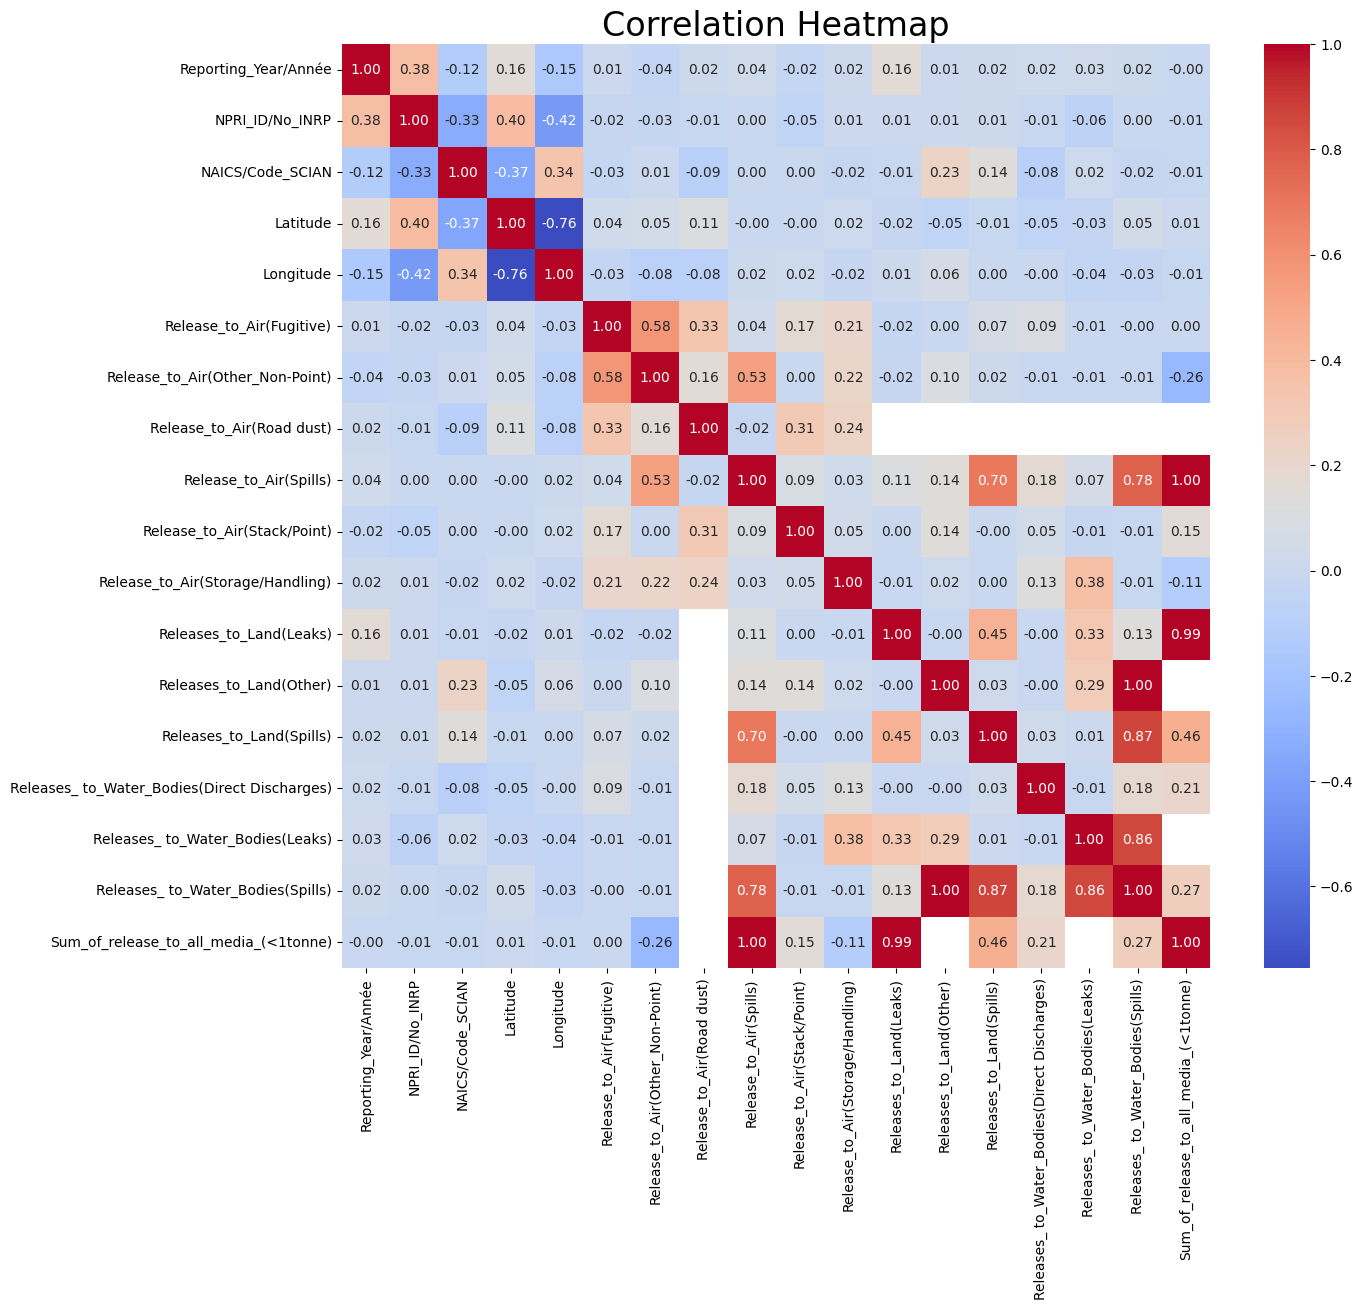

In [ ]:
# Creating a heatmap using Seaborn
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= ".2f")
plt.title('Correlation Heatmap', size = 24)
plt.show()

# displaying map
plt.show()

**Observation**

There is the presense of strong correlations in the dataset between the following features:

Positive correlations:

- Release to air spills and release to land spills
- Release to air spills and release to water bodies spills
- Release to air spills and sum of release to all media
- Release to land leaks and sum of release to all media
- Release to land - other and releases to water bodies - spills
- Release to land - spills and releases to water bodies - spills
- Releases to water bodies - spills and releases to water bodies - leaks

Negative correlation:

The only strong negatively correlated features are longitude and latitide

### 3. Histogram
Histograms provide a graphical representation of the distribution of numerical data. Data points are grouped into bins (intervals) and counts how many data points fall into each bin. It is a great way to visualize the distribution, frequency, and shape of the dataset.

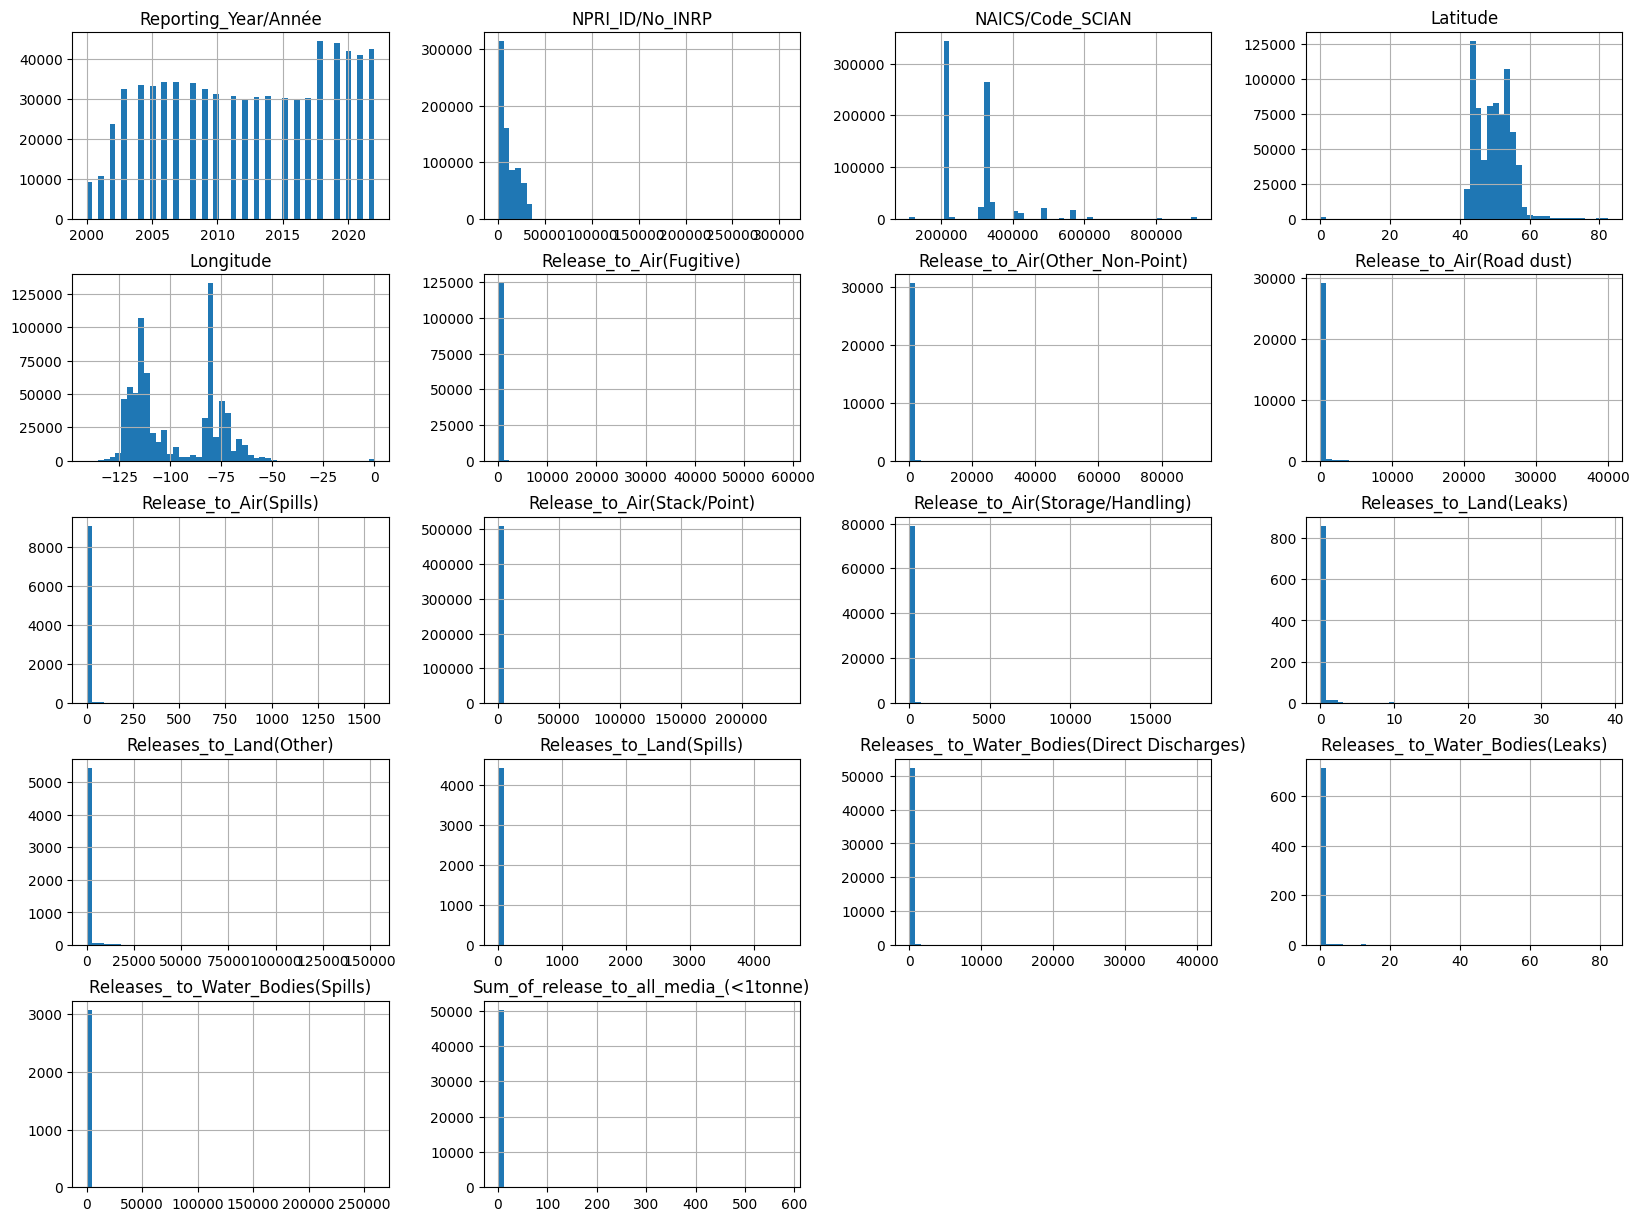

In [ ]:
df_NPRI.hist(bins=50, figsize=(20,15))
plt.show()

**Observation**
- The releases data are skewed with outliers indicated by the gaps in the bars.
- Reporting was at its lowest in the year 2000.
- The reporting between 2007 and 2022 appear fairly stable.

### 4. Boxplot

Also called Box-and-Whisker plot. It is a great way to visualize the distribution of numerical data and identify potential outliers. It displays the median, quartiles, and potential outliers in the dataset. Typically,data points beyond the upper and lower limits of the boxplot are outliers and should be removed except in scenarios where the outlier is a rare occurrence that is of significance.

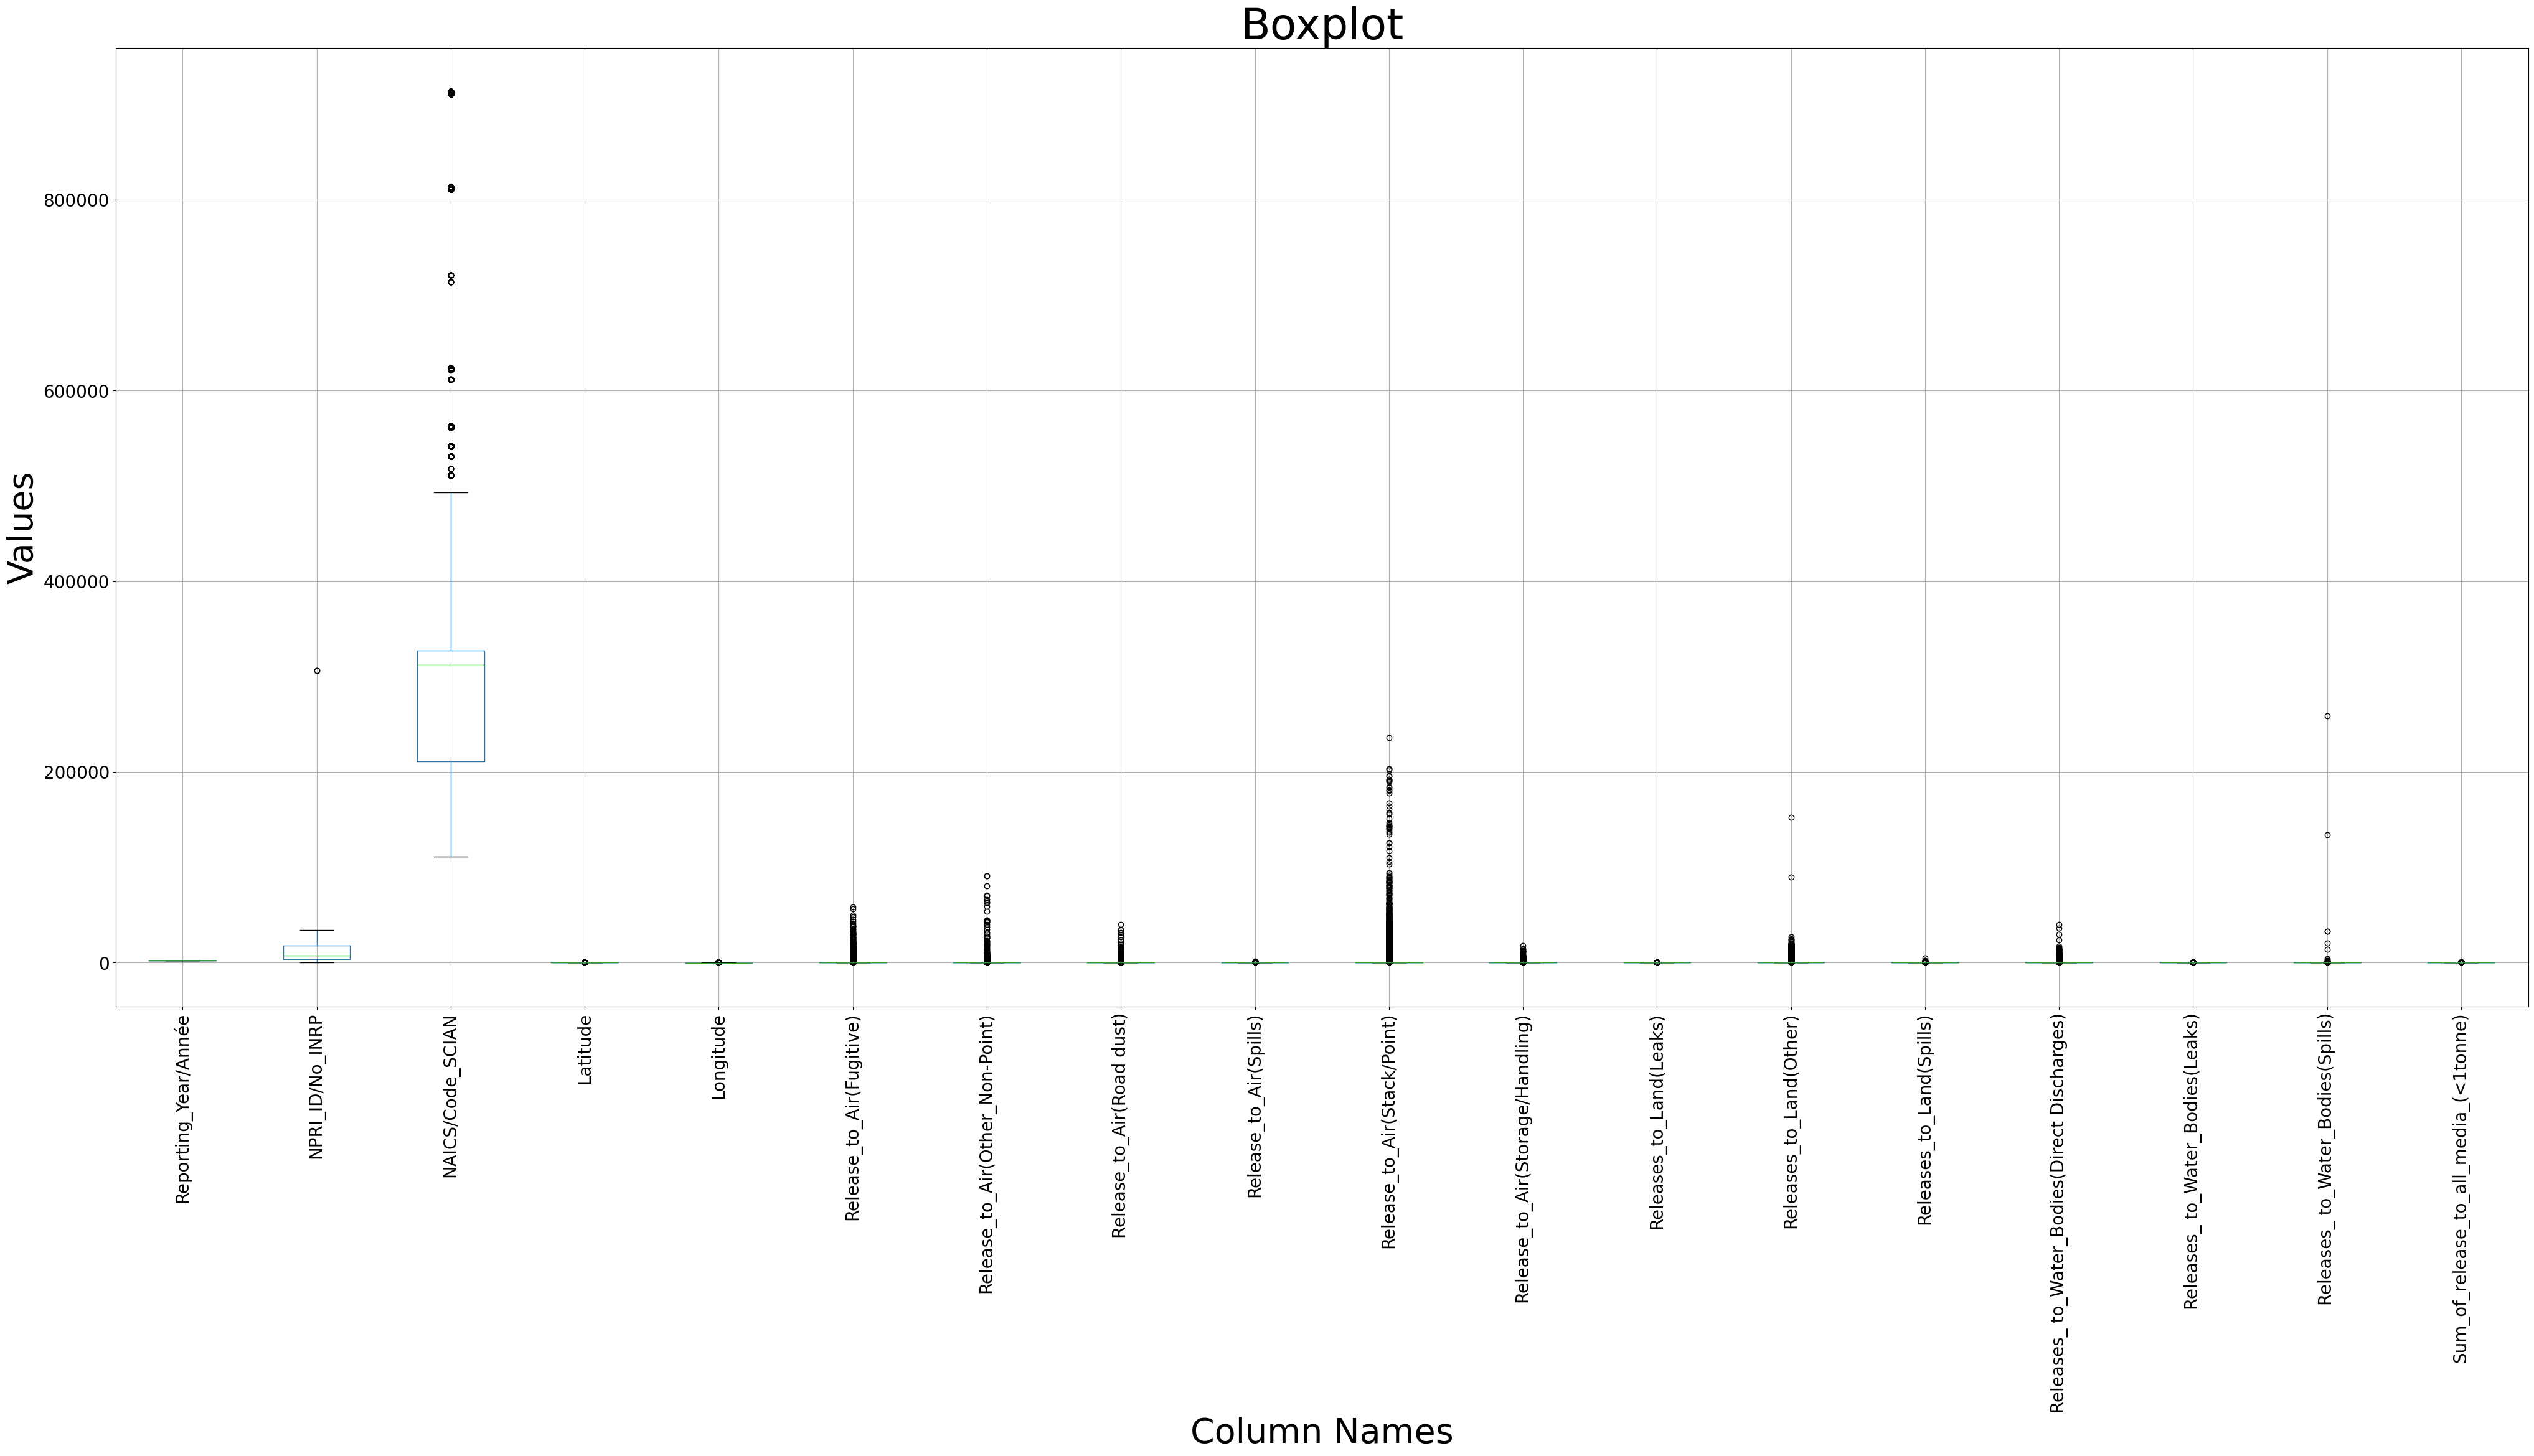

In [ ]:
df_NPRI.boxplot(figsize = (50, 20))
plt.title('Boxplot', size = 50)
plt.xlabel('Column Names', size = 40)
plt.ylabel('Values', size = 40)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.show()

### 5. Multivariate Boxplot

Creating Multivariate Boxplots of the ammonia (total), nitrate_ion, Phosphorus (total) and phosphorus (white and yellow) against the 3 types of releases to water to detect outliers in the release columns

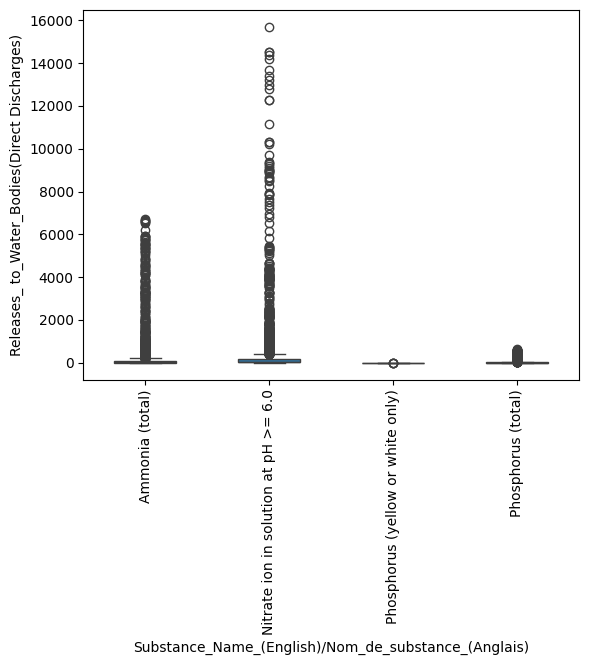

In [ ]:
# Creating multivariate boxplot
# Boxplot of ammonia, nitrate and phosphorus against all the releases
substances = ['Ammonia (total)', 'Nitrate ion in solution at pH >= 6.0',
              'Phosphorus (yellow or white only)', 'Phosphorus (total)']

# Filter the DataFrame for the desired substances
filtered_df = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'].isin(substances)]

# Create the boxplot
sns.boxplot(x='Substance_Name_(English)/Nom_de_substance_(Anglais)',
            y='Releases_ to_Water_Bodies(Direct Discharges)',
            data=filtered_df, width = .5)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

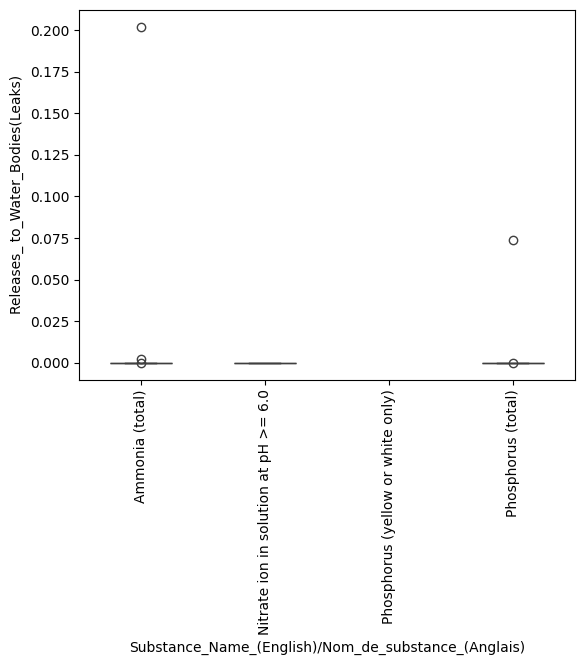

In [ ]:

# Creating multivariate boxplot
# Boxplot of ammonia, nitrate and phosphorus against all the releases
substances = ['Ammonia (total)', 'Nitrate ion in solution at pH >= 6.0',
              'Phosphorus (yellow or white only)', 'Phosphorus (total)']

# Filter the DataFrame for the desired substances
filtered_df = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'].isin(substances)]

# Create the boxplot
sns.boxplot(x='Substance_Name_(English)/Nom_de_substance_(Anglais)',
            y='Releases_ to_Water_Bodies(Leaks)',
            data=filtered_df, width = .5)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

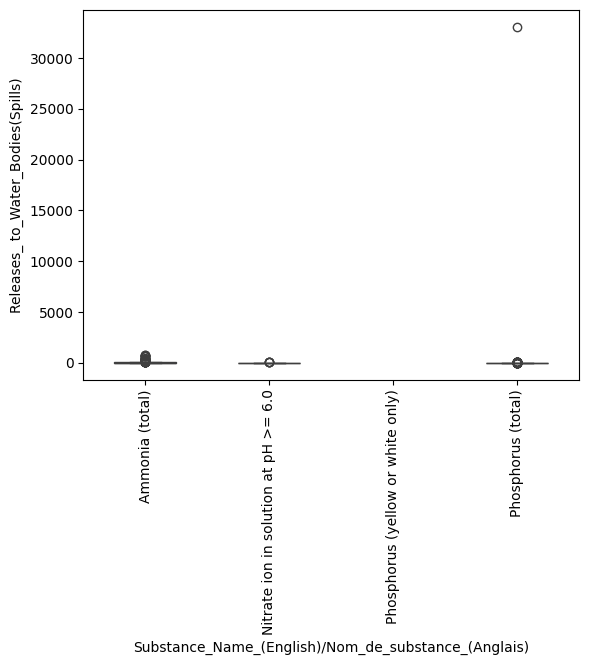

In [ ]:

# Creating multivariate boxplot
# Boxplot of ammonia, nitrate and phosphorus against all the releases
substances = ['Ammonia (total)', 'Nitrate ion in solution at pH >= 6.0',
              'Phosphorus (yellow or white only)', 'Phosphorus (total)']

# Filter the DataFrame for the desired substances
filtered_df = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'].isin(substances)]

# Create the boxplot
sns.boxplot(x='Substance_Name_(English)/Nom_de_substance_(Anglais)',
            y='Releases_ to_Water_Bodies(Spills)',
            data=filtered_df, width = .5)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

**Observation**
- The presence of outliers shown in the box plot corroborates the observation from histogram plot.

### 5. Line plots

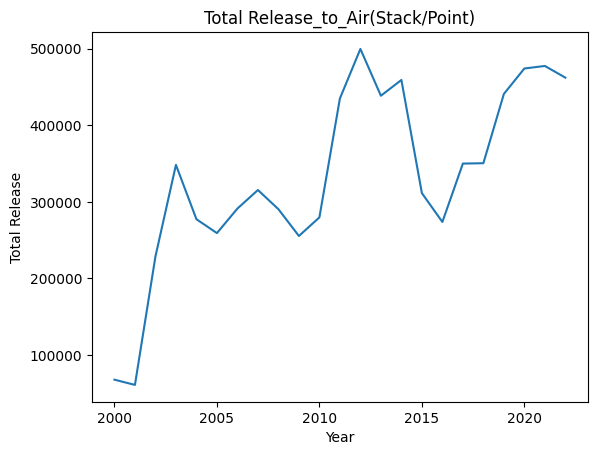

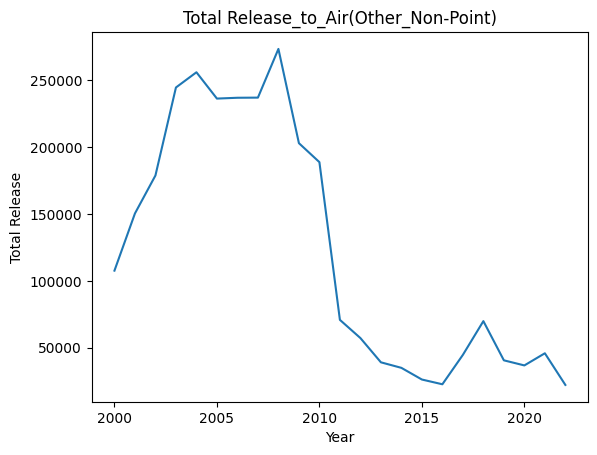

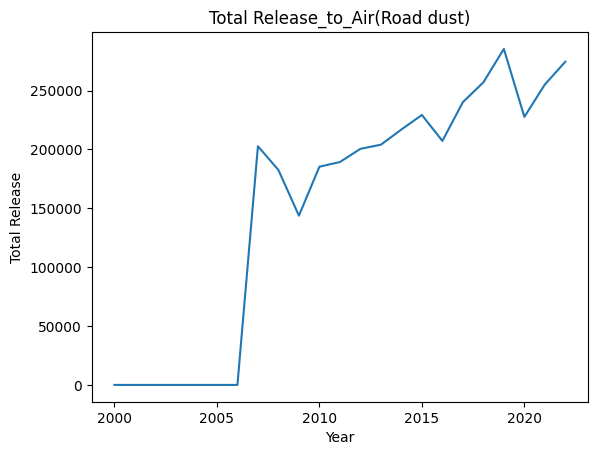

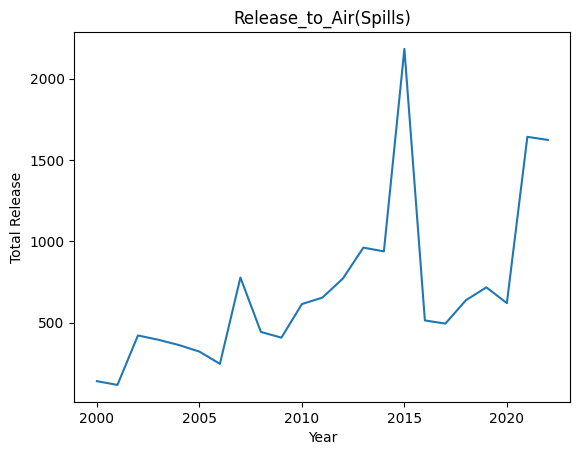

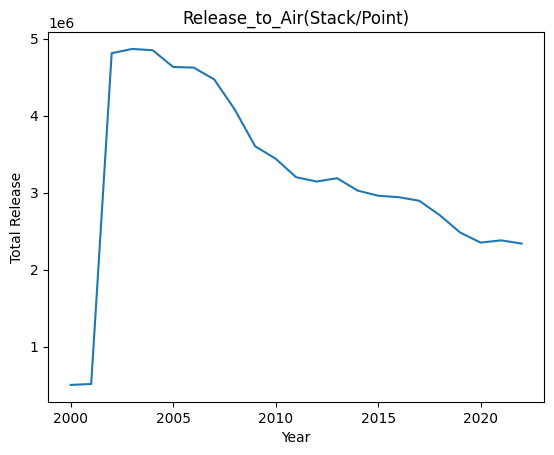

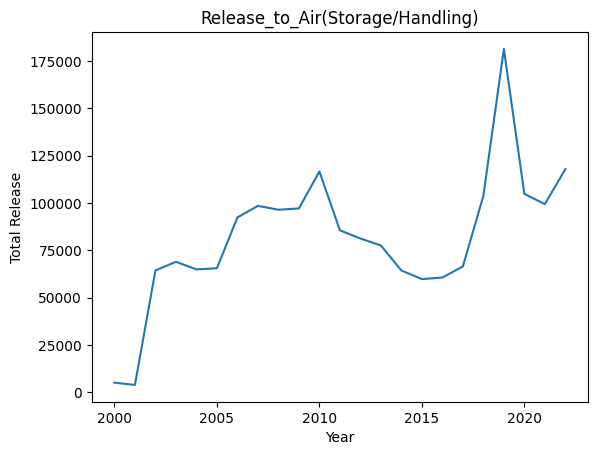

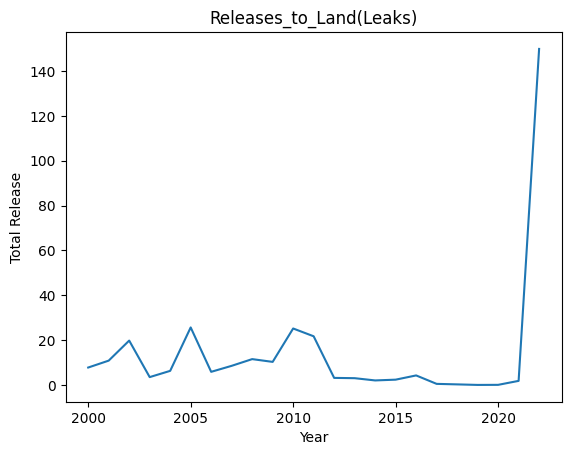

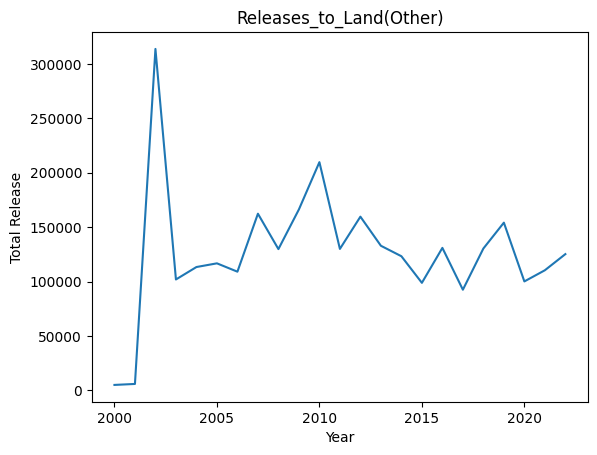

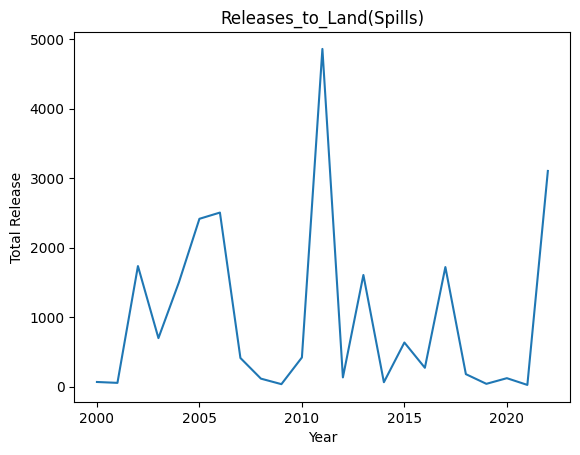

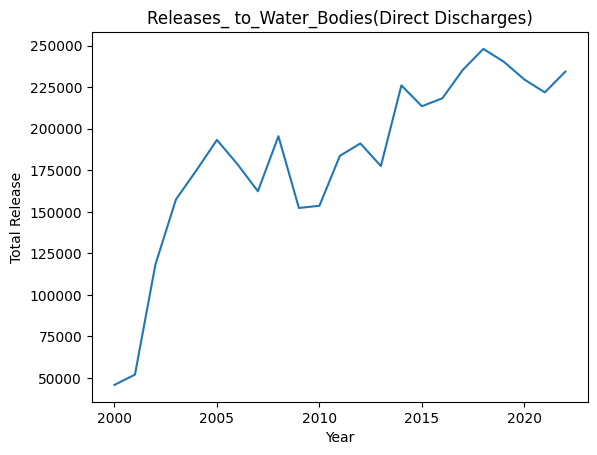

In [ ]:
#if 'Reporting_Year/Année' in df.columns:
df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Fugitive)'].sum().plot(kind='line')
plt.title('Total Release_to_Air(Stack/Point)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()


#if 'Reporting_Year/Année' in df.columns:
df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Other_Non-Point)'].sum().plot(kind='line')
plt.title('Total Release_to_Air(Other_Non-Point)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

#if 'Reporting_Year/Année' in df.columns:
df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Road dust)'].sum().plot(kind='line')
plt.title('Total Release_to_Air(Road dust)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Spills)'].sum().plot(kind='line')
plt.title('Release_to_Air(Spills)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Stack/Point)'].sum().plot(kind='line')
plt.title('Release_to_Air(Stack/Point)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Release_to_Air(Storage/Handling)'].sum().plot(kind='line')
plt.title('Release_to_Air(Storage/Handling)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Releases_to_Land(Leaks)'].sum().plot(kind='line')
plt.title('Releases_to_Land(Leaks)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Releases_to_Land(Other)'].sum().plot(kind='line')
plt.title('Releases_to_Land(Other)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Releases_to_Land(Spills)'].sum().plot(kind='line')
plt.title('Releases_to_Land(Spills)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

df_NPRI.groupby('Reporting_Year/Année')['Releases_ to_Water_Bodies(Direct Discharges)'].sum().plot(kind='line')
plt.title('Releases_ to_Water_Bodies(Direct Discharges)')
plt.xlabel('Year')
plt.ylabel('Total Release')
plt.show()

**The line plot shows the trend of release amount over a period of 22 years**

## **Data Problems  / Issue Dectecion**


 Dtype refers to the data type of the elements within a DataFrame. Each column in a pandas DataFrame can have a different dtype. In this dataset, we identified some columns with dtype int64 and object but the correct dtype should be category (see summary of columns with wrong dtype in the Table 1 below. This is an issue that will be addressed in the Issue Handling section.

**Table 1.**

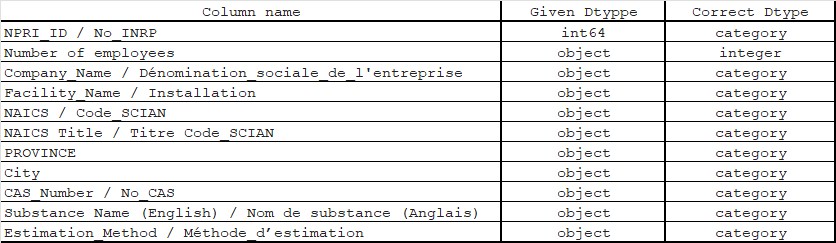

 2. Missing values refers to cells in the dataframe that contain null values and are typically represented as NaN (Not a Number). Many machine algorithm cannot handle datset with missing values, thus we will be filling these null values with appropriate techniques. Table 2 shows the list of columns with missing values, the amount and percentage of missing values.



**Table 2.**

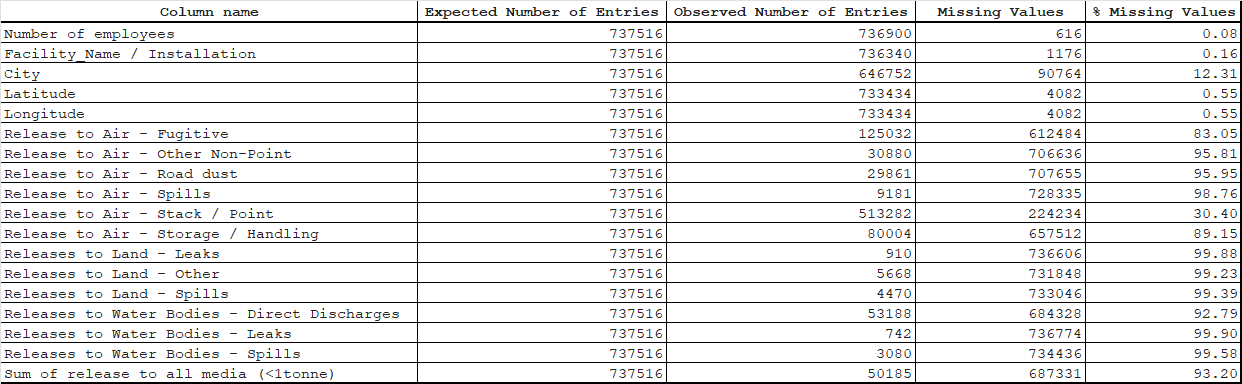

In [ ]:
# code to confirm the number of nulls in each column
df_NPRI.isnull().sum()

Reporting_Year/Année                                        0
NPRI_ID/No_INRP                                             0
Number_of_Employees                                       616
Company_Name/Dénomination_sociale_de_l'entreprise           0
Facility_Name/Installation                               1176
NAICS/Code_SCIAN                                            0
NAICS Title/Titre_Code_SCIAN                                0
PROVINCE                                                    0
City                                                    90764
Latitude                                                 4082
Longitude                                                4082
CAS_Number/No_CAS                                           0
Substance_Name_(English)/Nom_de_substance_(Anglais)         0
Units/Unités                                                0
Estimation_Method/Méthode_d’estimation                      0
Release_to_Air(Fugitive)                               612484
Release_to_Air(Other_Non-Point)                        706636
Release_to_Air(Road dust)                              707655
Release_to_Air(Spills)                                 728335
Release_to_Air(Stack/Point)                            224234
Release_to_Air(Storage/Handling)                       657512
Releases_to_Land(Leaks)                                736606
Releases_to_Land(Other)                                731848
Releases_to_Land(Spills)                               733046
Releases_ to_Water_Bodies(Direct Discharges)           684328
Releases_ to_Water_Bodies(Leaks)                       736774
Releases_ to_Water_Bodies(Spills)                      734436
Sum_of_release_to_all_media_(<1tonne)                  687331
dtype: int64

Inconsistent Data can refer to  incorrect formats, or varying representations of the same information.

- In the Units column, there are 4 different types of units for substance releases (gTEQ, grams, kg, tonnes). To ensure consistency, we need to use only one unit of measurement for all substances released

- Uppercase vs lowercase e.g CHEMTURA CANADA CO/CIE and Chemtura Canada Co. Cie. are the same company

- Incorrect spelling

- The same entry with slight differences in nomenclature e.g., in Company_Name column, 349977 ONTARIO and 349977 ONTARIO LIMITED are the same company because they have the same facility name and the same NAICS Title.

In [ ]:
# checking for the unique units of measurement in the Units column
df_NPRI['Units/Unités'].unique()

array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

Inconsistent Column Names Some of the column names have trailing spaces and apostrophe (') causing issues with calling them in codes. For example:
'Units / Unités',

'Release to Air - Spills ',

'Company_Name / Dénomination_sociale_de_l'entreprise'

## **Data Preparation**

We coined this step as data preparation because we identified some data issues that needs to be addressed prior to splitting. Below are the list
- sychronize data units
- remove duplicates

After this we will split the dataset into Train and Test before continuing with the rest of the cleaning. The reason for the split is to avoid data leakage between the train and test set.

### **1. Sychronize data units**

To maintain consistency in our dataset, we will be converting all the units to kilogram To achieve this we will
- convert the tonnes and grams to kilograms.
- convert the g TEQ to kg TEQ as well

g TEQ is a special unit that measures toxic equivalency factor. We will retain this unit and create a special feature for it.

In [ ]:
# checking for the different units of measurement for pollutants in the dataset
df_NPRI['Units/Unités'].unique()

array(['tonnes', 'kg', 'grams', 'g TEQ'], dtype=object)

In [ ]:
# checking the number of entries for each unit type
df_NPRI['Units/Unités'].value_counts()

Units/Unités
tonnes    658955
kg         70186
g TEQ       4816
grams       3559
Name: count, dtype: int64

In [ ]:
# unit conversion

value = [
       'Releases_ to_Water_Bodies(Direct Discharges)',
       'Releases_ to_Water_Bodies(Leaks)', 'Releases_ to_Water_Bodies(Spills)']

Units = ['tonnes', 'kg', 'grams']

def convert_units(value, Units):
    if Units == 'tonnes':
        return value * 1000  # Convert tonnes to kilograms
    elif Units == 'grams':
        return value / 1000  # Convert grams to kilograms
    elif Units == 'g TEQ':
        return value / 1000  # Convert g TEQ (already in grams) to kilograms
    else:
        return value  # Kilograms remain unchanged

for col in value:
    df_NPRI[col] = df_NPRI.apply(lambda row: convert_units(row[col], row['Units/Unités']), axis=1)

In [ ]:
# Renaming tonnes and grams to kilograms and g TEQ to kg TEQ

# Dictionary to map old unit values to new ones
unit_mapping = {
    'tonnes': 'kg',
    'grams': 'kg',
    'g TEQ': 'kg TEQ'
}

# Replace the values in the 'Units' column using the mapping
df_NPRI['Units/Unités'] = df_NPRI['Units/Unités'].replace(unit_mapping)


In [ ]:
# checking for the different units of measurement for pollutants in the dataset after conversion
df_NPRI['Units/Unités'].unique()

array(['kg', 'kg TEQ'], dtype=object)

### **2. Checking and removing duplicate data entries**

In [ ]:
# checking for duplicates in the dataframe
df_NPRI.duplicated().sum()

0

There are no duplicates in this dataset and it confirms the result from the initial data profiling carried out. So there is no need to remove any duplicate.

### **3. Changing columns with "Object" dtype into Categories**

With the exception of the "Number of Employees" column we will change the object column types into category. We will change that of the number of employees after data splitting to avoid data leakage

In [ ]:
#changing columns to the appropriate data type
df_NPRI['Reporting_Year/Année'] = df_NPRI['Reporting_Year/Année'].astype('category')
df_NPRI['NPRI_ID/No_INRP'] = df_NPRI['NPRI_ID/No_INRP'].astype('category')
#df_NPRI['Number_of_Employees'] = df_NPRI['Number_of_Employees'].astype('int')
df_NPRI["Company_Name/Dénomination_sociale_de_l'entreprise"] = df_NPRI["Company_Name/Dénomination_sociale_de_l'entreprise"].astype('category')
df_NPRI['Facility_Name/Installation'] = df_NPRI['Facility_Name/Installation'].astype('category')
df_NPRI['NAICS/Code_SCIAN'] = df_NPRI['NAICS/Code_SCIAN'].astype('category')
df_NPRI['NAICS Title/Titre_Code_SCIAN'] = df_NPRI['NAICS Title/Titre_Code_SCIAN'].astype('category')
df_NPRI['PROVINCE'] = df_NPRI['PROVINCE'].astype('category')
df_NPRI['City'] = df_NPRI['City'].astype('category')
df_NPRI['Latitude'] = df_NPRI['Latitude'].astype('float')
df_NPRI['Longitude'] = df_NPRI['Longitude'].astype('float')
df_NPRI['CAS_Number/No_CAS'] = df_NPRI['CAS_Number/No_CAS'].astype('category')
df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'] = df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'].astype('category')
df_NPRI['Units/Unités'] = df_NPRI['Units/Unités'].astype('category')
df_NPRI['Estimation_Method/Méthode_d’estimation'] = df_NPRI['Estimation_Method/Méthode_d’estimation'].astype('category')

# **Phase 2 - Linear Regression Model**

###  Filtering dataset based on pollutants of interest.

Since our prediction is focused on ammonia, nitrate ions and phosporus only, we will filter our dataset into three different dataframes based on the substance types of interest.

In [ ]:
# create a dataframe for ammonia(total)
df_NPRI_ammonia = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'] == 'Ammonia (total)']

#reset index
df_NPRI_ammonia = df_NPRI_ammonia.reset_index(drop=True)


df_NPRI_ammonia.shape

(13934, 28)

In [ ]:
# create a dataframe for phosphorsu(total)
df_NPRI_phosphorus = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'] == 'Phosphorus (total)']


#reset index
df_NPRI_phosphorus = df_NPRI_phosphorus.reset_index(drop=True)

df_NPRI_phosphorus.shape

(8031, 28)

In [ ]:
# create a dataframe for Nitrate ion
df_NPRI_nitrate = df_NPRI[df_NPRI['Substance_Name_(English)/Nom_de_substance_(Anglais)'] == 'Nitrate ion in solution at pH >= 6.0']

#reset index
df_NPRI_nitrate = df_NPRI_nitrate.reset_index(drop=True)

df_NPRI_nitrate.shape

(4357, 28)

## **Ammonia Dataframe**

## Feature Engineering and Preprocessing

In this step we carry out data aligning to ensure our dataset is suitable for use in the machine learning model. This includes splitting our data into train and test steps, and carryin out some further cleanin steps.



In [ ]:
# checking the number of years present in the dataframe
df_NPRI['Reporting_Year/Année'].nunique()

23

In [ ]:
# making a list of the number of years present in the dataframe
df_NPRI['Reporting_Year/Année'].unique()

[2000, 2001, 2002, 2003, 2004, ..., 2018, 2019, 2020, 2021, 2022]
Length: 23
Categories (23, int64): [2000, 2001, 2002, 2003, ..., 2019, 2020, 2021, 2022]

### Splitting dataset into Train and Test sets

We will go ahead to split the dataset using year 2018 as cutoff to separate dataset into test and train set (years 2000 to 2018 will be train set and years 2019 to 2022 will be the test set).

Step 1) Sort the dataframe by date (Reporting_Year/Année)

Step 2) Write code to separate into train and test set

In [ ]:


def split_data(df, year_column, split_year):
    """
    Splits the ammonia dataset into training and testing sets based on a specified year.

    Parameters:
        df (pd.DataFrame): The input DataFrame to be split.
        year_column (str): The name of the column containing the reporting year.
        split_year (int): The year to split the data. Rows with years <= split_year go to training, others to testing.

    Returns:
        tuple: A tuple containing two DataFrames: (train_data, test_data).
    """
    # Make a copy of the dataframe
    df_copy = df.copy()

    # Convert the year column to a categorical type (ordered)
    df_copy[year_column] = pd.Categorical(df_copy[year_column], ordered=True)

    # Split into training and testing sets
    train_data = df_copy[df_copy[year_column] <= split_year]
    test_data = df_copy[df_copy[year_column] > split_year]

    return train_data, test_data

def fill_missing_coordinates(df, facility_column, latitude_column, longitude_column):
    """
    Fills missing latitude and longitude values for a facility using the first non-null coordinates
    from the same facility's data.

    Parameters:
        df (pd.DataFrame): The input DataFrame with missing latitude and longitude values.
        facility_column (str): The column name for the facility identifier.
        latitude_column (str): The column name for latitude.
        longitude_column (str): The column name for longitude.

    Returns:
        pd.DataFrame: The DataFrame with missing latitude and longitude values filled.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Iterate through facilities with missing latitude or longitude
    for latitude, longitude, facility_name in df_copy[[latitude_column, longitude_column, facility_column]].itertuples(index=False):
        if pd.isna(latitude) and pd.isna(longitude):
            # Filter rows for the current facility
            facility_data = df_copy[df_copy[facility_column] == facility_name]

            # Find non-null latitude and longitude for the facility
            non_null_latitude = facility_data[latitude_column].dropna()
            non_null_longitude = facility_data[longitude_column].dropna()

            # If non-null latitude and longitude exist, update missing values
            if not non_null_latitude.empty and not non_null_longitude.empty:
                df_copy.loc[df_copy[facility_column] == facility_name, latitude_column] = non_null_latitude.iloc[0]
                df_copy.loc[df_copy[facility_column] == facility_name, longitude_column] = non_null_longitude.iloc[0]

    return df_copy

def fill_missing_cities(df, facility_column, city_column):
    """
    Fills missing city values for facilities using the first non-null city value
    from the same facility's data.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing city and facility data.
        facility_column (str): The column name representing facility names.
        city_column (str): The column name representing the city.

    Returns:
        pd.DataFrame: A DataFrame with missing city values filled.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Iterate through each row with city and facility data
    for city, facility_name in df_copy[[city_column, facility_column]].itertuples(index=False):
        # If the city is missing
        if pd.isna(city):
            # Get data for the current facility
            facility_data = df_copy[df_copy[facility_column] == facility_name]

            # Find the first non-null city for this facility
            non_null_city = facility_data[city_column].dropna()

            # If a non-null city exists, fill the missing city
            if not non_null_city.empty:
                df_copy.loc[df_copy[facility_column] == facility_name, city_column] = non_null_city.iloc[0]

    return df_copy

def fill_missing_cities_by_company(df, company_column, city_column):
    """
    Fills missing city values for companies using the first non-null city value
    from the same company's data.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing city and company data.
        company_column (str): The column name representing company names.
        city_column (str): The column name representing the city.

    Returns:
        pd.DataFrame: A DataFrame with missing city values filled.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Iterate through each row with city and company data
    for city, company_name in df_copy[[city_column, company_column]].itertuples(index=False):
        # If the city is missing
        if pd.isna(city):
            # Get data for the current company
            company_data = df_copy[df_copy[company_column] == company_name]

            # Find the first non-null city for this company
            non_null_city = company_data[city_column].dropna()

            # If a non-null city exists, fill the missing city
            if not non_null_city.empty:
                df_copy.loc[df_copy[company_column] == company_name, city_column] = non_null_city.iloc[0]

    return df_copy


def fill_missing_numeric_with_median(df, column_name):
    """
    Fills missing values in a specified numeric column with the median of the column.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): The name of the column to process.

    Returns:
        pd.DataFrame: A DataFrame with missing values in the specified column filled with the median.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Convert the column to numeric, replacing non-numeric values with NaN
    df_copy[column_name] = pd.to_numeric(df_copy[column_name], errors='coerce')

    # Fill NaN values with the median of the numeric values
    df_copy[column_name] = df_copy[column_name].fillna(df_copy[column_name].median())

    return df_copy




In [ ]:
df_NPRI_ammonia1 = split_data(df = df_NPRI_ammonia, year_column = 'Reporting_Year/Année', split_year = 2018)

# Unpack the tuple into train_data and test_data
train_data, test_data = df_NPRI_ammonia1

train_ammonia = train_data
test_ammonia = test_data

train_ammonia.shape, test_ammonia.shape

((11489, 28), (2445, 28))

Cleaning the train and test sets separately to avoid data leakage

In [ ]:
train_ammonia.isnull().sum()

Reporting_Year/Année                                       0
NPRI_ID/No_INRP                                            0
Number_of_Employees                                       13
Company_Name/Dénomination_sociale_de_l'entreprise          0
Facility_Name/Installation                                 2
NAICS/Code_SCIAN                                           0
NAICS Title/Titre_Code_SCIAN                               0
PROVINCE                                                   0
City                                                      63
Latitude                                                  44
Longitude                                                 44
CAS_Number/No_CAS                                          0
Substance_Name_(English)/Nom_de_substance_(Anglais)        0
Units/Unités                                               0
Estimation_Method/Méthode_d’estimation                     0
Release_to_Air(Fugitive)                                9394
Release_to_Air(Other_Non-Point)                        10963
Release_to_Air(Road dust)                              11489
Release_to_Air(Spills)                                 11211
Release_to_Air(Stack/Point)                             8486
Release_to_Air(Storage/Handling)                       10693
Releases_to_Land(Leaks)                                11450
Releases_to_Land(Other)                                11230
Releases_to_Land(Spills)                               11361
Releases_ to_Water_Bodies(Direct Discharges)            6158
Releases_ to_Water_Bodies(Leaks)                       11447
Releases_ to_Water_Bodies(Spills)                      11230
Sum_of_release_to_all_media_(<1tonne)                  10329
dtype: int64

In [ ]:
test_ammonia.isnull().sum()

Reporting_Year/Année                                      0
NPRI_ID/No_INRP                                           0
Number_of_Employees                                       0
Company_Name/Dénomination_sociale_de_l'entreprise         0
Facility_Name/Installation                                0
NAICS/Code_SCIAN                                          0
NAICS Title/Titre_Code_SCIAN                              0
PROVINCE                                                  0
City                                                     42
Latitude                                                 12
Longitude                                                12
CAS_Number/No_CAS                                         0
Substance_Name_(English)/Nom_de_substance_(Anglais)       0
Units/Unités                                              0
Estimation_Method/Méthode_d’estimation                    0
Release_to_Air(Fugitive)                               2052
Release_to_Air(Other_Non-Point)                        2329
Release_to_Air(Road dust)                              2445
Release_to_Air(Spills)                                 2380
Release_to_Air(Stack/Point)                            1736
Release_to_Air(Storage/Handling)                       2339
Releases_to_Land(Leaks)                                2440
Releases_to_Land(Other)                                2398
Releases_to_Land(Spills)                               2416
Releases_ to_Water_Bodies(Direct Discharges)           1334
Releases_ to_Water_Bodies(Leaks)                       2441
Releases_ to_Water_Bodies(Spills)                      2370
Sum_of_release_to_all_media_(<1tonne)                  2232
dtype: int64

Checking to see if any of the missing latitude and longitude rows have been previously registered by the same company and filling it with already available information

In [ ]:
train_ammonia = fill_missing_coordinates(train_ammonia, 'Facility_Name/Installation', 'Latitude', 'Longitude')
test_ammonia = fill_missing_coordinates(test_ammonia, 'Facility_Name/Installation', 'Latitude', 'Longitude')

Dropping the rows  that still have missing latitude and longitude values

In [ ]:
train_ammonia = train_ammonia.dropna(subset=['Latitude', 'Longitude'])
test_ammonia = test_ammonia.dropna(subset=['Latitude', 'Longitude'])

In [ ]:
# drop the rows with missing facility name
train_ammonia = train_ammonia.dropna(subset=['Facility_Name/Installation'])


Using the same approach to fill in the missing city names

In [ ]:
train_ammonia = fill_missing_cities(train_ammonia, 'Facility_Name/Installation', 'City')
test_ammonia = fill_missing_cities(test_ammonia, 'Facility_Name/Installation', 'City')

In [ ]:
train_ammonia = fill_missing_cities_by_company(train_ammonia, "Company_Name/Dénomination_sociale_de_l'entreprise", 'City')
test_ammonia = fill_missing_cities_by_company(test_ammonia, "Company_Name/Dénomination_sociale_de_l'entreprise", 'City')

Dropping the rows that still have missing city information

In [ ]:
# drop the rows with missing facility name
train_ammonia = train_ammonia.dropna(subset=['City'])
test_ammonia = test_ammonia.dropna(subset=['City'])

Filling the missing 'Number of Employees' with the median

In [ ]:
train_ammonia = fill_missing_numeric_with_median(train_ammonia, 'Number_of_Employees')


Company information reveals that if there are missing values in the release column it is because no value was reported for the company for that substance or year and it implies that either the company did not release that substance or the amount released does not reach the threshold that requires reporting.

For that reason, we fill the missing values in the release colums as zero(0)

In [ ]:
def fill_missing_with_zeros(df, columns):
    """
    Fills missing values in the specified columns with zeros.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to process.

    Returns:
        pd.DataFrame: A DataFrame with missing values in the specified columns filled with zeros.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Fill missing values in the specified columns with zeros
    for column in columns:
        df_copy[column] = df_copy[column].fillna(0)

    return df_copy


In [ ]:
columns = ['Release_to_Air(Fugitive)',
       'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Road dust)',
       'Release_to_Air(Spills)', 'Release_to_Air(Stack/Point)',
       'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Leaks)',
       'Releases_to_Land(Other)', 'Releases_to_Land(Spills)',
       'Releases_ to_Water_Bodies(Direct Discharges)',
       'Releases_ to_Water_Bodies(Leaks)', 'Releases_ to_Water_Bodies(Spills)',
       'Sum_of_release_to_all_media_(<1tonne)']
for column in columns:
  train_ammonia = fill_missing_with_zeros(train_ammonia, [column])
  test_ammonia = fill_missing_with_zeros(test_ammonia, [column])


In [ ]:
train_ammonia.shape, test_ammonia.shape

((11446, 28), (2433, 28))

### Merging the population dataset with our ammonia dataset

The problem focuses on predicting substance release amount based on provincial population. Therefore, at this point we merge the population dataset that contains provincial population information from 2000 to 2022.

In [ ]:
# load the population dataset
df_population = pd.read_csv('Provincial_population_dataset.csv', encoding = 'latin1')

#Setting up notebook so that all columns are displayed
pd.set_option('display.max_columns', None)

# displaying the first 5 columns
df_population.head()


ï»¿Reporting_Year/AnnÃ©e PROVINCE Population
0                      2000       NL  2,116,046
1                      2001       NL    2092160
2                      2002       NL    2080388
3                      2003       NL    2074982
4                      2004       NL    2070803

In [ ]:
#renaming the column names in the population dataset
df_population = df_population.rename(columns={'ï»¿Reporting_Year/AnnÃ©e': 'Reporting_Year/Année', 'Province': 'PROVINCE', 'Population': 'Population'})

# Replace commas in the 'Population' column with empty strings before converting to int
df_population['Population'] = df_population['Population'].str.replace(',', '').astype(int)

In [ ]:
def merge_datasets(df1, df2, merge_columns):
    """
    Merges two DataFrames on specified columns.

    Parameters:
        df1 (pd.DataFrame): The first DataFrame.
        df2 (pd.DataFrame): The second DataFrame.
        merge_columns (list): List of column names to merge on.

    Returns:
        pd.DataFrame: The merged DataFrame.
    """
    return pd.merge(df1, df2, on=merge_columns)



In [ ]:

# Merging the train dataset with the population dataset
train_ammonia = merge_datasets(train_ammonia, df_population, merge_columns=['Reporting_Year/Année', 'PROVINCE'])

# Merging the test dataset with the population dataset
test_ammonia = merge_datasets(test_ammonia, df_population, merge_columns=['Reporting_Year/Année', 'PROVINCE'])

train_ammonia.shape, test_ammonia.shape

((11446, 29), (2433, 29))

### Featuring Engineering on datasets



1.   Creating a new column called "Total Release to Water". The new column is an aggregate of the values the the three release to water column. This new column is our target column in the ML model.
2.   Creating a region  column using K-means clustering on the Latitude and Longitude values in our dataset. This helps with spatial analysis by grouping locations into clusters based on proximity. This simplifies exploring regional trends and identifying spatial patterns in the dataset.



In [ ]:
# Adding Up all the Releases to Water Bodies

Release_to_Water_columns = [
    'Releases_ to_Water_Bodies(Direct Discharges)',
    'Releases_ to_Water_Bodies(Leaks)',
    'Releases_ to_Water_Bodies(Spills)'
]

# Sum the specified release to water bodies columns and create a new column 'Total_Releases_to_Water'
train_ammonia['Total_Release_to_Water'] = train_ammonia[Release_to_Water_columns].sum(axis=1)

# Sum the specified release to water bodies columns and create a new column 'Total_Releases_to_Water'
test_ammonia['Total_Release_to_Water'] = test_ammonia[Release_to_Water_columns].sum(axis=1)

#drop the release to water columns
#train_ammonia = train_ammonia.drop(['Releases_ to_Water_Bodies(Direct Discharges)', 'Releases_ to_Water_Bodies(Leaks)', 'Releases_ to_Water_Bodies(Spills)'], axis = 1)

#drop the release to water columns
#test_ammonia = test_ammonia.drop(['Releases_ to_Water_Bodies(Direct Discharges)', 'Releases_ to_Water_Bodies(Leaks)', 'Releases_ to_Water_Bodies(Spills)'], axis = 1)


In [ ]:
#K means clustering on latitude and longitude
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
train_ammonia['Region'] = kmeans.fit_predict(train_ammonia[['Latitude', 'Longitude']])
test_ammonia['Region'] = kmeans.fit_predict(test_ammonia[['Latitude', 'Longitude']])

Since the unit and the substance column each have one unique column, we drop both columns.

In [ ]:
#drop substance and unit columns
train_ammonia = train_ammonia.drop(['Substance_Name_(English)/Nom_de_substance_(Anglais)', 'Units/Unités'], axis = 1)
test_ammonia = test_ammonia.drop(['Substance_Name_(English)/Nom_de_substance_(Anglais)', 'Units/Unités'], axis = 1)

In [ ]:
train_ammonia.shape, test_ammonia.shape

((11446, 29), (2433, 29))

Building the first model without feature selection steps

We make a copy of the train and test ammonia dataframe. The train_ammonia and test_ammonia can be copied to use during feature selection

In [ ]:
# copy of the train and test sets
train_ammonia_1 = train_ammonia.copy()
test_ammonia_1 = test_ammonia.copy()

# Extract the target variable before dropping it from the features
y_train_ammonia_1 = train_ammonia_1['Total_Release_to_Water']
y_test_ammonia_1 = test_ammonia_1['Total_Release_to_Water']

# Now drop the target variable from the feature sets
X_train_ammonia_1 = train_ammonia_1.drop(['Total_Release_to_Water'], axis = 1)
X_test_ammonia_1 = test_ammonia_1.drop(['Total_Release_to_Water'], axis = 1)

In [ ]:
X_train_ammonia_1.shape, X_test_ammonia_1.shape

((11446, 28), (2433, 28))

In [ ]:
y_train_ammonia_1.shape, y_test_ammonia_1.shape

((11446,), (2433,))

### Normalization

Determining what methods to use for normalization of each of the numerical columns that require normalization.

Columns that don't need normalization

1.   Reporting year- It is temporal data and does not need to be normalized
2.   NPRI_ID - is a unique identifier and should not be scaled
3. Latitude and Longitude - They represent spatial locations and should not be normalized
4. CAS_Number/No_CAS - An identifier for chemicals

Columns that require normalization are the **release columns** and the "**number of employees** column" and the **population** column.



Columns that require encoding:

1.   OneHot for Province (13 unique entries) and Estimation method (11 unique entries).
2.   Binary encoding for Company name(1013 unique entries), Facility_Name(1154 unique entries), NAICS/Code (122 unique entries), NAICS Title(128 unique entries), City(558)









array([[<Axes: title={'center': 'Number_of_Employees'}>,
        <Axes: title={'center': 'Release_to_Air(Fugitive)'}>,
        <Axes: title={'center': 'Release_to_Air(Other_Non-Point)'}>],
       [<Axes: title={'center': 'Release_to_Air(Road dust)'}>,
        <Axes: title={'center': 'Release_to_Air(Spills)'}>,
        <Axes: title={'center': 'Release_to_Air(Stack/Point)'}>],
       [<Axes: title={'center': 'Release_to_Air(Storage/Handling)'}>,
        <Axes: title={'center': 'Releases_to_Land(Leaks)'}>,
        <Axes: title={'center': 'Releases_to_Land(Other)'}>],
       [<Axes: title={'center': 'Releases_to_Land(Spills)'}>,
        <Axes: title={'center': 'Sum_of_release_to_all_media_(<1tonne)'}>,
        <Axes: title={'center': 'Population'}>]], dtype=object)

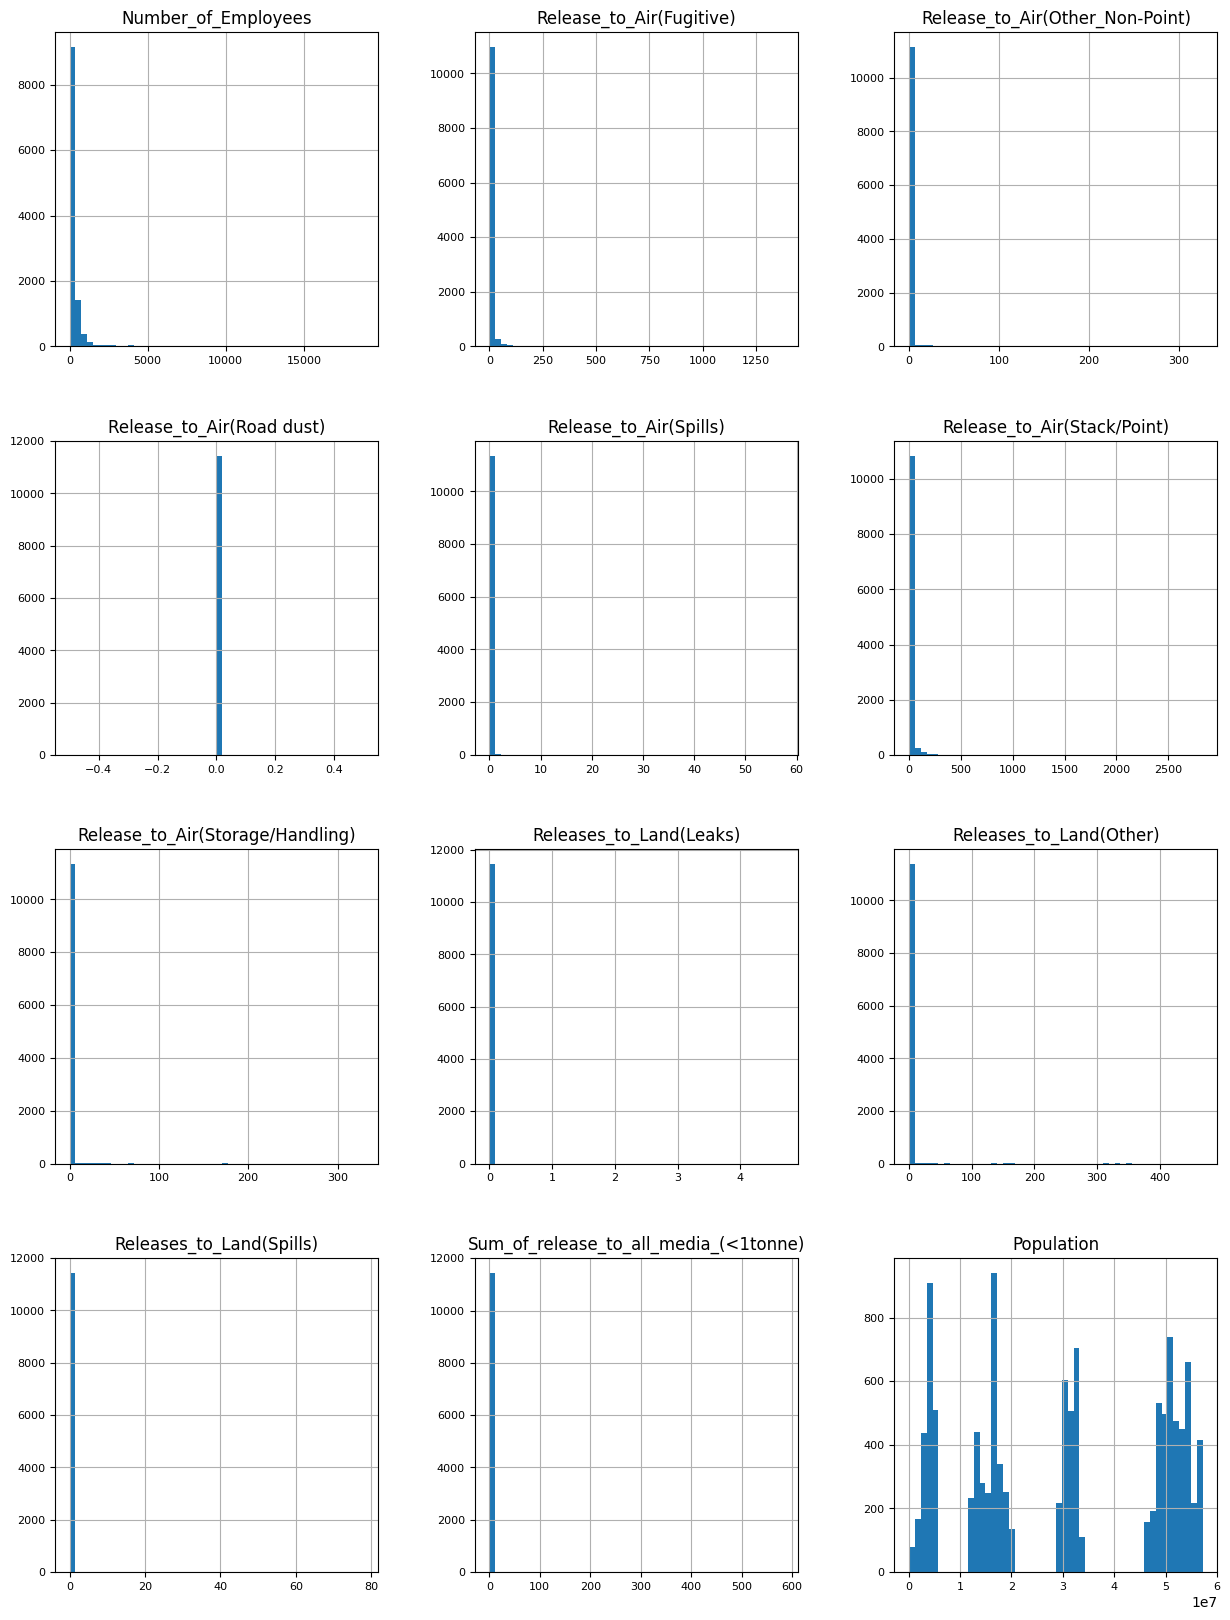

In [ ]:
#histogram plot of all the numerical columns
numerical_columns = [
    'Number_of_Employees',
    'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Road dust)',
    'Release_to_Air(Spills)', 'Release_to_Air(Stack/Point)', 'Release_to_Air(Storage/Handling)',
    'Releases_to_Land(Leaks)', 'Releases_to_Land(Other)', 'Releases_to_Land(Spills)', 'Sum_of_release_to_all_media_(<1tonne)', 'Population']
X_train_ammonia_1[numerical_columns].hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

Based on the histogram distributions above, we care using StandardScaler for normalization. This is because they show a normal distribution irrespective of the skewness.






In [ ]:
def create_and_evaluate_pipeline(X_train, y_train, X_test, y_test):
    """
    Creates and evaluates a machine learning pipeline for regression.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
        X_test (pd.DataFrame): Test feature data.
        y_test (pd.Series): Test target data.

    Returns:
        None
    """

    # Define numerical and categorical features
    numerical_features = ['Number_of_Employees', 'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Stack/Point)', 'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Other)', 'Release_to_Air(Road dust)', 'Release_to_Air(Spills)', 'Releases_to_Land(Leaks)',
                           'Releases_to_Land(Spills)', 'Sum_of_release_to_all_media_(<1tonne)', 'Population' ]



    categorical_features1 = ['PROVINCE', 'Estimation_Method/Méthode_d’estimation']

    categorical_features2 = ["Company_Name/Dénomination_sociale_de_l'entreprise", 'Facility_Name/Installation', 'NAICS/Code_SCIAN', 'NAICS Title/Titre_Code_SCIAN', 'City']

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])


    categorical_transformer1 = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])


    categorical_transformer2 = Pipeline(steps=[('target_encoder', ce.TargetEncoder(cols=categorical_features2))])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[ #Ensure this line and the following 3 lines with tuples are indented at the same level
            ('num', numerical_transformer, numerical_features),

            ('cat1', categorical_transformer1, categorical_features1),
            ('cat2', categorical_transformer2, categorical_features2)
        ]
    )

    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    # Fit the pipeline on training data
    pipeline.fit(X_train, y_train)

    # Transform the test data
    X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

    # Predict with the fitted model
    y_pred = pipeline.predict(X_test)

    # Evaluate the model's performance using RMSE, MAE, and R-squared
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")

In [ ]:
create_and_evaluate_pipeline(X_train_ammonia_1, y_train_ammonia_1, X_test_ammonia_1, y_test_ammonia_1)


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

MAE: 37470.46167994794
RMSE: 140456.75165801088
R-squared: 0.9042361134079245


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Fitting other models

In [ ]:

def evaluate_models(X_train, y_train, X_test, y_test):
    """
    Evaluates multiple regression models using cross-validation and prints out evaluation metrics (RMSE, R-squared, MAE).

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
        X_test (pd.DataFrame): Test feature data.
        y_test (pd.Series): Test target data.

    Returns:
        None
    """
    # Define numerical and categorical features
    numerical_features = ['Number_of_Employees', 'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Stack/Point)', 'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Other)', 'Release_to_Air(Road dust)', 'Release_to_Air(Spills)', 'Releases_to_Land(Leaks)',
                           'Releases_to_Land(Spills)', 'Sum_of_release_to_all_media_(<1tonne)', 'Population'
    ]


    categorical_features1 = ['PROVINCE', 'Estimation_Method/Méthode_d’estimation']
    categorical_features2 = ["Company_Name/Dénomination_sociale_de_l'entreprise",
                             'Facility_Name/Installation', 'NAICS/Code_SCIAN',
                             'NAICS Title/Titre_Code_SCIAN', 'City']

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])


    categorical_transformer1 = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # sparse_output=False for dense matrix
    ])

    categorical_transformer2 = Pipeline(steps=[('target_encoder', ce.TargetEncoder(cols=categorical_features2))])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            #('num2', numerical_transformer2, numerical_features2),
            ('cat1', categorical_transformer1, categorical_features1),
            ('cat2', categorical_transformer2, categorical_features2)
        ])

    # Define models to fit
    models = [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('KNN', KNeighborsRegressor()),
        ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
    ]

    for name, model in models:
        print(f"Evaluating {name}...")

        # Create a pipeline for the current model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Fit the pipeline on training data
        pipeline.fit(X_train, y_train)

        # Predict with the fitted model
        y_pred = pipeline.predict(X_test)

        # Evaluate the model's performance using RMSE, R-squared, and MAE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Print evaluation metrics
        print(f"{name} Performance:")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print("-" * 50)




In [ ]:
evaluate_models(X_train_ammonia_1, y_train_ammonia_1, X_test_ammonia_1, y_test_ammonia_1)

Evaluating Linear Regression...


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Linear Regression Performance:
  RMSE: 302295.7890
  R-squared: 0.5564
  MAE: 106058.9829
--------------------------------------------------
Evaluating Random Forest...


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Random Forest Performance:
  RMSE: 103026.2172
  R-squared: 0.9485
  MAE: 33331.1738
--------------------------------------------------
Evaluating Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Gradient Boosting Performance:
  RMSE: 114201.1198
  R-squared: 0.9367
  MAE: 41804.4887
--------------------------------------------------
Evaluating KNN...
KNN Performance:
  RMSE: 187939.3789
  R-squared: 0.8285
  MAE: 36114.8395
--------------------------------------------------
Evaluating Polynomial Regression...


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Polynomial Regression Performance:
  RMSE: 10876243.4855
  R-squared: -573.2148
  MAE: 391984.4643
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# Calculate the average ammonia release in the training data
average_ammonia_release = y_train_ammonia_1.mean()

# Create a baseline prediction array filled with the average
baseline_predictions = np.full(len(X_test_ammonia_1), average_ammonia_release)

# Calculate RMSE for the baseline model
baseline_rmse = np.sqrt(skMetrics.mean_squared_error(y_test_ammonia_1, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse}")

Baseline RMSE: 453887.89162866765


## **Cross Validataion of the models**

In [ ]:


def cross_validate_models(X_train, y_train, num_folds=5):
    """
    Perform k-fold cross-validation for multiple regression models and print evaluation metrics.

    Parameters:
        X_train (pd.DataFrame): The training feature data.
        y_train (pd.Series): The training target data.
        preprocessor (ColumnTransformer): The preprocessing pipeline for the features.
        num_folds (int): Number of folds for cross-validation. Default is 5.

    Returns:
        dict: A dictionary containing results for each model.
    """

    # Define numerical and categorical features
    numerical_features = ['Number_of_Employees', 'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Stack/Point)', 'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Other)', 'Release_to_Air(Road dust)', 'Release_to_Air(Spills)', 'Releases_to_Land(Leaks)',
                           'Releases_to_Land(Spills)', 'Sum_of_release_to_all_media_(<1tonne)', 'Population'
    ]

    categorical_features1 = ['PROVINCE', 'Estimation_Method/Méthode_d’estimation']
    categorical_features2 = ["Company_Name/Dénomination_sociale_de_l'entreprise",
                             'Facility_Name/Installation', 'NAICS/Code_SCIAN',
                             'NAICS Title/Titre_Code_SCIAN', 'City']

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

    categorical_transformer1 = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))  # sparse_output=False for dense matrix
    ])

    categorical_transformer2 = Pipeline(steps=[('target_encoder', ce.TargetEncoder(cols=categorical_features2))])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num1', numerical_transformer, numerical_features),
            #('num2', numerical_transformer2, numerical_features2),
            ('cat1', categorical_transformer1, categorical_features1),
            ('cat2', categorical_transformer2, categorical_features2)
        ]
    )

    # Define models to fit
    models = [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('KNN', KNeighborsRegressor()),
        ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
    ]

    # Define models with pipelines
    models = [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor()),
        ('Gradient Boosting', GradientBoostingRegressor()),
        ('KNN', KNeighborsRegressor()),
        ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
    ]

    # Initialize dictionaries to store results
    results = {}
    scoring = {
        'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
        'r2': make_scorer(r2_score)
    }

    # Perform cross-validation for each model and store results
    for name, model in models:
        print(f"Cross-validating {name}...")

        # Create a pipeline for the current model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])

        # Create a KFold object
        kfold = KFold(n_splits=num_folds, shuffle=True)

        # Perform cross-validation
        cv_results = cross_validate(pipeline, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)

        # Store the mean RMSE and R2 scores for the current model
        avg_rmse = -np.mean(cv_results['test_neg_root_mean_squared_error'])  # Negate to make RMSE positive
        avg_r2 = np.mean(cv_results['test_r2'])

        # Save results in a dictionary
        results[name] = {
            'pipeline': pipeline,
            'rmse': avg_rmse,
            'r2': avg_r2,
            'std_rmse': np.std(-cv_results['test_neg_root_mean_squared_error']),
            'std_r2': np.std(cv_results['test_r2']),
        }

        # Print results for the current model
        print(f"{name}: RMSE: {avg_rmse:.4f} (std: {np.std(-cv_results['test_neg_root_mean_squared_error']):.4f}), "
              f"R2: {avg_r2:.4f} (std: {np.std(cv_results['test_r2']):.4f})")
        print("-" * 50)

    # Identify the best model based on RMSE
    best_model_name = min(results, key=lambda x: results[x]['rmse'])
    best_model_pipeline = results[best_model_name]['pipeline']

    # Print the best model details

    print(f"Best Model: {best_model_name}")
    print(f"  RMSE: {results[best_model_name]['rmse']:.4f}")
    print(f"  R2: {results[best_model_name]['r2']:.4f}")

    return results, best_model_name, best_model_pipeline




In [ ]:
results, best_model_name, best_model_pipeline = cross_validate_models(X_train_ammonia_1, y_train_ammonia_1)

Cross-validating Linear Regression...
Linear Regression: RMSE: 285960.8194 (std: 51476.7733), R2: 0.4468 (std: 0.2013)
--------------------------------------------------
Cross-validating Random Forest...
Random Forest: RMSE: 77534.4482 (std: 13346.0922), R2: 0.9603 (std: 0.0070)
--------------------------------------------------
Cross-validating Gradient Boosting...
Gradient Boosting: RMSE: 97122.5582 (std: 10702.4037), R2: 0.9321 (std: 0.0251)
--------------------------------------------------
Cross-validating KNN...
KNN: RMSE: 164129.5309 (std: 19223.1571), R2: 0.8191 (std: 0.0365)
--------------------------------------------------
Cross-validating Polynomial Regression...
Polynomial Regression: RMSE: 367244001.0548 (std: 657660683.2192), R2: -3632081.6167 (std: 7243016.2850)
--------------------------------------------------
Best Model: Random Forest
  RMSE: 77534.4482
  R2: 0.9603


Random Forest performs best after cross validation, so we will train it on the entire training set

In [ ]:
# Train the best model on the full training data
best_model_pipeline.fit(X_train_ammonia_1, y_train_ammonia_1)

# Predict on the test dataset
y_pred_ammonia_1 = best_model_pipeline.predict(X_test_ammonia_1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_ammonia_1, y_pred_ammonia_1))
r2 = r2_score(y_test_ammonia_1, y_pred_ammonia_1)
mae = mean_absolute_error(y_test_ammonia_1, y_pred_ammonia_1)

print(f"RMSE on test data: {rmse:.4f}")
print(f"R² score on test data: {r2:.4f}")
print(f"MAE on test data: {mae:.4f}")


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

RMSE on test data: 100117.1587
R² score on test data: 0.9513
MAE on test data: 33437.8737


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

## Forecasting Total Release for Future Year

## Feature Selection

We will use a copy of the ammonia dataframe to perform the feature selection steps and processes and afterwards fit the model and evaluate it

### Feature Selection By P-value

Get copy of encoded and cleaned dataframes
Run p-value code to select best features

In [ ]:
# copy of the train and test sets
train_ammonia_2 = train_ammonia.copy()
test_ammonia_2 = test_ammonia.copy()

# Extract the target variable before dropping it from the features
y_train_ammonia_2 = train_ammonia_2['Total_Release_to_Water']
y_test_ammonia_2 = test_ammonia_2['Total_Release_to_Water']

# Now drop the target variable from the feature sets
X_train_ammonia_2 = train_ammonia_2.drop(['Total_Release_to_Water'], axis = 1)
X_test_ammonia_2 = test_ammonia_2.drop(['Total_Release_to_Water'], axis = 1)

In [ ]:
def create_and_evaluate_pipeline(X_train, y_train, X_test, y_test):
    """
    Creates and evaluates a machine learning pipeline for regression.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
        X_test (pd.DataFrame): Test feature data.
        y_test (pd.Series): Test target data.

    Returns:
        pd.DataFrame, pd.DataFrame: Transformed training and test feature data.
    """
    # Define numerical and categorical features
    numerical_features = ['Number_of_Employees', 'Release_to_Air(Fugitive)', 'Release_to_Air(Other_Non-Point)', 'Release_to_Air(Stack/Point)', 'Release_to_Air(Storage/Handling)', 'Releases_to_Land(Other)', 'Release_to_Air(Road dust)', 'Release_to_Air(Spills)', 'Releases_to_Land(Leaks)',
                           'Releases_to_Land(Spills)', 'Sum_of_release_to_all_media_(<1tonne)', 'Population'
    ]


    categorical_features1 = ['PROVINCE', 'Estimation_Method/Méthode_d’estimation']

    categorical_features2 = ["Company_Name/Dénomination_sociale_de_l'entreprise",
                             'Facility_Name/Installation', 'NAICS/Code_SCIAN',
                             'NAICS Title/Titre_Code_SCIAN', 'City']

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])


    categorical_transformer1 = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])

    categorical_transformer2 = Pipeline(steps=[('target_encoder', ce.TargetEncoder(cols=categorical_features2))])

    # Combine transformers using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num1', numerical_transformer, numerical_features),
            #('num2', numerical_transformer2, numerical_feature2),
            ('cat1', categorical_transformer1, categorical_features1),
            ('cat2', categorical_transformer2, categorical_features2)
        ]
    )

    # Fit the preprocessor on the training data
    preprocessor.fit(X_train, y_train)

    # Transform both training and test data
    X_train_transformed = preprocessor.transform(X_train)
    X_test_transformed = preprocessor.transform(X_test)

    # Get feature names after transformation
    feature_names = preprocessor.get_feature_names_out()

    # Convert transformed data to DataFrame with the appropriate feature names
    X_train_encoded = pd.DataFrame(X_train_transformed, columns=feature_names)
    X_test_encoded = pd.DataFrame(X_test_transformed, columns=feature_names)

    # Return the processed feature matrices as pandas DataFrames
    return X_train_encoded, X_test_encoded


In [ ]:
X_train_encoded_ammonia, X_test_encoded_ammonia = create_and_evaluate_pipeline(X_train_ammonia_2, y_train_ammonia_2, X_test_ammonia_2, y_test_ammonia_2)


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# Load your feature dataset (X) and target (y)
X = X_train_encoded_ammonia[['num1__Number_of_Employees', 'num1__Release_to_Air(Fugitive)',
       'num1__Release_to_Air(Other_Non-Point)',
       'num1__Release_to_Air(Road dust)', 'num1__Release_to_Air(Spills)',
       'num1__Release_to_Air(Storage/Handling)',
       'num1__Release_to_Air(Stack/Point)', 'num1__Releases_to_Land(Leaks)',
       'num1__Releases_to_Land(Other)', 'num1__Releases_to_Land(Spills)',
       'num1__Sum_of_release_to_all_media_(<1tonne)',
       'cat1__PROVINCE_AB', 'cat1__PROVINCE_BC', 'cat1__PROVINCE_MB',
       'cat1__PROVINCE_NB', 'cat1__PROVINCE_NL', 'cat1__PROVINCE_NS',
       'cat1__PROVINCE_NT', 'cat1__PROVINCE_NU', 'cat1__PROVINCE_ON',
       'cat1__PROVINCE_PE', 'cat1__PROVINCE_QC', 'cat1__PROVINCE_SK',
       'cat1__PROVINCE_YT',
       'cat1__Estimation_Method/Méthode_d’estimation_(blank)',
       'cat1__Estimation_Method/Méthode_d’estimation_C - Mass Balance',
       'cat1__Estimation_Method/Méthode_d’estimation_E - Emission Factor',
       'cat1__Estimation_Method/Méthode_d’estimation_E1 - Site Specific Emission Factors',
       'cat1__Estimation_Method/Méthode_d’estimation_E2 - Published Emission Factors',
       'cat1__Estimation_Method/Méthode_d’estimation_M - Monitoring or Direct Measurement',
       'cat1__Estimation_Method/Méthode_d’estimation_M1 - Continuous Emission Monitoring',
       'cat1__Estimation_Method/Méthode_d’estimation_M2 - Predictive Emission Monitoring',
       'cat1__Estimation_Method/Méthode_d’estimation_M3 - Source Testing',
       'cat1__Estimation_Method/Méthode_d’estimation_NI - No Information Available',
       'cat1__Estimation_Method/Méthode_d’estimation_O - Engineering Estimates',
       # Corrected column names for target encoded features:
       "cat2__Company_Name/Dénomination_sociale_de_l'entreprise",
       'cat2__Facility_Name/Installation',
       'cat2__NAICS/Code_SCIAN',
       'cat2__NAICS Title/Titre_Code_SCIAN',
       'cat2__City']]  # Replace with your actual feature columns

y = train_ammonia_2['Total_Release_to_Water']  # Replace with your target

In [ ]:


def backwardElimination(X, y, sl, columns):
    """
    Perform backward elimination on a dataset to select significant features.

    Parameters:
        X (np.array or pd.DataFrame): Independent variables (features).
        y (np.array or pd.Series): Dependent variable (target).
        sl (float): Significance level for removing features.
        columns (list): List of column names corresponding to features in X.

    Returns:
        np.array: Reduced feature matrix.
        list: Updated list of column names.
    """
    numVars = X.shape[1]  # Number of features
    for i in range(numVars):
        regressor_OLS = sm.OLS(y, X).fit()  # Fit OLS model
        maxVar = max(regressor_OLS.pvalues).astype(float)  # Maximum p-value
        if maxVar > sl:
            for j in range(X.shape[1]):  # Loop through features
                if regressor_OLS.pvalues[j].astype(float) == maxVar:
                    X = np.delete(X, j, 1)  # Remove feature
                    columns.pop(j)  # Remove column name
                    break  # Exit loop once feature is removed
        else:
            break  # Stop if all p-values are below threshold
    print(regressor_OLS.summary())  # Print final model summary
    return X, columns


In [ ]:
SL = 0.05

selected_columns = X.columns.tolist()

data_modeled_ammonia, selected_columns = backwardElimination(X.values, y.values, SL, selected_columns)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.590
Model:                            OLS   Adj. R-squared (uncentered):              0.590
Method:                 Least Squares   F-statistic:                              1097.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                        0.00
Time:                        02:13:25   Log-Likelihood:                     -1.5870e+05
No. Observations:               11446   AIC:                                  3.174e+05
Df Residuals:                   11431   BIC:                                  3.175e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:

# Select the columns in the original X dataset that were selected
X_train_ammonia_selected1 = X_train_encoded_ammonia[selected_columns]
X_test_ammonia_selected1 = X_test_encoded_ammonia[selected_columns]

Fit and train the data with models

In [ ]:


def fit_and_evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Fits and evaluates multiple models.

    Parameters:
        models (list): A list of models to evaluate.
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
        X_test (pd.DataFrame): Test feature data.
        y_test (pd.Series): Test target data.

    Returns:
        dict: A dictionary with evaluation metrics (RMSE and R²) for each model.
    """
    results = {}

    for name, model in models:
        # Fit the model
        model.fit(X_train, y_train)

        # Step 3: Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results[name] = {"rmse": rmse, "r2": r2}

    return results

def display_results(results):
    """Displays the evaluation results for each model."""
    for name, metrics in results.items():
        print(f'Model: {name}')
        print(f'Root Mean Squared Error: {metrics["rmse"]}')
        print(f'R^2 Score: {metrics["r2"]}')
        print('---')  # separator between model results





In [ ]:
# Define the models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
]

# Fit and evaluate the models
results = fit_and_evaluate_models(models, X_train_ammonia_selected1, y_train_ammonia_2, X_test_ammonia_selected1, y_test_ammonia_2)

# Display the results
display_results(results)

Model: Linear Regression
Root Mean Squared Error: 302703.07373260177
R^2 Score: 0.5552149463634499
---
Model: Random Forest
Root Mean Squared Error: 131054.38484015022
R^2 Score: 0.9166281121657027
---
Model: Gradient Boosting
Root Mean Squared Error: 141820.2385305794
R^2 Score: 0.9023678291168757
---
Model: KNN
Root Mean Squared Error: 175574.82367616045
R^2 Score: 0.8503623066392628
---
Model: Polynomial Regression
Root Mean Squared Error: 153178.5197144804
R^2 Score: 0.8861030066664328
---


Performing cross validation on the selected features train set

In [ ]:
def evaluate_models_with_cv(X_train, y_train, models, num_folds=5):
    """
    Evaluates multiple models using k-fold cross-validation and returns the best model based on R² score.

    Parameters:
        X_train (pd.DataFrame): Training feature data.
        y_train (pd.Series): Training target data.
        models (list): List of tuples where each tuple is (model_name, model_instance).
        num_folds (int): The number of folds for k-fold cross-validation (default is 5).

    Returns:
        best_model (sklearn.model): The best model based on R² score.
        best_model_name (str): Name of the best model.
        best_metrics (dict): Metrics (RMSE, R², MSE, MAE) for the best model.
    """
    # Initialize variables to track the best model
    best_model = None
    best_model_name = None
    best_r2 = float('-inf')  # Initialize with the lowest possible R²
    best_rmse = float('inf')  # Initialize with the highest possible RMSE
    best_metrics = {}

    # Define a scoring dictionary
    scoring = {
        'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
        'r2': make_scorer(r2_score),
        'neg_mean_squared_error': 'neg_mean_squared_error',
        'neg_mean_absolute_error': 'neg_mean_absolute_error',
    }

    # Iterate through the models
    for name, model in models:
        # Create a KFold object
        kfold = KFold(n_splits=num_folds, shuffle=True)

        # Perform cross-validation
        cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)

        # Extract and negate scores for metrics
        rmse_scores = -cv_results['test_neg_root_mean_squared_error']
        r2_scores = cv_results['test_r2']
        mse_scores = -cv_results['test_neg_mean_squared_error']
        mae_scores = -cv_results['test_neg_mean_absolute_error']

        # Calculate average scores
        avg_rmse = np.mean(rmse_scores)
        avg_r2 = np.mean(r2_scores)
        avg_mse = np.mean(mse_scores)
        avg_mae = np.mean(mae_scores)

        # Check if the current model is the best based on R²
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_model = model
            best_model_name = name
            best_metrics = {
                'RMSE': avg_rmse,
                'R2': avg_r2,
                'MSE': avg_mse,
                'MAE': avg_mae
            }

    # Retrain the best model on the entire training dataset
    best_model.fit(X_train, y_train)

    return best_model, best_model_name, best_metrics


In [ ]:

# Define the models to evaluate
models = [
    ("Decision Tree", DecisionTreeRegressor()),
    ("K-Nearest Neighbors (KNN)", KNeighborsRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression (degree 2)", Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ]))
]


best_model, best_model_name, best_metrics = evaluate_models_with_cv(
    X_train_ammonia_selected1, y_train_ammonia_2, models, num_folds=5)

# Print the results
print(f"Best Model: {best_model_name}")
print(f"Metrics for Best Model:")
print(f"  RMSE: {best_metrics['RMSE']:.4f}")
print(f"  R²: {best_metrics['R2']:.4f}")
print(f"  MSE: {best_metrics['MSE']:.4f}")
print(f"  MAE: {best_metrics['MAE']:.4f}")


Best Model: Gradient Boosting
Metrics for Best Model:
  RMSE: 106366.0243
  R²: 0.9247
  MSE: 11511451982.4745
  MAE: 31126.4733


In [ ]:
# Train the best model on the full training data
best_model.fit(X_train_ammonia_selected1, y_train_ammonia_2)

# Predict on the test dataset
y_pred_ammonia_2 = best_model.predict(X_test_ammonia_selected1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_ammonia_2, y_pred_ammonia_2))
r2 = r2_score(y_test_ammonia_2, y_pred_ammonia_2)
mae = mean_absolute_error(y_test_ammonia_2, y_pred_ammonia_2)

print(f"RMSE on test data: {rmse:.4f}")
print(f"R² score on test data: {r2:.4f}")
print(f"MAE on test data: {mae:.4f}")


RMSE on test data: 141820.2385
R² score on test data: 0.9024
MAE on test data: 48547.3069


### Feature Selection by Correlation

In [ ]:
# copy of the train and test sets
train_ammonia_3 = train_ammonia.copy()
test_ammonia_3 = test_ammonia.copy()

# Extract the target variable before dropping it from the features
y_train_ammonia_3 = train_ammonia_3['Total_Release_to_Water']
y_test_ammonia_3 = test_ammonia_3['Total_Release_to_Water']

# Now drop the target variable from the feature sets
X_train_ammonia_3 = train_ammonia_3.drop(['Total_Release_to_Water'], axis = 1)
X_test_ammonia_3 = test_ammonia_3.drop(['Total_Release_to_Water'], axis = 1)

In [ ]:
X_train_encoded_ammonia3, X_test_encoded_ammonia3 = create_and_evaluate_pipeline(X_train_ammonia_3, y_train_ammonia_3, X_test_ammonia_3, y_test_ammonia_3)


/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [ ]:
# 2. Correlation
def correlation(dataset, cor):
    df = dataset.copy()
    col_corr = set()  # For storing unique value
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > cor: # absolute values to handle positive and negative correlations
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    df.drop(col_corr,axis = 1,inplace = True)
    return df

# Apply the correlation function to remove highly correlated features
X_train_ammonia_filtered3 = correlation(X_train_encoded_ammonia3, cor=0.8)


In [ ]:
X_train_ammonia_filtered3.columns

Index(['num1__Number_of_Employees', 'num1__Release_to_Air(Fugitive)',
       'num1__Release_to_Air(Other_Non-Point)',
       'num1__Release_to_Air(Stack/Point)',
       'num1__Release_to_Air(Storage/Handling)',
       'num1__Releases_to_Land(Other)', 'num1__Release_to_Air(Road dust)',
       'num1__Release_to_Air(Spills)', 'num1__Releases_to_Land(Leaks)',
       'num1__Releases_to_Land(Spills)',
       'num1__Sum_of_release_to_all_media_(<1tonne)', 'num1__Population',
       'cat1__PROVINCE_AB', 'cat1__PROVINCE_BC', 'cat1__PROVINCE_MB',
       'cat1__PROVINCE_NB', 'cat1__PROVINCE_NL', 'cat1__PROVINCE_NS',
       'cat1__PROVINCE_NT', 'cat1__PROVINCE_NU', 'cat1__PROVINCE_PE',
       'cat1__PROVINCE_QC', 'cat1__PROVINCE_SK', 'cat1__PROVINCE_YT',
       'cat1__Estimation_Method/Méthode_d’estimation_(blank)',
       'cat1__Estimation_Method/Méthode_d’estimation_C - Mass Balance',
       'cat1__Estimation_Method/Méthode_d’estimation_E - Emission Factor',
       'cat1__Estimation_Method/Métho

In [ ]:
X_train_ammonia_filtered3.shape

(11446, 39)

In [ ]:
X_test_ammonia_3.shape

(2433, 28)

In [ ]:
# Ensure validation and test sets have the same columns
X_val_ammonia_corr = X_train_encoded_ammonia3[X_train_ammonia_filtered3.columns]
X_test_ammonia_filtered3 = X_test_encoded_ammonia3[X_train_ammonia_filtered3.columns]


Fit and train and predict using different models

In [ ]:
# Define the models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
]

# Fit and evaluate the models
results = fit_and_evaluate_models(models, X_val_ammonia_corr, y_train_ammonia_3, X_test_ammonia_filtered3, y_test_ammonia_3)

# Display the results
display_results(results)

Model: Linear Regression
Root Mean Squared Error: 302307.87256242486
R^2 Score: 0.5563755875483218
---
Model: Random Forest
Root Mean Squared Error: 106323.09974778391
R^2 Score: 0.9451253476016016
---
Model: Gradient Boosting
Root Mean Squared Error: 112015.92263604555
R^2 Score: 0.9390917609112139
---
Model: KNN
Root Mean Squared Error: 188108.23728956594
R^2 Score: 0.8282359978611229
---
Model: Polynomial Regression
Root Mean Squared Error: 8452288.442798313
R^2 Score: -345.78886302999393
---


Performing cross validation

In [ ]:

# Define the models to evaluate
models = [
    ("Decision Tree", DecisionTreeRegressor()),
    ("K-Nearest Neighbors (KNN)", KNeighborsRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Polynomial Regression (degree 2)", Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()),
        ('linear_regression', LinearRegression())
    ]))
]


best_model_amcorr, best_model_name, best_metrics = evaluate_models_with_cv(
    X_val_ammonia_corr, y_train_ammonia_3, models, num_folds=5)

# Print the results
print(f"Best Model: {best_model_name}")
print(f"Metrics for Best Model:")
print(f"  RMSE: {best_metrics['RMSE']:.4f}")
print(f"  R²: {best_metrics['R2']:.4f}")
print(f"  MSE: {best_metrics['MSE']:.4f}")
print(f"  MAE: {best_metrics['MAE']:.4f}")


Best Model: Random Forest
Metrics for Best Model:
  RMSE: 89321.0828
  R²: 0.9463
  MSE: 8646898905.5202
  MAE: 17109.9463


In [ ]:
# Train the best model on the full training data

best_model_amcorr.fit(X_val_ammonia_corr, y_train_ammonia_3)

# Predict on the test dataset
y_pred_ammonia_3 = best_model_amcorr.predict(X_test_ammonia_filtered3)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_ammonia_3, y_pred_ammonia_3))
r2 = r2_score(y_test_ammonia_3, y_pred_ammonia_3)
mae = mean_absolute_error(y_test_ammonia_3, y_pred_ammonia_3)

print(f"RMSE on test data: {rmse:.4f}")
print(f"R² score on test data: {r2:.4f}")
print(f"MAE on test data: {mae:.4f}")


RMSE on test data: 96787.2229
R² score on test data: 0.9545
MAE on test data: 32805.8024


## Results - Ammonia


Showing the metrics obtained from the three models

RMSE values on test data using the model that performed best during cross validation


1.   Without FS: 147,648.0905
2.   With p-value FS: 154,179.2927
3.   With Pearson corr FS: 143,916.7888

The model with the pearson correlation (0.8) performed best.





## Forecasting Total Release of ammonia for future years

We will proceed to forecast for total release of ammonia using the model without feature selection as we have lost the 'Reporting Year' column during feature selection.

In [ ]:
#Combining the train and sets into a single dataframe
data_ammonia_train = pd.concat([X_train_ammonia_1, y_train_ammonia_1], axis=1)
data_ammonia_test = pd.concat([X_test_ammonia_1, y_test_ammonia_1], axis=1)


In [ ]:
# Combine train and test data into a single dataframe
combined_NPRI_ammonia = pd.concat([data_ammonia_train, data_ammonia_test], axis=0)

# Reset the index of the combined dataframe
combined_NPRI_ammonia.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.10/dist-packages/category_encoders/ordinal.py:209: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

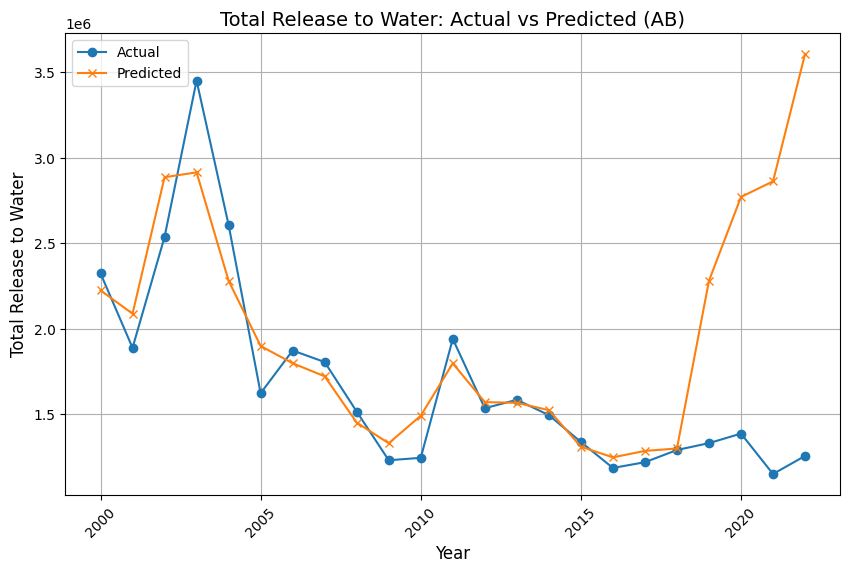

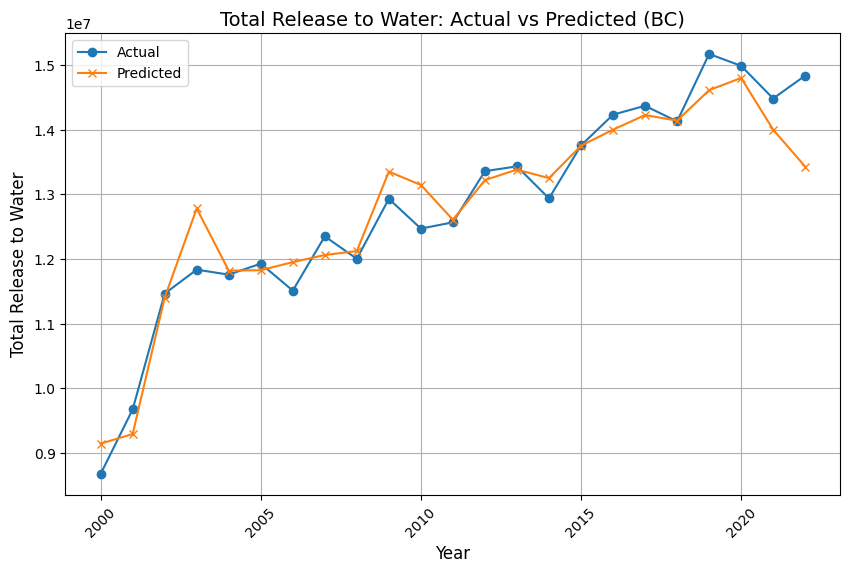

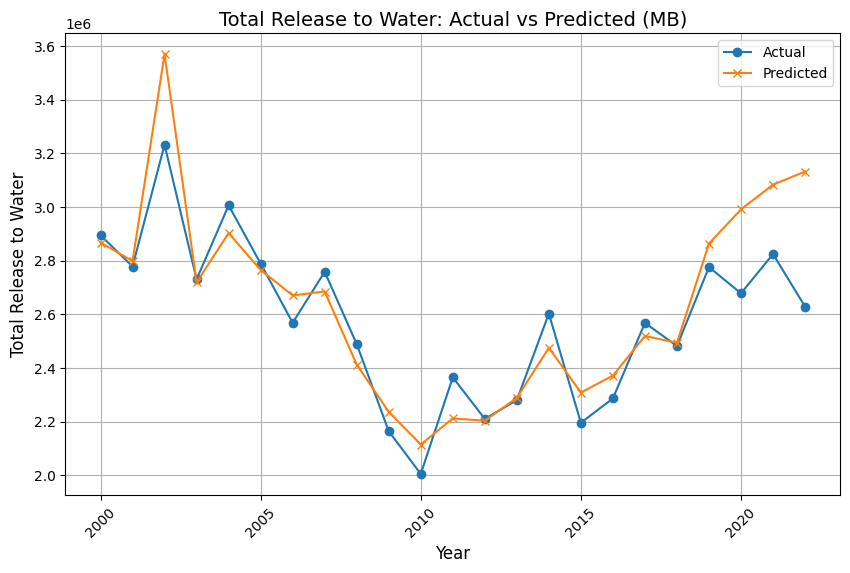

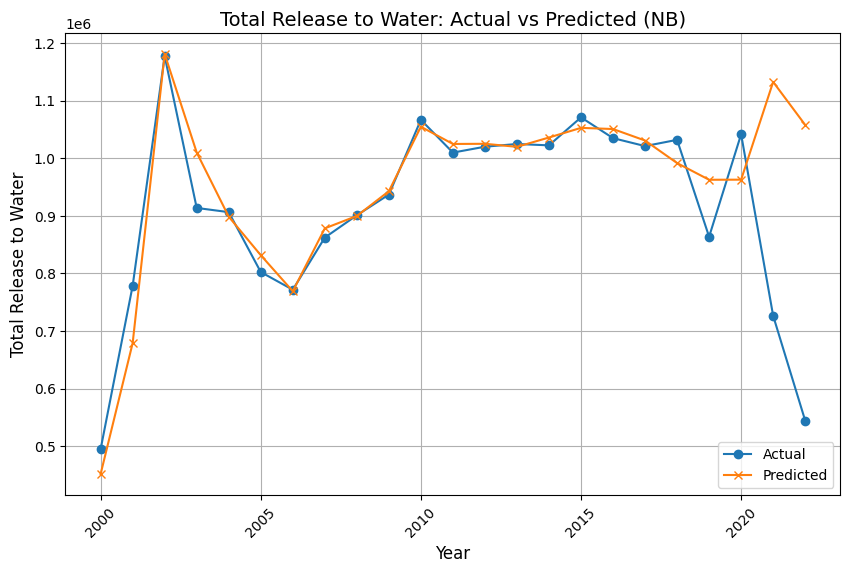

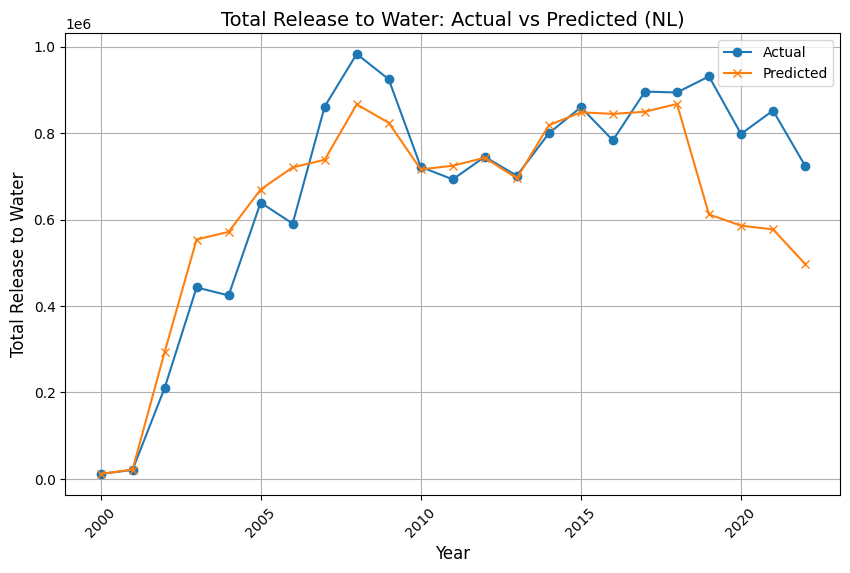

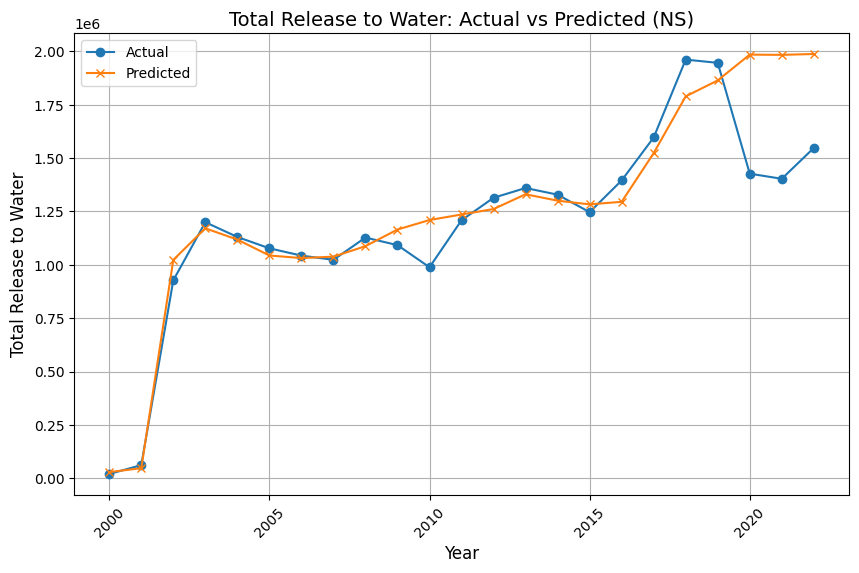

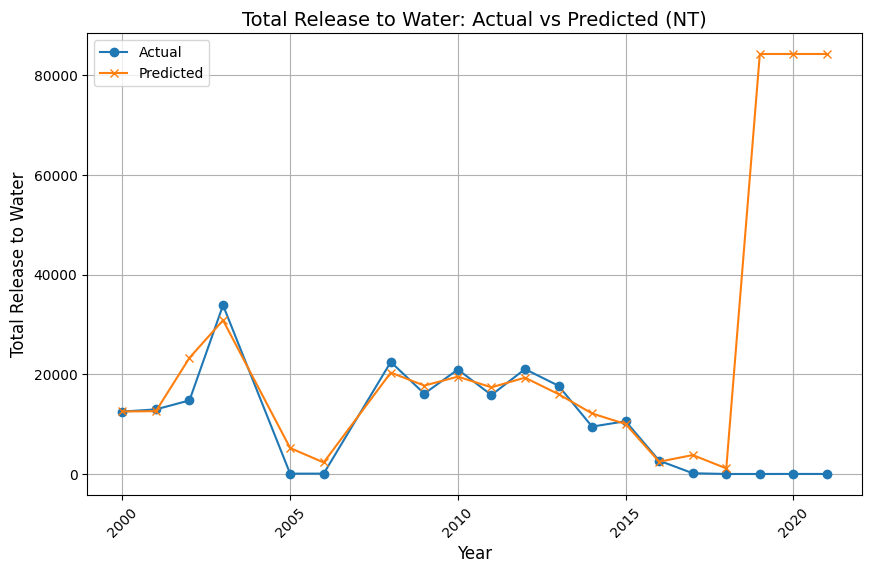

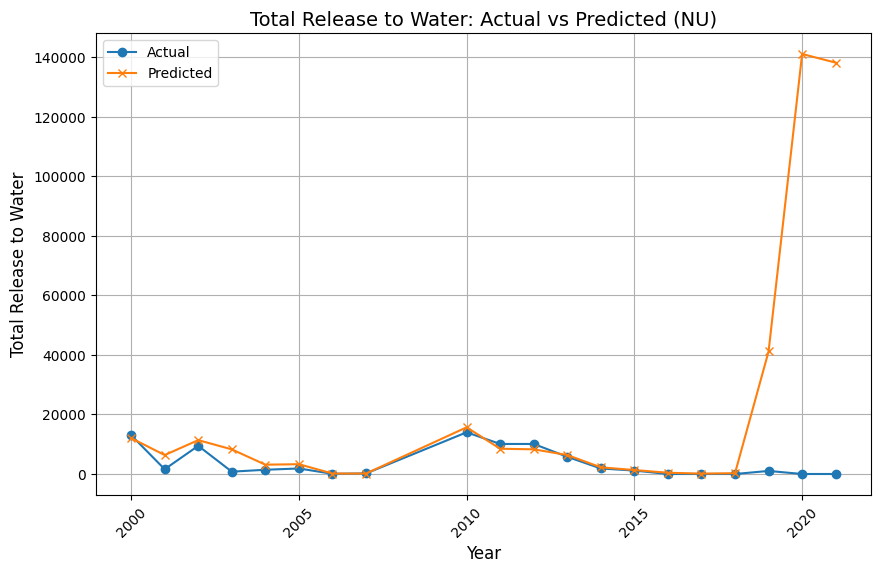

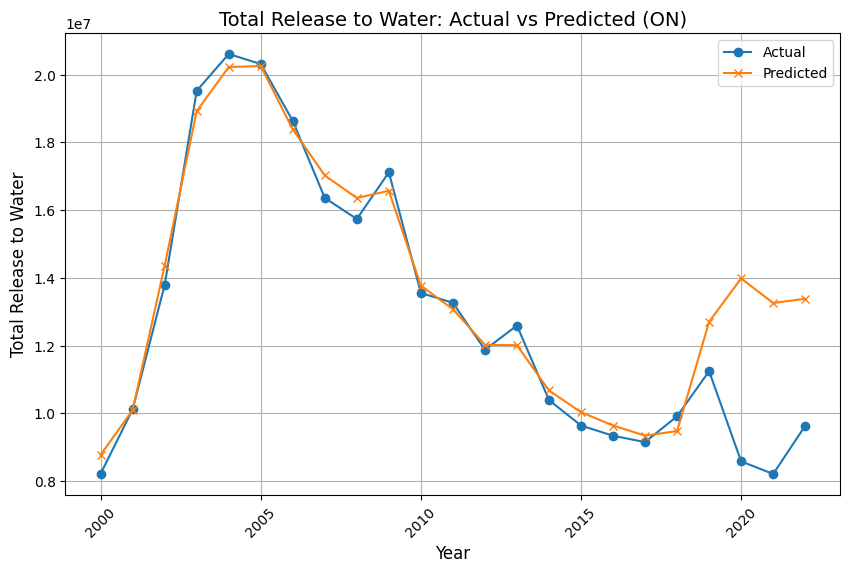

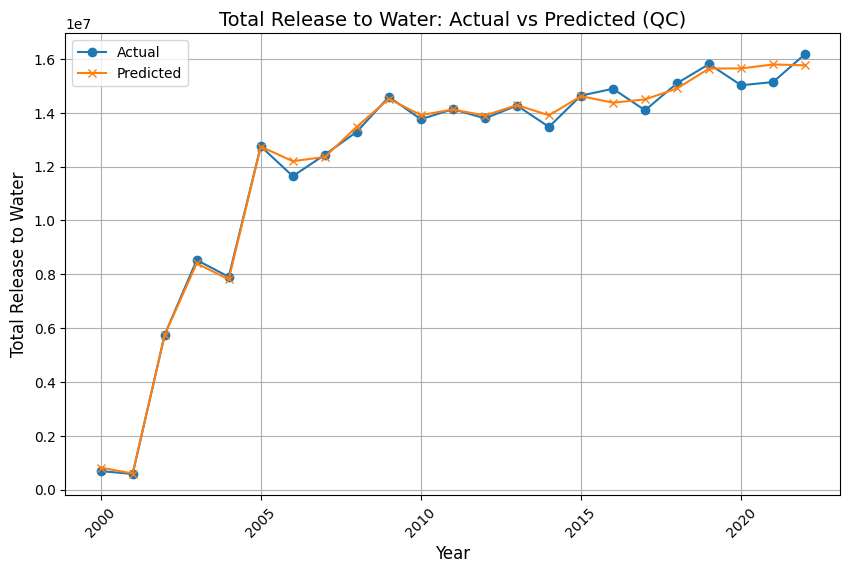

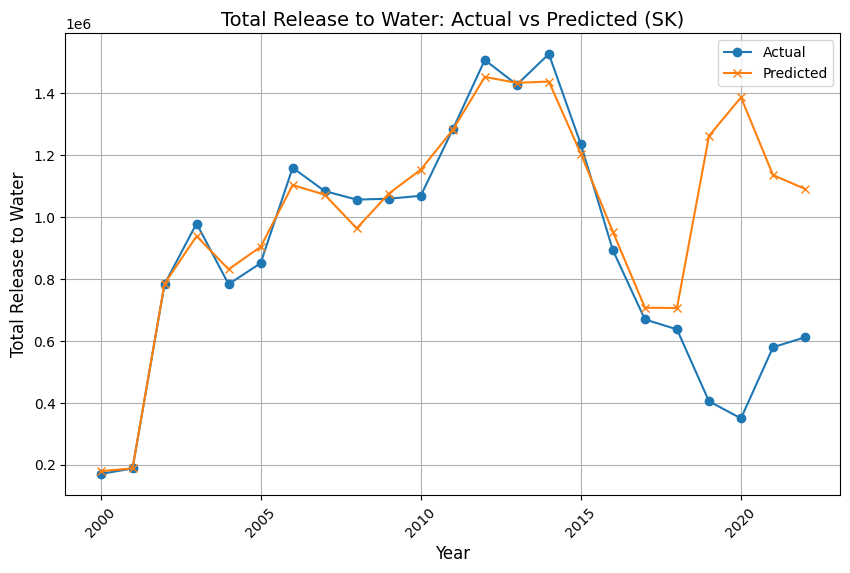

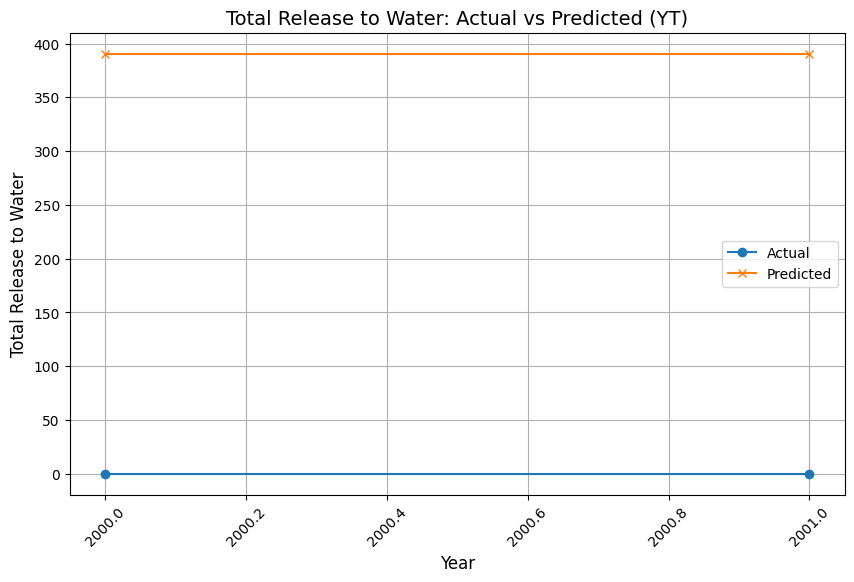

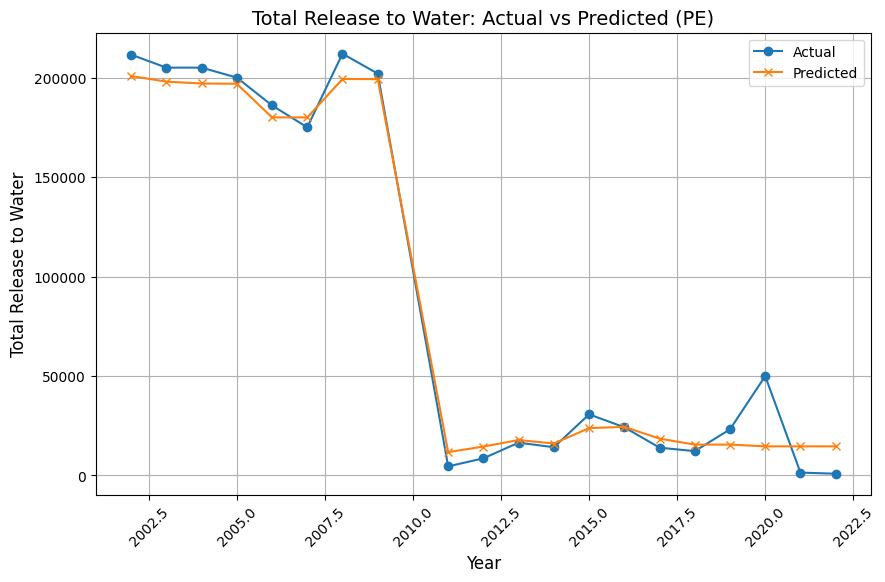

In [ ]:
# Step 2: Perform predictions directly using the model
# Ensure the features used for prediction match the trained model's expected features
X_features = combined_NPRI_ammonia[X_train_ammonia_1.columns]  # Use the same feature set as the model was trained on
combined_NPRI_ammonia['Forecast_Total_Release_to_Water'] = best_model_pipeline.predict(X_features)

# Step 3: Aggregate actual and forecasted values per province per year
aggregated_data = combined_NPRI_ammonia.groupby(
    ['Reporting_Year/Année', 'PROVINCE']
)[['Total_Release_to_Water', 'Forecast_Total_Release_to_Water']].sum().reset_index()

# Step 4: Plot actual vs. predicted values for each province
provinces = aggregated_data['PROVINCE'].unique()

for province in provinces:
    province_data = aggregated_data[aggregated_data['PROVINCE'] == province]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(
        province_data['Reporting_Year/Année'],
        province_data['Total_Release_to_Water'],
        label='Actual',
        marker='o',
    )
    plt.plot(
        province_data['Reporting_Year/Année'],
        province_data['Forecast_Total_Release_to_Water'],
        label='Predicted',
        marker='x',
    )

    # Add title and labels
    plt.title(f'Total Release to Water: Actual vs Predicted ({province})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Release to Water', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


In [ ]:
combined_NPRI_ammonia.head()

Reporting_Year/Année NPRI_ID/No_INRP Number_of_Employees  \
0                  2000               1               440.0   
1                  2000               4               500.0   
2                  2000               7                45.0   
3                  2000               9                20.0   
4                  2000              11                65.0   

  Company_Name/Dénomination_sociale_de_l'entreprise  \
0            Alberta-Pacific Forest Industries Inc.   
1                          Pine Falls Paper Company   
2                        BORDEN CHIMIE CANADA, INC.   
3                      BORDEN CHEMICAL CANADA, INC.   
4                      BORDEN CHEMICAL CANADA, INC.   

    Facility_Name/Installation NAICS/Code_SCIAN  \
0                      (blank)           322112   
1                   Pine Falls           322122   
2        BORDEN CHIMIE - LAVAL           325210   
3  BORDEN CHEMICAL - NORTH BAY           325210   
4   BORDEN CHEMICAL - EDMONTON           325210   

               NAICS Title/Titre_Code_SCIAN PROVINCE                 City  \
0                       Chemical pulp mills       AB  County of Athabasca   
1                           Newsprint mills       MB           PINE FALLS   
2  Resin and synthetic rubber manufacturing       QC                LAVAL   
3  Resin and synthetic rubber manufacturing       ON            NORTH BAY   
4  Resin and synthetic rubber manufacturing       AB             Edmonton   

    Latitude   Longitude CAS_Number/No_CAS  \
0  54.923116 -112.861867           NA - 16   
1  50.568600  -96.226700           NA - 16   
2  45.579700  -73.721700           NA - 16   
3  46.309800  -79.441200           NA - 16   
4  53.582300 -113.588600           NA - 16   

  Estimation_Method/Méthode_d’estimation  Release_to_Air(Fugitive)  \
0   M - Monitoring or Direct Measurement                       0.0   
1   M - Monitoring or Direct Measurement                       0.0   
2                    E - Emission Factor                       0.0   
3                    E - Emission Factor                       0.0   
4              O - Engineering Estimates                       0.0   

   Release_to_Air(Other_Non-Point)  Release_to_Air(Road dust)  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              0.0                        0.0   
4                              0.0                        0.0   

   Release_to_Air(Spills)  Release_to_Air(Stack/Point)  \
0                     0.0                        56.01   
1                     0.0                         0.00   
2                     0.0                         0.00   
3                     0.0                         0.00   
4                     0.0                         0.00   

   Release_to_Air(Storage/Handling)  Releases_to_Land(Leaks)  \
0                               0.0                      0.0   
1                               0.0                      0.0   
2                               0.0                      0.0   
3                               0.0                      0.0   
4                               0.0                      0.0   

   Releases_to_Land(Other)  Releases_to_Land(Spills)  \
0                      0.0                       0.0   
1                      0.0                       0.0   
2                      0.0                       0.0   
3                      0.0                       0.0   
4                      0.0                       0.0   

   Releases_ to_Water_Bodies(Direct Discharges)  \
0                                        2860.0   
1                                       19540.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Releases_ to_Water_Bodies(Leaks)  Releases_ to_Water_

In [ ]:
# Aggregate actual data by year and province
aggregated_data = combined_NPRI_ammonia.groupby(
    ['Reporting_Year/Année', 'PROVINCE']
)[['Total_Release_to_Water']].sum().reset_index()

# Create lag features for each province
num_lags = 5  # Number of preceding years to consider

# Initialize a DataFrame to hold lag features
lagged_data = []

for province in aggregated_data['PROVINCE'].unique():
    province_data = aggregated_data[aggregated_data['PROVINCE'] == province].copy()
    for lag in range(1, num_lags + 1):
        province_data[f'Lag_{lag}'] = province_data['Total_Release_to_Water'].shift(lag)
    lagged_data.append(province_data)

# Concatenate lagged data for all provinces
lagged_data = pd.concat(lagged_data)

# Drop rows with NaN values caused by lagging
lagged_data = lagged_data.dropna()


In [ ]:
# Split data into training and testing sets based on year
train_data = lagged_data[lagged_data['Reporting_Year/Année'] <= 2018]  # Train on data up to 2018
test_data = lagged_data[lagged_data['Reporting_Year/Année'] > 2018]   # Test on data after 2018

# Define features (lag values) and target (current year's release)
lag_features = [f'Lag_{i}' for i in range(1, num_lags + 1)]

# Separate features (X) and target (y) for training and testing
X_train = train_data[lag_features]
y_train = train_data['Total_Release_to_Water']
X_test = test_data[lag_features]
y_test = test_data['Total_Release_to_Water']

X_test = X_test.loc[:, lag_features]
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

# Evaluate the model

rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


RMSE: 813767.9358
R2: 0.9794


In [ ]:
# Initialize a list to store future predictions
future_predictions = []

# Predict for future years for each province
future_years = range(lagged_data['Reporting_Year/Année'].max() + 1, 2027)

for province in lagged_data['PROVINCE'].unique():
    # Get the last available data for the province
    province_data = lagged_data[lagged_data['PROVINCE'] == province].iloc[-1]

    # Initialize lag values
    last_lags = [province_data[f'Lag_{i}'] for i in range(1, num_lags + 1)]

    for year in future_years:
        # Predict the value for the current year
        next_prediction = model.predict([last_lags])[0]

        # Store the prediction
        future_predictions.append({
            'Reporting_Year/Année': year,
            'PROVINCE': province,
            'Total_Release_to_Water': next_prediction
        })

        # Update lag values for the next iteration
        last_lags = [next_prediction] + last_lags[:-1]

# Convert predictions into a DataFrame
future_predictions_df = pd.DataFrame(future_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with f

In [ ]:
# Combine historical and predicted data
all_data = pd.concat(
    [lagged_data[['Reporting_Year/Année', 'PROVINCE', 'Total_Release_to_Water']], future_predictions_df],
    ignore_index=True
)


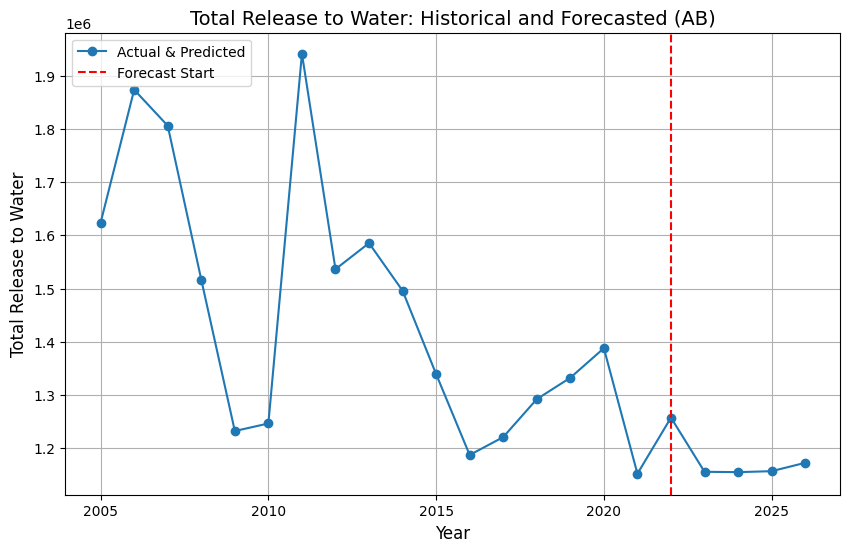

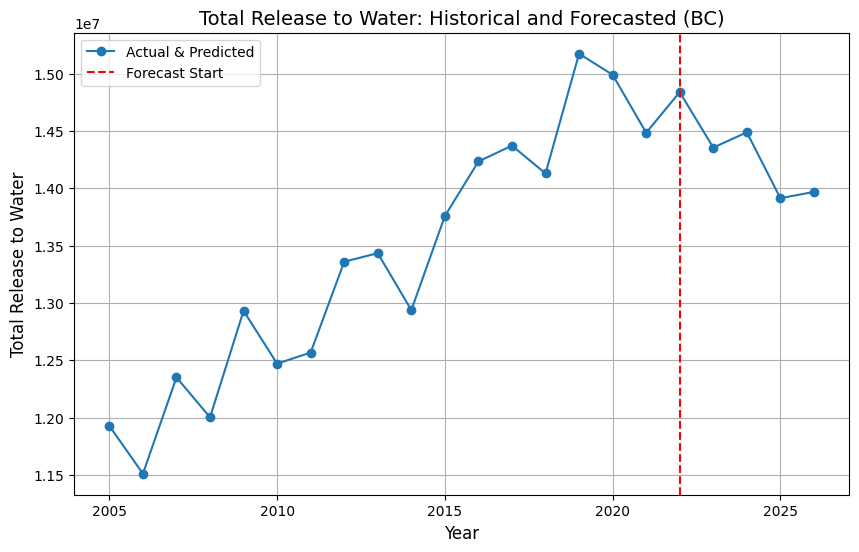

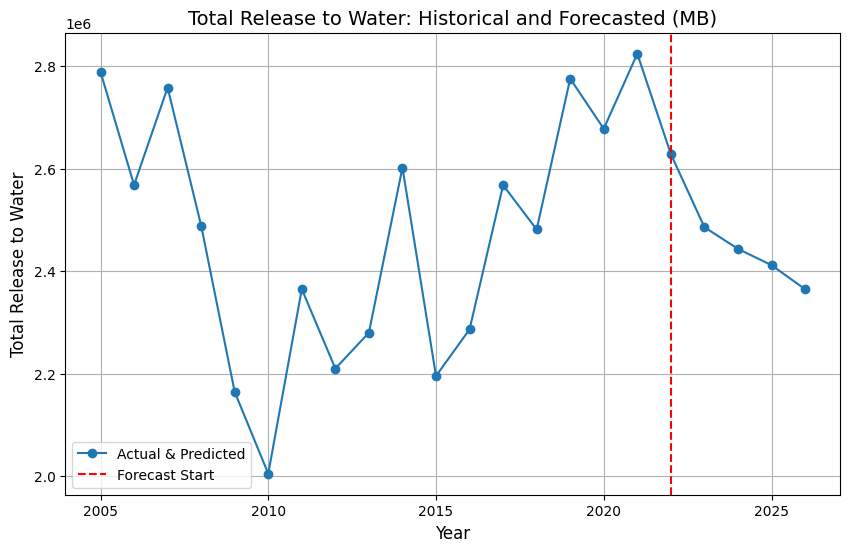

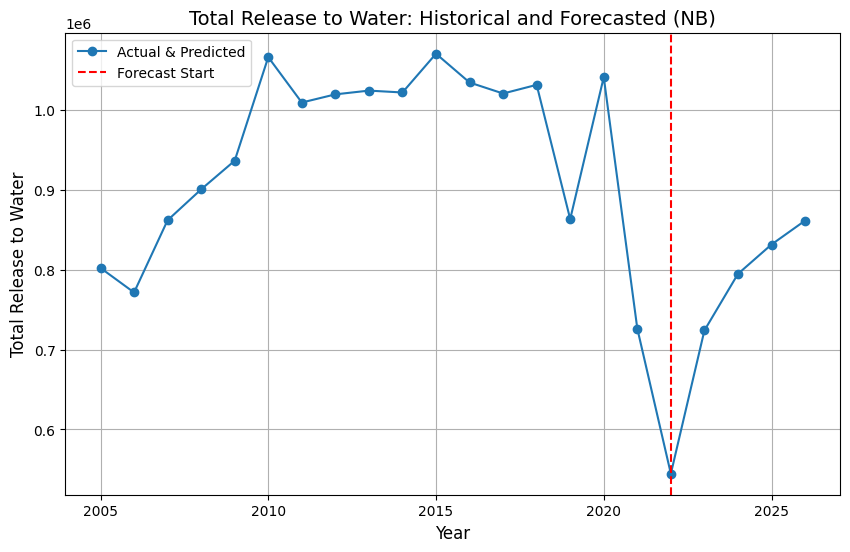

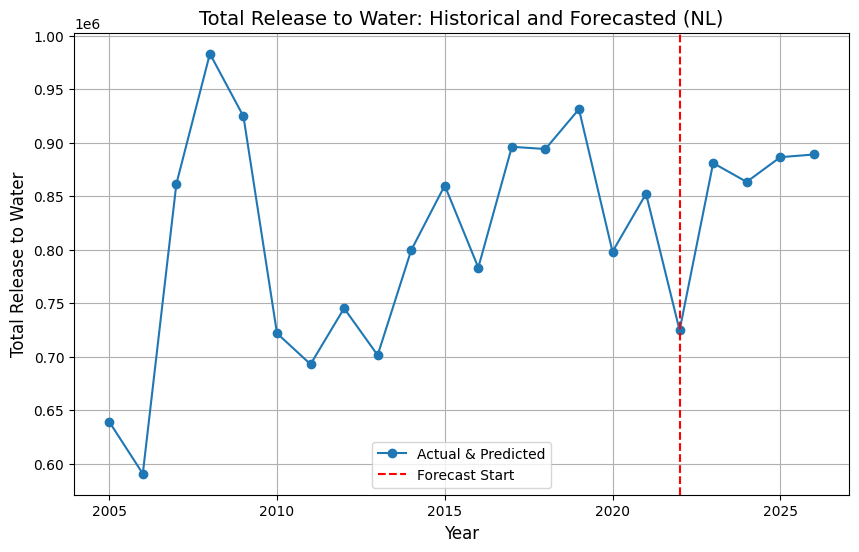

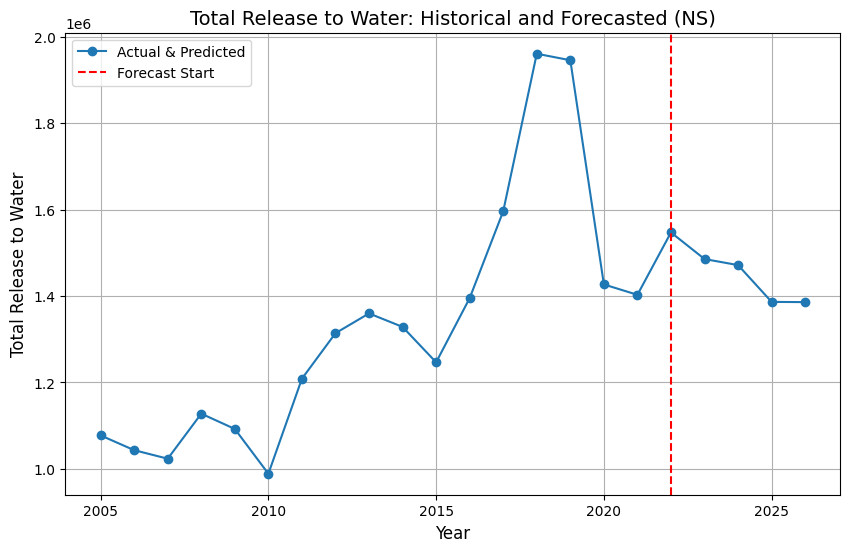

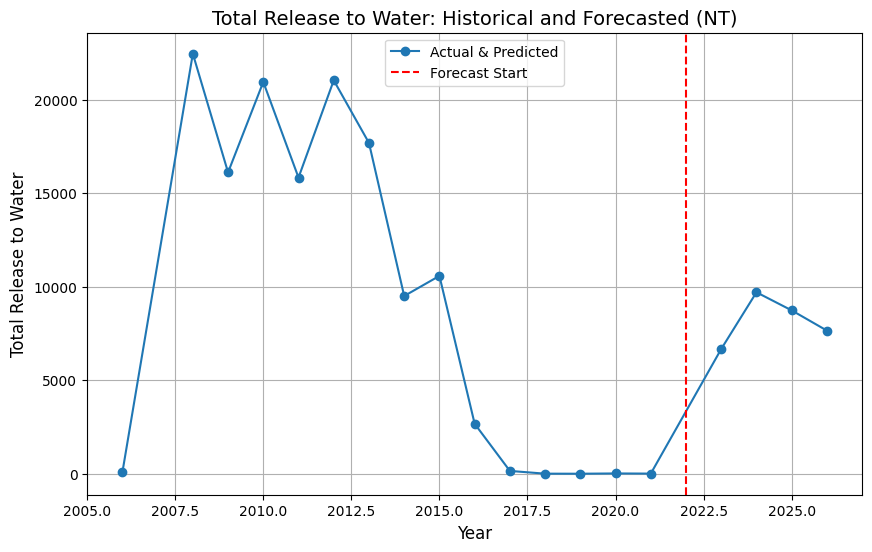

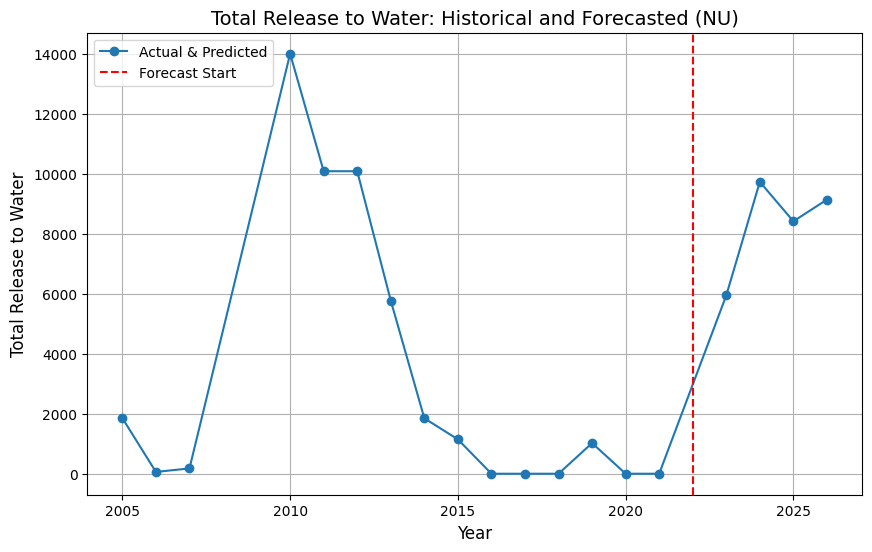

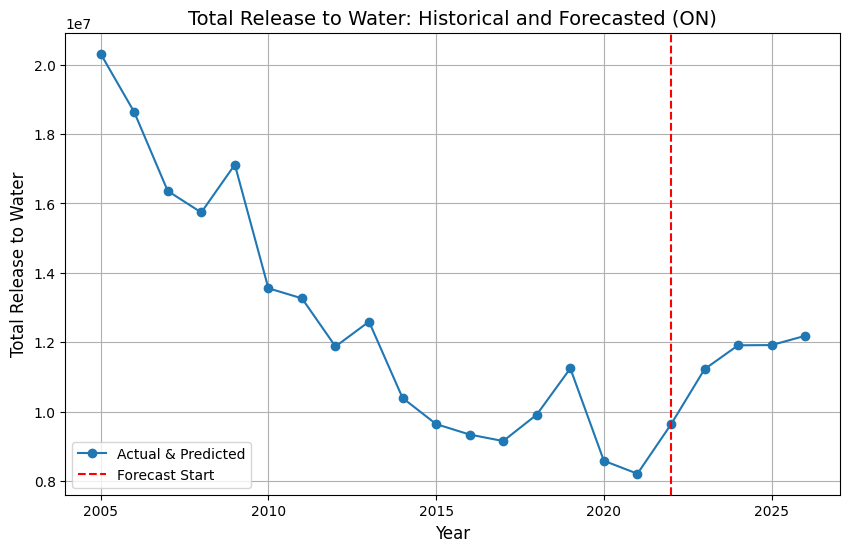

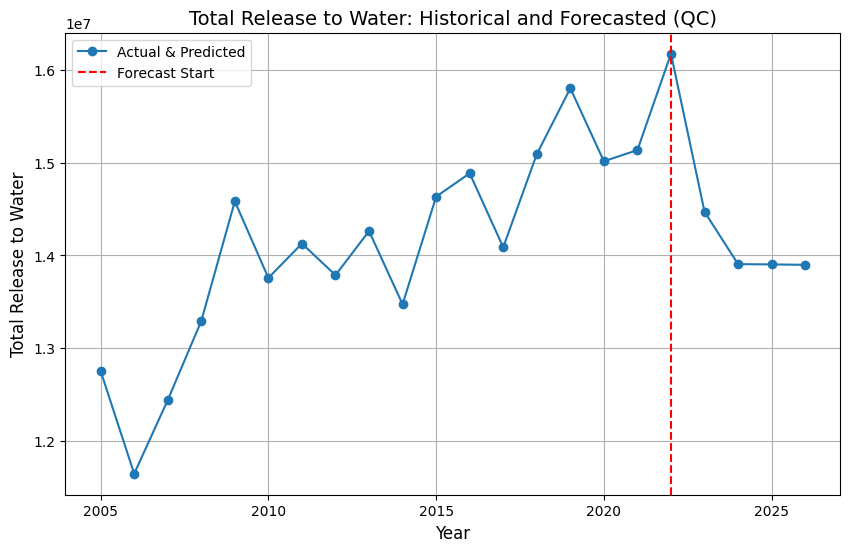

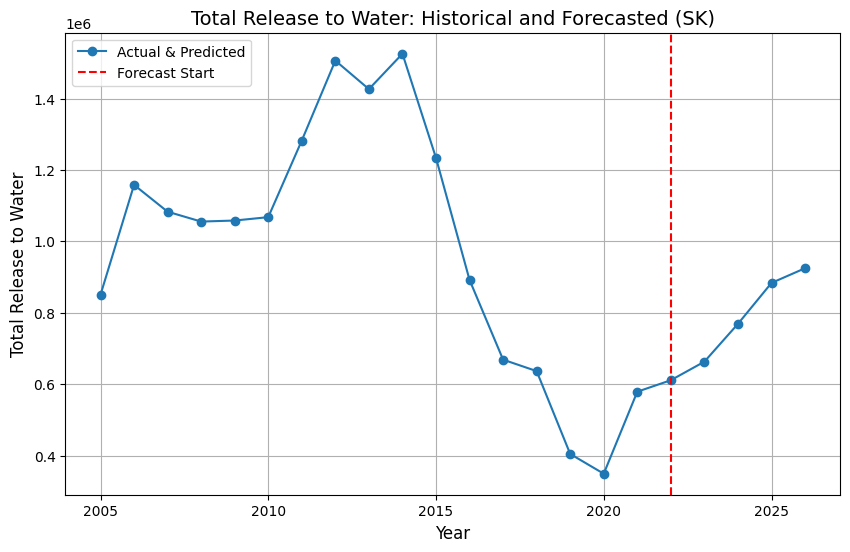

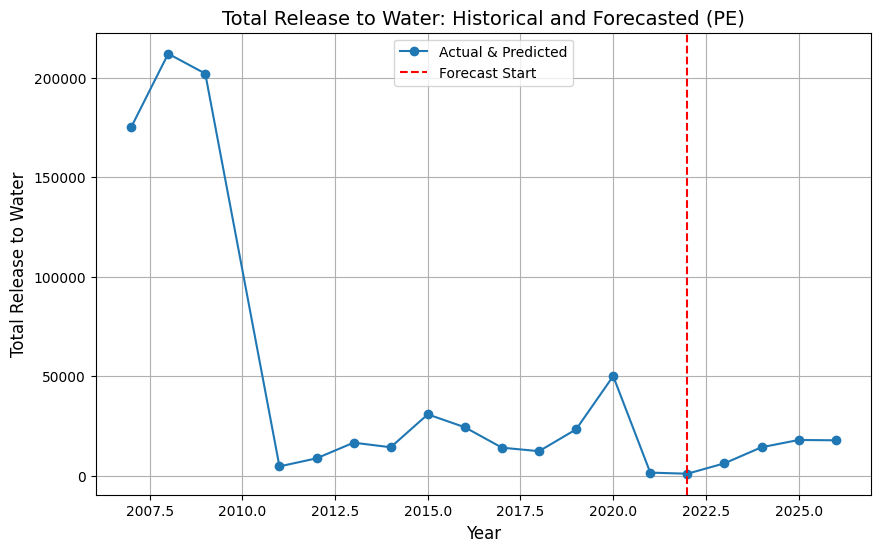

In [ ]:


# Plot data for each province
for province in all_data['PROVINCE'].unique():
    province_data = all_data[all_data['PROVINCE'] == province]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(
        province_data['Reporting_Year/Année'],
        province_data['Total_Release_to_Water'],
        marker='o',
        label='Actual & Predicted'
    )
    plt.axvline(x=lagged_data['Reporting_Year/Année'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.title(f'Total Release to Water: Historical and Forecasted ({province})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Release to Water', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
future_predictions_df

Reporting_Year/Année PROVINCE  Total_Release_to_Water
0                   2023       AB            1.135915e+06
1                   2024       AB            1.138907e+06
2                   2025       AB            1.162924e+06
3                   2026       AB            1.183867e+06
4                   2023       BC            1.448136e+07
5                   2024       BC            1.451042e+07
6                   2025       BC            1.400836e+07
7                   2026       BC            1.414469e+07
8                   2023       MB            2.462158e+06
9                   2024       MB            2.404822e+06
10                  2025       MB            2.346807e+06
11                  2026       MB            2.371007e+06
12                  2023       NB            7.280816e+05
13                  2024       NB            7.728192e+05
14                  2025       NB            8.204634e+05
15                  2026       NB            8.639274e+05
16                  2023       NL            8.816367e+05
17                  2024       NL            8.522363e+05
18                  2025       NL            8.711343e+05
19                  2026       NL            8.730468e+05
20                  2023       NS            1.477003e+06
21                  2024       NS            1.496324e+06
22                  2025       NS            1.408048e+06
23                  2026       NS            1.401429e+06
24                  2023       NT            7.376234e+03
25                  2024       NT            1.080512e+04
26                  2025       NT            8.749768e+03
27                  2026       NT            7.750732e+03
28                  2023       NU            6.327926e+03
29                  2024       NU            9.585478e+03
30                  2025       NU            8.948332e+03
31                  2026       NU            8.622144e+03
32                  2023       ON            1.089577e+07
33                  2024       ON            1.085000e+07
34                  2025       ON            1.093958e+07
35                  2026       ON            1.087062e+07
36                  2023       QC            1.452116e+07
37                  2024       QC            1.395638e+07
38                  2025       QC            1.414262e+07
39                  2026       QC            1.400560e+07
40                  2023       SK            6.711663e+05
41                  2024       SK            7.854078e+05
42                  2025       SK            8.937959e+05
43                  2026       SK            9.093410e+05
44                  2023       PE            6.551452e+03
45                  2024       PE            1.257930e+04
46                  2025       PE            1.100981e+04
47                  2026       PE            8.174555e+03

Comparing the future predictions using the actual total release against the predicted total release

In [ ]:
# Aggregate forecasted data by year and province
aggregated_data = combined_NPRI_ammonia.groupby(
    ['Reporting_Year/Année', 'PROVINCE']
)[['Forecast_Total_Release_to_Water']].sum().reset_index()

# Create lag features for each province
num_lags = 5  # Number of preceding years to consider

# Initialize a DataFrame to hold lag features
lagged_data = []

for province in aggregated_data['PROVINCE'].unique():
    province_data = aggregated_data[aggregated_data['PROVINCE'] == province].copy()
    for lag in range(1, num_lags + 1):
        province_data[f'Lag_{lag}'] = province_data['Forecast_Total_Release_to_Water'].shift(lag)
    lagged_data.append(province_data)

# Concatenate lagged data for all provinces
lagged_data = pd.concat(lagged_data)

# Drop rows with NaN values caused by lagging
lagged_data = lagged_data.dropna()


In [ ]:
# Split data into training and testing sets based on year
train_data = lagged_data[lagged_data['Reporting_Year/Année'] <= 2018]  # Train on data up to 2018
test_data = lagged_data[lagged_data['Reporting_Year/Année'] > 2018]   # Test on data after 2018

# Define features (lag values) and target (current year's release)
lag_features = [f'Lag_{i}' for i in range(1, num_lags + 1)]

# Separate features (X) and target (y) for training and testing
X_train = train_data[lag_features]
y_train = train_data['Forecast_Total_Release_to_Water']
X_test = test_data[lag_features]
y_test = test_data['Forecast_Total_Release_to_Water']

X_test = X_test.loc[:, lag_features]
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Test the model
predictions = model.predict(X_test)

# Evaluate the model

rmse = root_mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


RMSE: 625081.8679
R2: 0.9887


In [ ]:
# Initialize a list to store future predictions
future_predictions2 = []

# Predict for future years for each province
future_years = range(lagged_data['Reporting_Year/Année'].max() + 1, 2027)

for province in lagged_data['PROVINCE'].unique():
    # Get the last available data for the province
    province_data = lagged_data[lagged_data['PROVINCE'] == province].iloc[-1]

    # Initialize lag values
    last_lags = [province_data[f'Lag_{i}'] for i in range(1, num_lags + 1)]

    for year in future_years:
        # Predict the value for the current year
        next_prediction = model.predict([last_lags])[0]

        # Store the prediction
        future_predictions2.append({
            'Reporting_Year/Année': year,
            'PROVINCE': province,
            'Forecast_Total_Release_to_Water': next_prediction
        })

        # Update lag values for the next iteration
        last_lags = [next_prediction] + last_lags[:-1]

# Convert predictions into a DataFrame
future_predictions2_df = pd.DataFrame(future_predictions2)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with f

In [ ]:
# Combine historical and predicted data
all_data2 = pd.concat(
    [lagged_data[['Reporting_Year/Année', 'PROVINCE', 'Forecast_Total_Release_to_Water']], future_predictions2_df],
    ignore_index=True
)


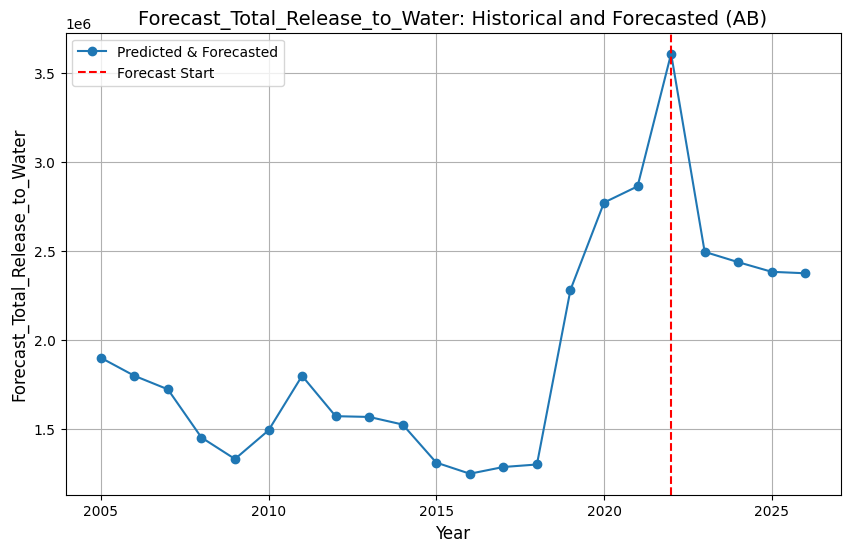

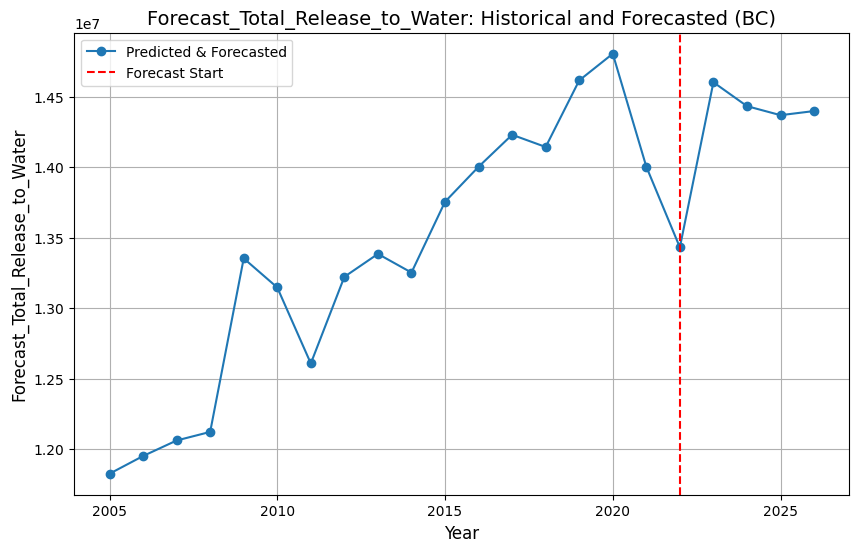

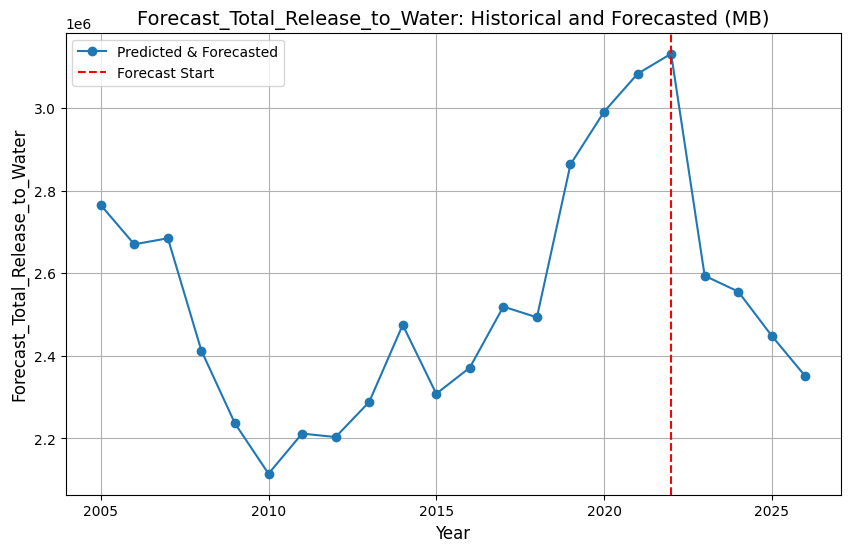

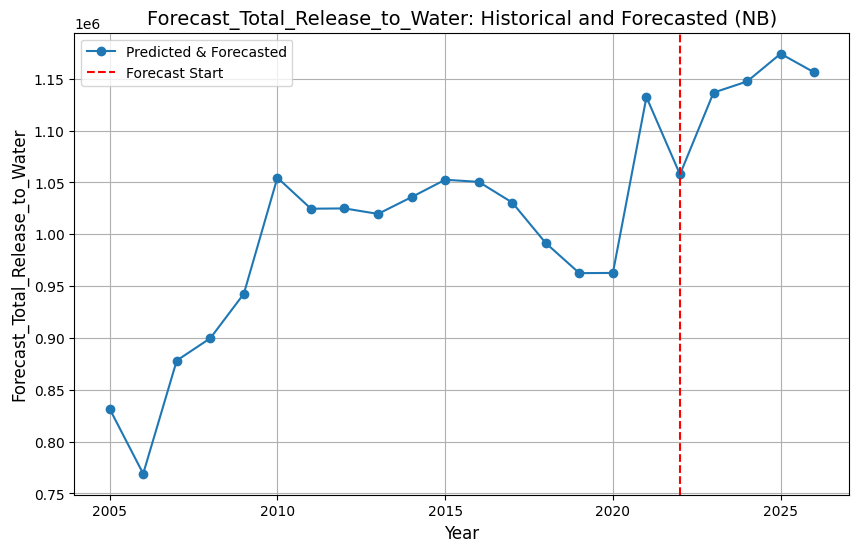

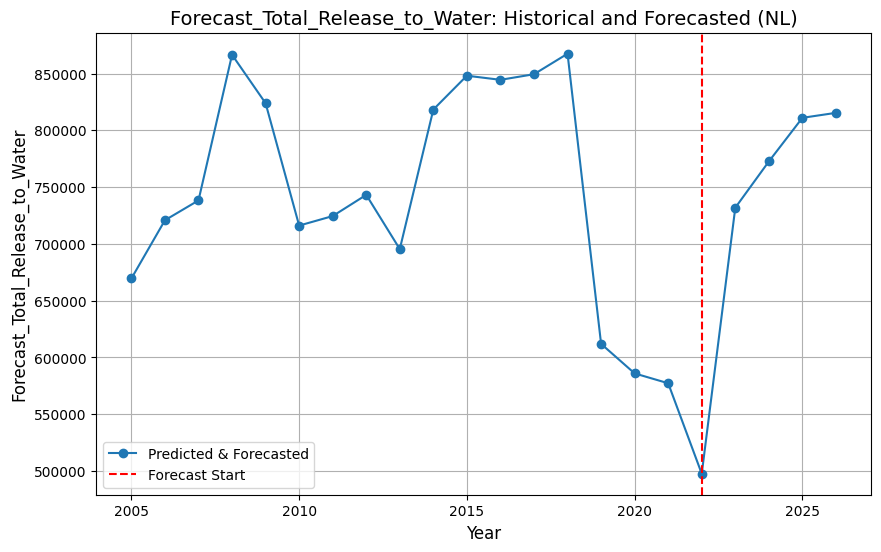

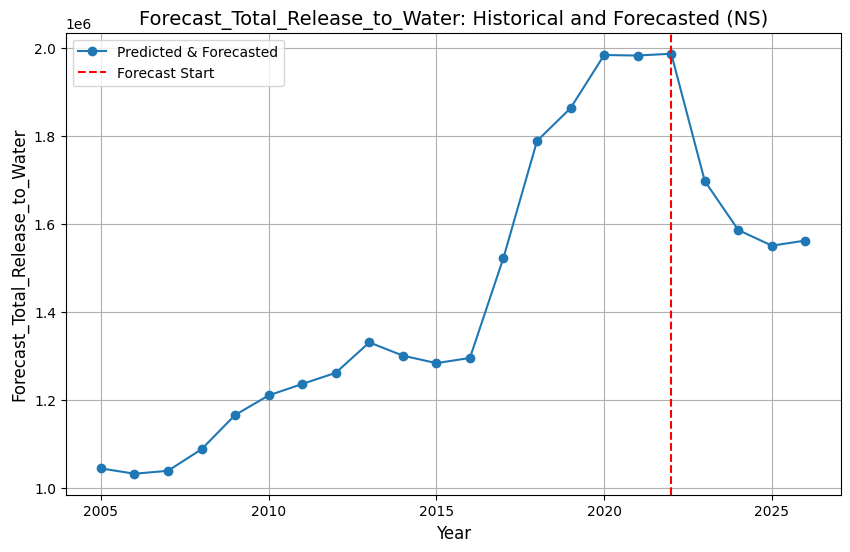

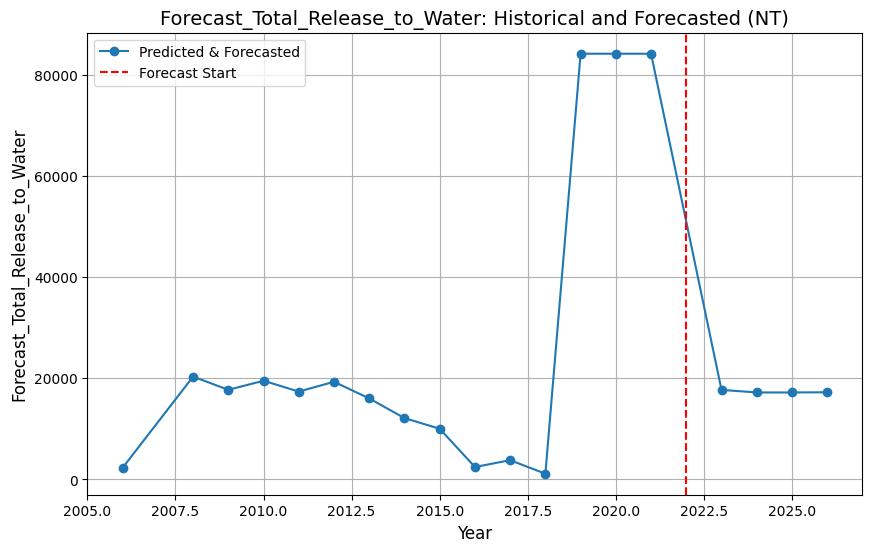

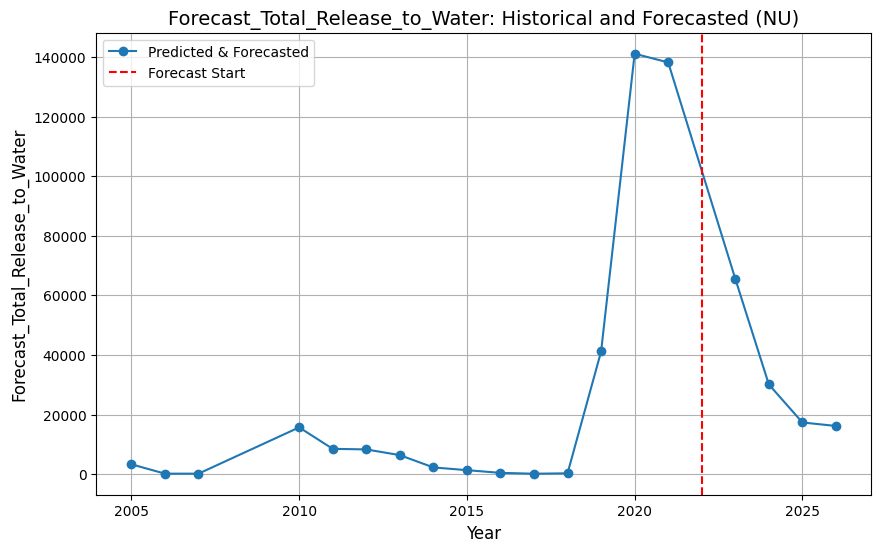

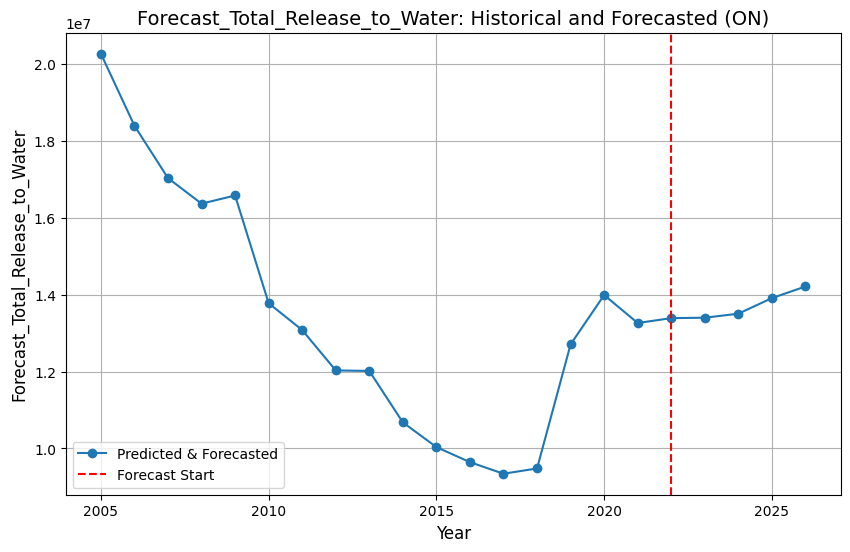

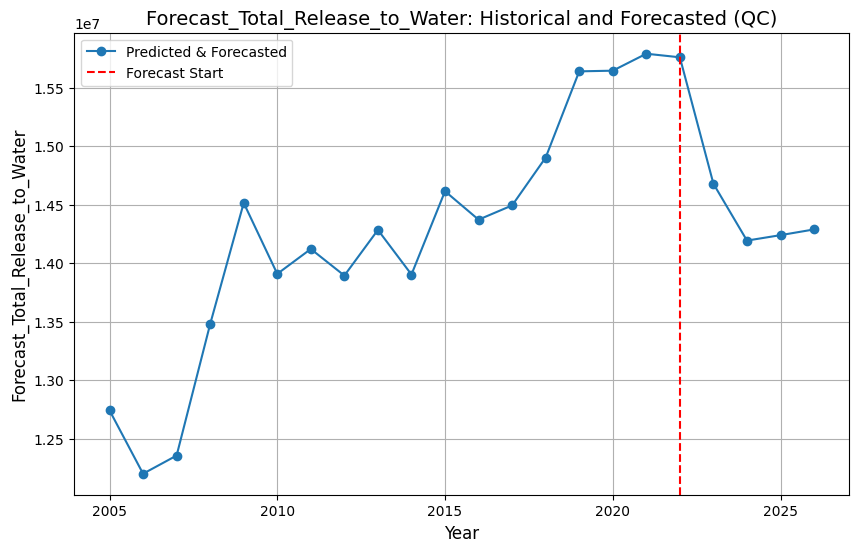

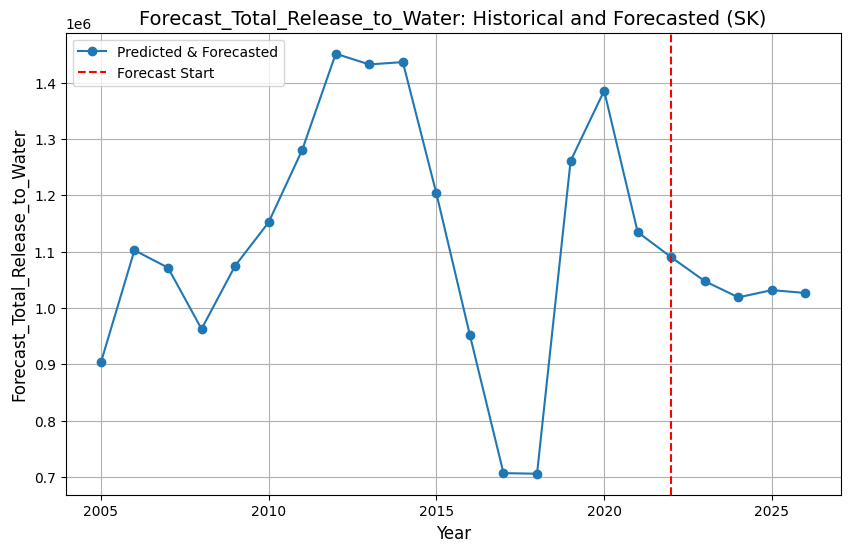

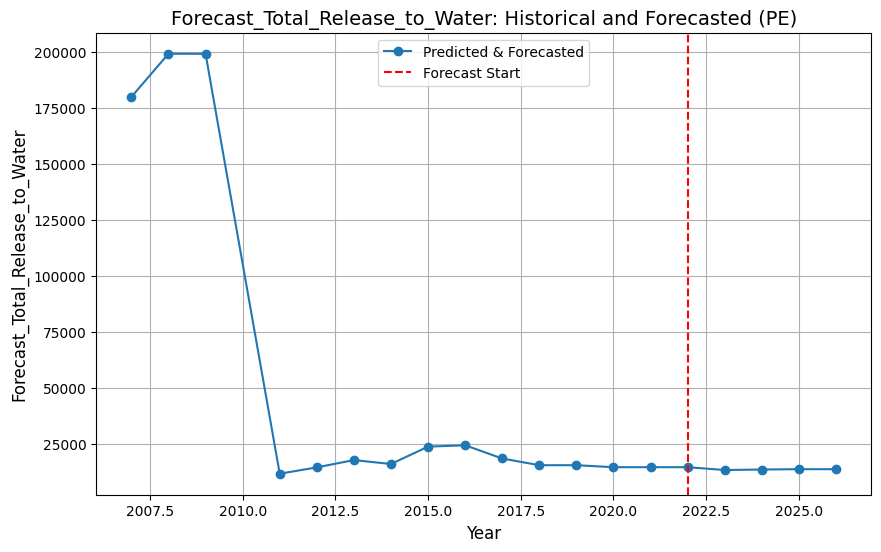

In [ ]:


# Plot data for each province
for province in all_data2['PROVINCE'].unique():
    province_data = all_data2[all_data2['PROVINCE'] == province]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(
        province_data['Reporting_Year/Année'],
        province_data['Forecast_Total_Release_to_Water'],
        marker='o',
        label='Predicted & Forecasted'
    )
    plt.axvline(x=lagged_data['Reporting_Year/Année'].max(), color='red', linestyle='--', label='Forecast Start')
    plt.title(f'Forecast_Total_Release_to_Water: Historical and Forecasted ({province})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Forecast_Total_Release_to_Water', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()


Plotting the actual against the predicted

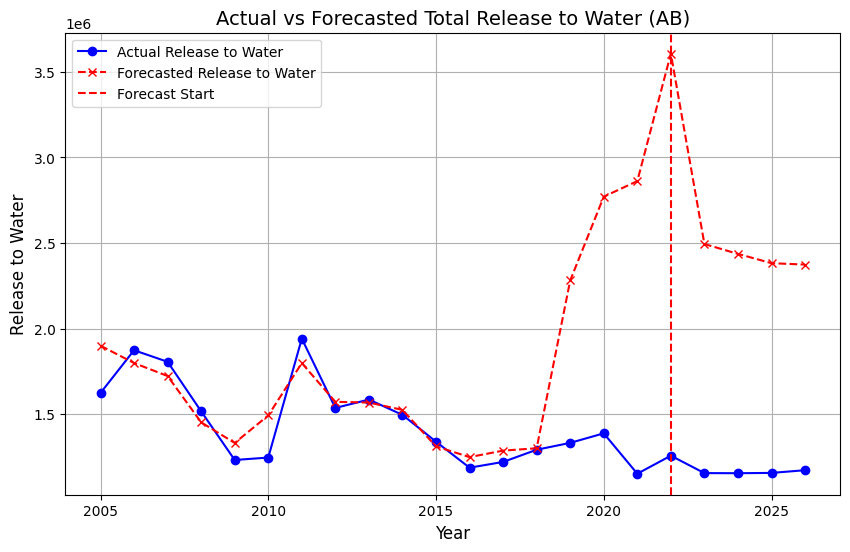

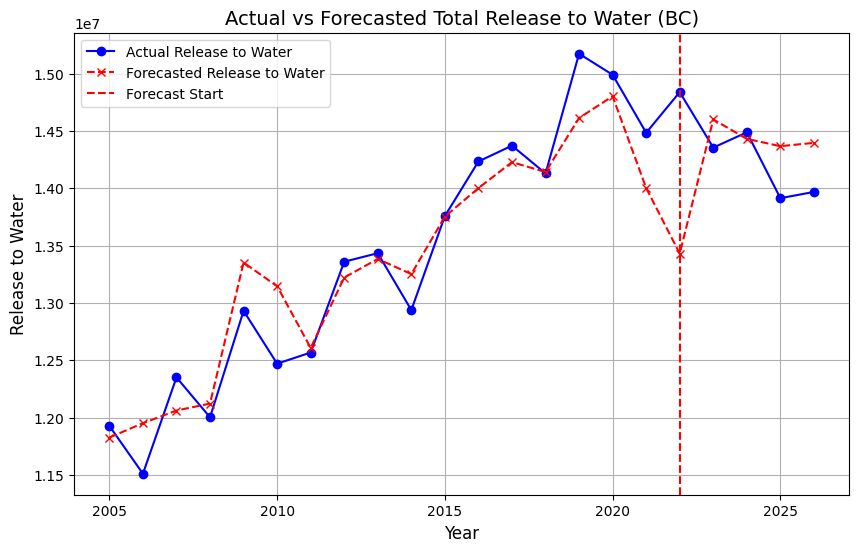

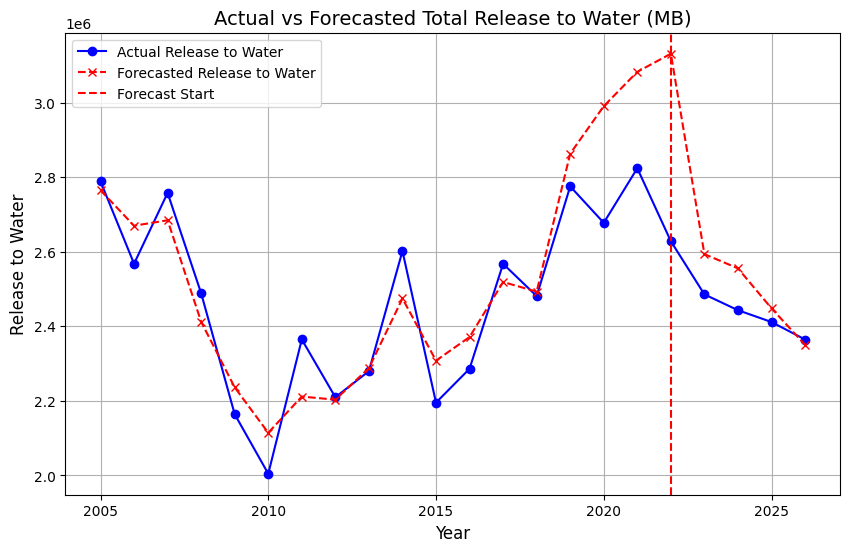

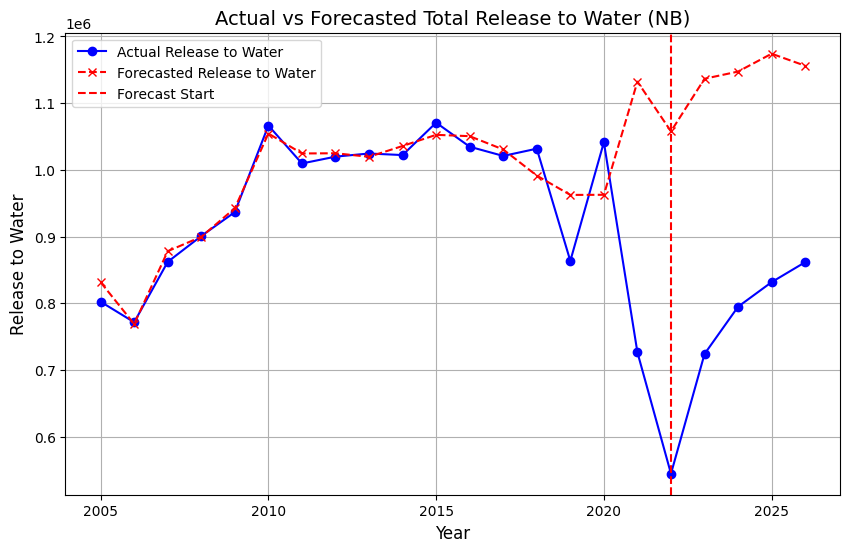

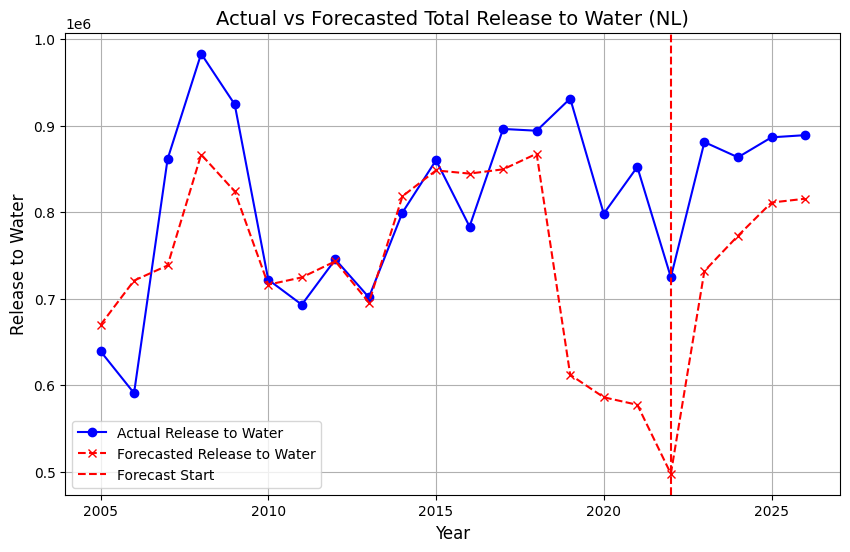

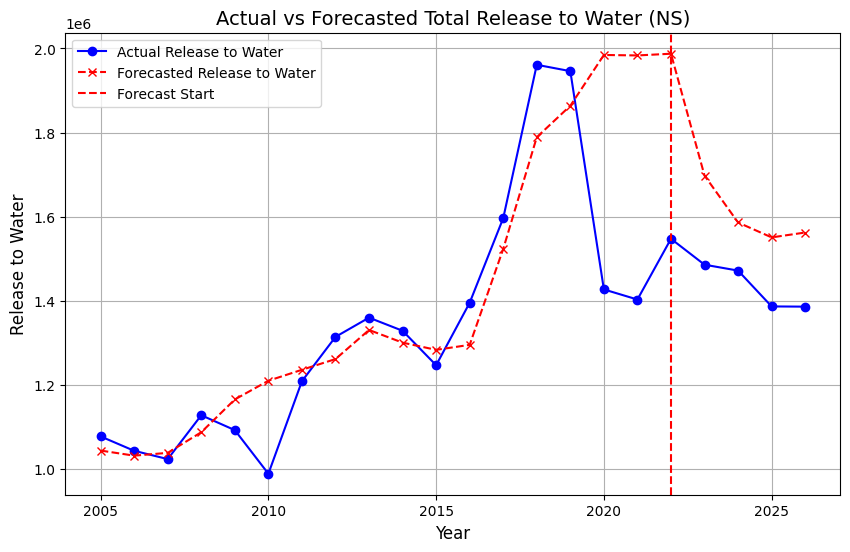

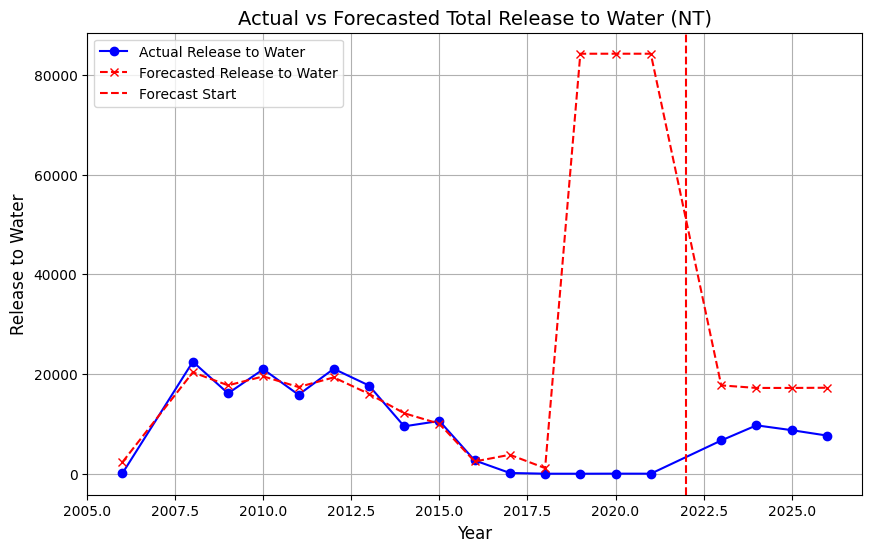

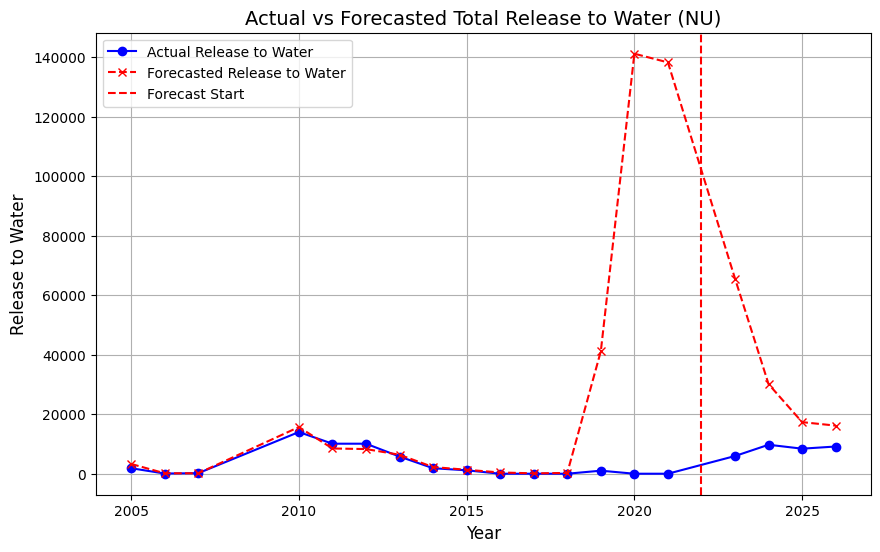

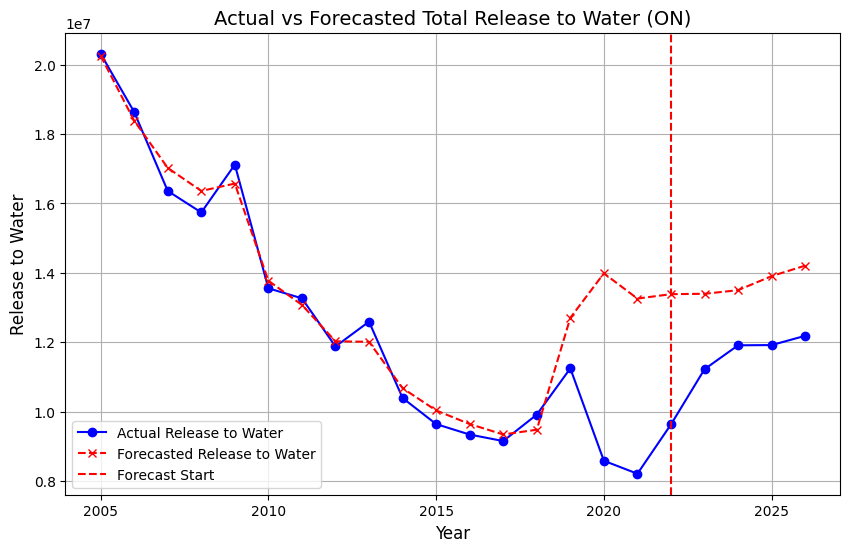

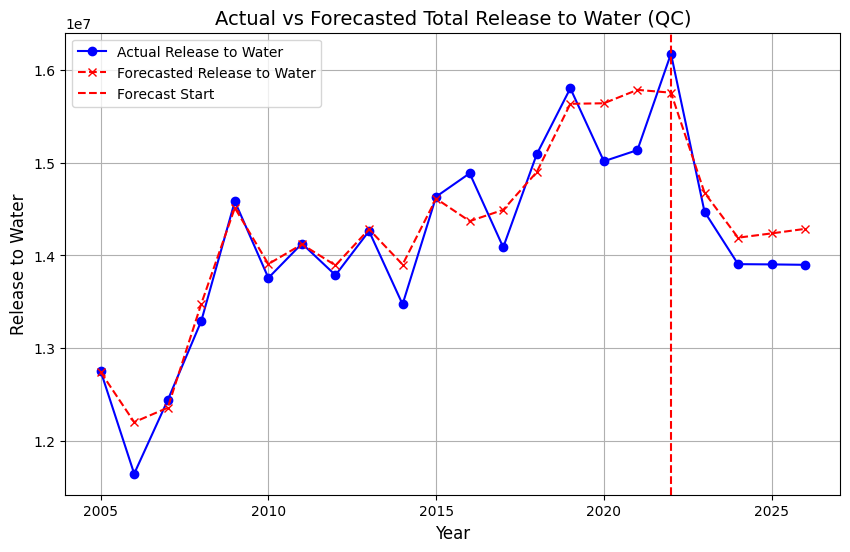

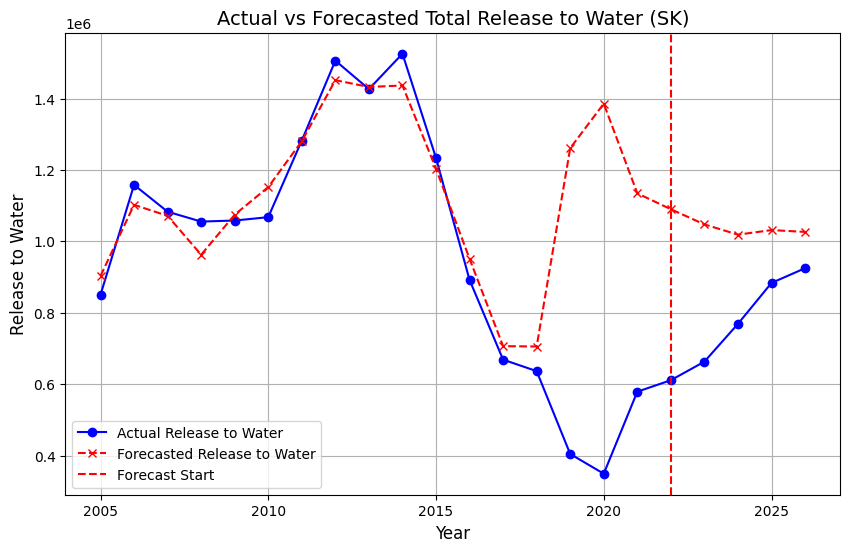

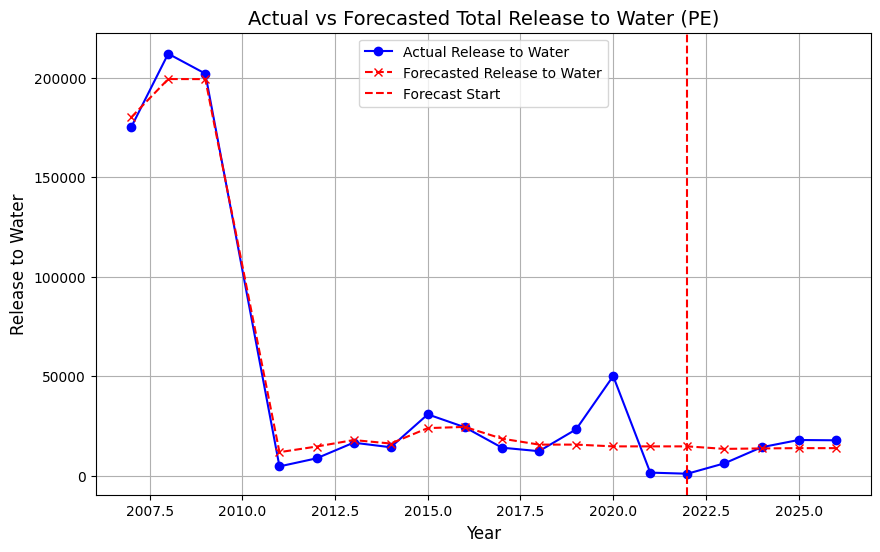

In [ ]:
# Plot data for each province
for province in all_data['PROVINCE'].unique():
    province_data = all_data[all_data['PROVINCE'] == province]
    province_data2 = all_data2[all_data2['PROVINCE'] == province]

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot actual data
    plt.plot(
        province_data['Reporting_Year/Année'],
        province_data['Total_Release_to_Water'],
        label='Actual Release to Water',
        marker='o', linestyle='-', color='blue'
    )

    # Plot forecasted data
    plt.plot(
        province_data2['Reporting_Year/Année'],
        province_data2['Forecast_Total_Release_to_Water'],
        label='Forecasted Release to Water',
        marker='x', linestyle='--', color='red'
    )

    # Add a vertical line to mark the forecast start point
    plt.axvline(x=lagged_data['Reporting_Year/Année'].max(), color='red', linestyle='--', label='Forecast Start')

    # Title and labels
    plt.title(f'Actual vs Forecasted Total Release to Water ({province})', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Release to Water', fontsize=12)

    # Display the legend and grid
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


## Nitrate ions Dataframe

In [ ]:
df_NPRI_nitrate.shape

(4357, 28)

In [ ]:
df_NPRI_nitrate = split_data(df = df_NPRI_nitrate, year_column = 'Reporting_Year/Année', split_year = 2018)

# Unpack the tuple into train_data and test_data
train_data, test_data = df_NPRI_nitrate

train_nitrate_ion = train_data
test_nitrate_ion = test_data

train_nitrate_ion.shape, test_nitrate_ion.shape

((3499, 28), (858, 28))

In [ ]:
train_nitrate_ion.head()

Reporting_Year/Année NPRI_ID/No_INRP Number_of_Employees  \
0                 2000               1                 440   
1                 2000             108                 150   
2                 2000             319                 120   
3                 2000             351                1100   
4                 2000             394                  10   

  Company_Name/Dénomination_sociale_de_l'entreprise  \
0            Alberta-Pacific Forest Industries Inc.   
1                          BARRICK GOLD CORPORATION   
2                                   ETI CANADA INC.   
3                               GENCORP CANADA INC.   
4                              HOMESTAKE CANADA INC   

  Facility_Name/Installation NAICS/Code_SCIAN  \
0                    (blank)           322112   
1             HOLT MCDERMOTT           212220   
2             North Bay Site           325920   
3             GDX AUTOMOTIVE           326290   
4          Nickel Plate Mine           212220   

         NAICS Title/Titre_Code_SCIAN PROVINCE                 City  \
0                 Chemical pulp mills       AB  County of Athabasca   
1          Gold and silver ore mining       ON             MATHESON   
2            Explosives manufacturing       ON            North Bay   
3  Other rubber product manufacturing       ON              Welland   
4          Gold and silver ore mining       BC            Penticton   

    Latitude   Longitude CAS_Number/No_CAS  \
0  54.923116 -112.861867           NA - 17   
1  48.521200  -81.121800           NA - 17   
2  46.266700  -79.377800           NA - 17   
3  42.997700  -79.238900           NA - 17   
4  49.371100 -120.023100           NA - 17   

  Substance_Name_(English)/Nom_de_substance_(Anglais) Units/Unités  \
0               Nitrate ion in solution at pH >= 6.0            kg   
1               Nitrate ion in solution at pH >= 6.0            kg   
2               Nitrate ion in solution at pH >= 6.0            kg   
3               Nitrate ion in solution at pH >= 6.0            kg   
4               Nitrate ion in solution at pH >= 6.0            kg   

  Estimation_Method/Méthode_d’estimation  Release_to_Air(Fugitive)  \
0   M - Monitoring or Direct Measurement                       NaN   
1   M - Monitoring or Direct Measurement                       NaN   
2   M - Monitoring or Direct Measurement                       NaN   
3                       C - Mass Balance                       NaN   
4   M - Monitoring or Direct Measurement                       NaN   

   Release_to_Air(Other_Non-Point)  Release_to_Air(Road dust)  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              NaN                        NaN   
3                              NaN                        NaN   
4                              NaN                        NaN   

   Release_to_Air(Spills)  Release_to_Air(Stack/Point)  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   
3                     NaN                          NaN   
4                     NaN                          NaN   

   Release_to_Air(Storage/Handling)  Releases_to_Land(Leaks)  \
0                               NaN                      NaN   
1                               NaN                      NaN   
2                               NaN                      NaN   
3                               NaN                      NaN   
4                               NaN                      NaN   

   Releases_to_Land(Other)  Releases_to_Land(Spills)  \
0                      NaN                       NaN   
1                      NaN                       NaN   
2                      NaN                       NaN   
3                      NaN                       NaN   
4                      NaN                       NaN

Cleaning the train and test sets separately to avoid data leakage

In [ ]:
train_nitrate_ion.isnull().sum()

Reporting_Year/Année                                      0
NPRI_ID/No_INRP                                           0
Number_of_Employees                                       0
Company_Name/Dénomination_sociale_de_l'entreprise         0
Facility_Name/Installation                                1
NAICS/Code_SCIAN                                          0
NAICS Title/Titre_Code_SCIAN                              0
PROVINCE                                                  0
City                                                     22
Latitude                                                 19
Longitude                                                19
CAS_Number/No_CAS                                         0
Substance_Name_(English)/Nom_de_substance_(Anglais)       0
Units/Unités                                              0
Estimation_Method/Méthode_d’estimation                    0
Release_to_Air(Fugitive)                               3478
Release_to_Air(Other_Non-Point)                        3496
Release_to_Air(Road dust)                              3499
Release_to_Air(Spills)                                 3495
Release_to_Air(Stack/Point)                            3370
Release_to_Air(Storage/Handling)                       3484
Releases_to_Land(Leaks)                                3496
Releases_to_Land(Other)                                3416
Releases_to_Land(Spills)                               3462
Releases_ to_Water_Bodies(Direct Discharges)            400
Releases_ to_Water_Bodies(Leaks)                       3497
Releases_ to_Water_Bodies(Spills)                      3438
Sum_of_release_to_all_media_(<1tonne)                  3304
dtype: int64

In [ ]:
test_nitrate_ion.isnull().sum()

Reporting_Year/Année                                     0
NPRI_ID/No_INRP                                          0
Number_of_Employees                                      0
Company_Name/Dénomination_sociale_de_l'entreprise        0
Facility_Name/Installation                               0
NAICS/Code_SCIAN                                         0
NAICS Title/Titre_Code_SCIAN                             0
PROVINCE                                                 0
City                                                     8
Latitude                                                 4
Longitude                                                4
CAS_Number/No_CAS                                        0
Substance_Name_(English)/Nom_de_substance_(Anglais)      0
Units/Unités                                             0
Estimation_Method/Méthode_d’estimation                   0
Release_to_Air(Fugitive)                               848
Release_to_Air(Other_Non-Point)                        857
Release_to_Air(Road dust)                              858
Release_to_Air(Spills)                                 856
Release_to_Air(Stack/Point)                            839
Release_to_Air(Storage/Handling)                       856
Releases_to_Land(Leaks)                                856
Releases_to_Land(Other)                                847
Releases_to_Land(Spills)                               840
Releases_ to_Water_Bodies(Direct Discharges)           105
Releases_ to_Water_Bodies(Leaks)                       858
Releases_ to_Water_Bodies(Spills)                      825
Sum_of_release_to_all_media_(<1tonne)                  803
dtype: int64

In [ ]:
train_nitrate_ion = fill_missing_coordinates(train_nitrate_ion, 'Facility_Name/Installation', 'Latitude', 'Longitude')
test_nitrate_ion = fill_missing_coordinates(test_nitrate_ion, 'Facility_Name/Installation', 'Latitude', 'Longitude')

In [ ]:
train_nitrate_ion = fill_missing_cities(train_nitrate_ion, 'Facility_Name/Installation', 'City')
test_nitrate_ion = fill_missing_cities(test_nitrate_ion, 'Facility_Name/Installation', 'City')

In [ ]:
train_ammonia = fill_missing_numeric_with_median(train_ammonia, 'Number_of_Employees')

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd

# Load population data
df_population = pd.read_csv('Provincial_population_dataset.csv')

# Create a dataframe for Prophet
df_prophet = df_population.rename(columns={'Reporting_Year/Année': 'ds', 'PROVINCE':'pv', 'Population': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Convert the 'y' column (population) to numeric, removing commas
df_prophet['y'] = pd.to_numeric(df_prophet['y'].str.replace(',', ''), errors='coerce')

# Initialize and fit the Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(df_prophet)

# Create a dataframe to predict future population (for 2023)
periods_to_forecast = 2  # Forecast for the next 2 years, including 2023
future = model.make_future_dataframe(periods=periods_to_forecast, freq='Y')

# Predict the future values
forecast = model.predict(future)

# Check if 2023 is present in the forecast
forecast_2023 = forecast[forecast['ds'].dt.year == 2023]

# Ensure there's data for 2023 before accessing the value
if not forecast_2023.empty:
    population_2023 = forecast_2023['yhat'].values[0]
    print(f"Predicted Population for 2023: {population_2023}")
else:
    print("No forecast data available for 2023.")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaym_k4c6/nsbr0tdy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaym_k4c6/u1b9ug2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31000', 'data', 'file=/tmp/tmpaym_k4c6/nsbr0tdy.json', 'init=/tmp/tmpaym_k4c6/u1b9ug2a.json', 'output', 'file=/tmp/tmpaym_k4c6/prophet_model2ls7ytvx/prophet_model-20241208045726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:57:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:57:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

Predicted Population for 2023: 11276913.352757674


In [ ]:
from prophet import Prophet
import pandas as pd

# Load population data
df_population = pd.read_csv('Provincial_population_dataset.csv')

# Create a dataframe for Prophet
df_prophet = df_population.rename(columns={'Reporting_Year/Année': 'ds', 'PROVINCE':'pv', 'Population': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

# Convert the 'y' column (population) to numeric, removing commas
df_prophet['y'] = pd.to_numeric(df_prophet['y'].str.replace(',', ''), errors='coerce')

# Create a list to store the forecasts for each province
all_forecasts = []

# Get the unique provinces
provinces = df_prophet['pv'].unique()

# For each province, fit a separate Prophet model and forecast the population
for province in provinces:
    # Filter the data for the current province
    df_province = df_prophet[df_prophet['pv'] == province]

    # Initialize and fit the Prophet model
    model = Prophet(yearly_seasonality=True)
    model.fit(df_province)

    # Forecast for the next 2 years, including 2023
    periods_to_forecast = 2  # Forecast for 2023 and 2024
    future = model.make_future_dataframe(periods=periods_to_forecast, freq='Y')

    # Predict the future population
    forecast = model.predict(future)

    # Add the province column to the forecast dataframe
    forecast['pv'] = province

    # Append the forecasted data to the list
    all_forecasts.append(forecast)

# Combine all the forecasts into a single dataframe
df_forecasts = pd.concat(all_forecasts, ignore_index=True)

# Filter the forecasted data for 2023
forecast_2023 = df_forecasts[df_forecasts['ds'].dt.year == 2023]

# Group by province and display the forecasted population for 2023
population_2023_by_province = forecast_2023[['pv', 'ds', 'yhat']].sort_values(by='pv')

# Print the forecasted population for each province in 2023
print(population_2023_by_province)




INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaym_k4c6/fw1hnp05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpaym_k4c6/pu2y0ha4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81488', 'data', 'file=/tmp/tmpaym_k4c6/fw1hnp05.json', 'init=/tmp/tmpaym_k4c6/pu2y0ha4.json', 'output', 'file=/tmp/tmpaym_k4c6/prophet_models_cxbk8j/prophet_model-20241208050102.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:01:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:01:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:

     pv         ds          yhat
224  AB 2023-12-31  1.865964e+07
249  BC 2023-12-31  2.185247e+07
174  MB 2023-12-31  5.464289e+06
99   NB 2023-12-31  3.243768e+06
24   NL 2023-12-31  2.091785e+06
74   NS 2023-12-31  4.133007e+06
299  NT 2023-12-31  1.823332e+05
324  NU 2023-12-31  1.658719e+05
149  ON 2023-12-31  6.173284e+07
49   PE 2023-12-31  6.845009e+05
124  QC 2023-12-31  3.282853e+07
199  SK 2023-12-31  4.449039e+06
274  YT 2023-12-31  1.814040e+05


In [ ]:
population_2023_by_province

pv         ds          yhat
224  AB 2023-12-31  1.865964e+07
249  BC 2023-12-31  2.185247e+07
174  MB 2023-12-31  5.464289e+06
99   NB 2023-12-31  3.243768e+06
24   NL 2023-12-31  2.091785e+06
74   NS 2023-12-31  4.133007e+06
299  NT 2023-12-31  1.823332e+05
324  NU 2023-12-31  1.658719e+05
149  ON 2023-12-31  6.173284e+07
49   PE 2023-12-31  6.845009e+05
124  QC 2023-12-31  3.282853e+07
199  SK 2023-12-31  4.449039e+06
274  YT 2023-12-31  1.814040e+05

In [ ]:
# Predict pollutant levels for 2023 using the trained model for ammonia

ammonia_2023 = best_model.predict(population_2023_by_province)

ammonia_2023